<img src='https://drive.google.com/uc?export=download&id=1ma7j_2Pn7HG8hlhxUmKk5ZeWVqYJ6OnU' width="800" height ="" />



## **Fastcampus 마케팅 분석**

Fastcampus 판매 데이터를 통해 어떤 강의콘텐츠가 잘 팔리는지 파악후 금액과 판매 시기에 대한 분석을 통해 마케팅 전략 수립

### **Fastcampus 데이터 설명**
- Fastcampus의 거래 내역들의 정보를 담고 있는 데이터이다. 
- 많은 데이터들이 공유가 불가해서 전처리 과정을 거쳐야 한다. 

**Columns 정보**
- id : 해당 거래내역에 대한 ID (PK)		
- customer_id : 결제한 고객 ID		
- course_id : 강의 ID, 프로모션에 대해서는 값이 할당되어 있지 않습니다
- type : 거래의 종류		
- state : 거래에 대한 상태		
- course_title :강의 제목		
- category_title : 대분류		
- format : 온라인 강의의 기획 종류		
- completed_at : state가 COMPLETED로 변경된 시점, 결제완료가 된 시점		
- transaction_amount : 최종 결제 금액		
- coupon_title : 쿠폰 종류		
- coupon_discount_amount : 쿠폰 할인 금액		
- sale_price : 판매 금액	
- tax_free_amount : 보안상 공유가 힘든 column이기에 삭제 		
- pg : PG사 종류		
- method : 결제 방식		
- subcategory_title : 중분류		
- marketing_start_at : 강의 판매 시점

**사용가능한 정보들**
- type 
  - payment : 결제
  - refund : 환불
- state 
  - COMPLETED : 결제 완료 
  - REQUESTED : 고객에게 결제 요청 


## **데이터와 라이브러리 불러오기** 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import os
import matplotlib.dates as mdates
import datetime
import warnings

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rc('font', family='AppleGothic', size=13) 
#plt.rc('font', family='NanumGothic', size=13)
warnings.filterwarnings('ignore')

In [ ]:
# RAW 데이터 불러오기
 df = pd.read_excel("파이널프로젝트_RAW_210329_210926.xlsx")


## **데이터 전처리**

- 결제 완료가 된 사람들과 환불을 한 데이터들을 분석하기로 하였습니다
- 결제가 완료된 사람들의 데이터를 불러오기 위해 state가 COMPLETED이고 type이 PAYMENT인 데이터들을 pay 변수에 저장을 하였습니다
- 환불을 한 사람들의 데이터를 불러오기 위해 state가 COMPLETED이고 type이 REFUND인 데이터들은 ref 변수에 저장하였습니다

In [ ]:
# 결제가 완료된 사람들
pay = df[(df.state=='COMPLETED')&(df.type=='PAYMENT')]

# 환불이 완료된 사람들
ref = df[(df.state=='COMPLETED')&(df.type=='REFUND')]

### **결측치 처리**

In [ ]:
pay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52902 entries, 2 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      52902 non-null  int64         
 1   customer_id             52902 non-null  float64       
 2   course_id               50922 non-null  float64       
 3   type                    52902 non-null  object        
 4   state                   52902 non-null  object        
 5   course_title            52901 non-null  object        
 6   category_title          52899 non-null  object        
 7   format                  52901 non-null  object        
 8   completed_at            52902 non-null  datetime64[ns]
 9   transaction_amount      52902 non-null  int64         
 10  coupon_title            23761 non-null  object        
 11  coupon_discount_amount  23761 non-null  float64       
 12  sale_price              51833 non-null  float

In [ ]:
pay.isna().sum()

id                            0
customer_id                   0
course_id                  1980
type                          0
state                         0
course_title                  1
category_title                3
format                        1
completed_at                  0
transaction_amount            0
coupon_title              29141
coupon_discount_amount    29141
sale_price                 1069
tax_free_amount            1069
pg                         9872
method                        0
subcategory_title          9435
marketing_start_at         9344
dtype: int64

In [ ]:
# pay.loc[pay['category_title'].isna()]

In [ ]:
## 결측치 처리

# 보안상의 이유로 공개불가한 column이라 삭제
pay = pay.drop('tax_free_amount', 1)

# coupon_title이 빈상태인 사람들을 쿠폰을 사용안한것으로 간주하여 '사용안함'을 채워넣음
pay['coupon_title'].fillna('사용안함', inplace=True)

# coupon_discount_amount가 비어있는 사람들을 사용안한것으로 간주하여 0.0을 채워넣음
pay['coupon_discount_amount'].fillna(0.0,inplace=True)

# pg가 비어있는 사람들을 다른 결제 방법으로 결제 한것으로 간주하여 'ETC'를 채워넣음
pay['pg'].fillna('ETC', inplace=True)

# 빈 데이터가 너무 많아서 삭제 id=117129
pay.drop(index=47361, axis=0, inplace=True)

# sale_price가 없는 코스들은 프로모션으로 인해 없는것이므로 삭제
pay['sale_price'].replace('', np.nan, inplace=True)
pay.dropna(subset=['course_id'], inplace=True)

# course_id가 없는 코스들은 프로모션으로 인해 없는것이므로 삭제
pay['course_id'].replace('', np.nan, inplace=True)
pay.dropna(subset=['sale_price'],inplace=True)

# 카테고리가 없는것으로 간주해서 '해당없음'으로 채워넣음
pay['category_title'].fillna('해당없음', inplace=True)

# transcation_amount가 0, sale_price값이 1 인 항목들은 전부 셈플 강의거나 테스트용이었으므로 삭제
pay = pay.loc[(pay.sale_price!=1.0)&(pay.transaction_amount!=0)]

In [ ]:
# 'subcategory_title' 결측치를 'course_title' 키워드에 따라 채워줌
pay.loc[(pay.course_title.str.contains('영상') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '영상 편집'
pay.loc[(pay.course_title.str.contains('프론트엔드') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '프론트엔드 개발'
pay.loc[(pay.course_title.str.contains('딥러닝') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '딥러닝/인공지능'
pay.loc[(pay.course_title.str.contains('모바일앱') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '모바일앱'
pay.loc[(pay.course_title.str.contains('개발자') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('백엔드') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '백엔드 개발'
pay.loc[(pay.course_title.str.contains('인공지능') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '딥러닝/인공지능'
pay.loc[(pay.course_title.str.contains('PPT') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = 'PPT/보고서'
pay.loc[(pay.course_title.str.contains('보고서') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = 'PPT/보고서'
pay.loc[(pay.course_title.str.contains('DevOps') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = 'DevOps'
pay.loc[(pay.course_title.str.contains('UX/UI') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = 'UX/UI'
pay.loc[(pay.course_title.str.contains('모션그래픽') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '모션그래픽'
pay.loc[(pay.course_title.str.contains('업무자동화') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '업무자동화'
pay.loc[(pay.course_title.str.contains('SNS') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = 'SNS마케팅'
pay.loc[(pay.course_title.str.contains('디지털 마케팅') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
pay.loc[(pay.course_title.str.contains('그로스 마케팅') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터마케팅'
pay.loc[(pay.course_title.str.contains('데이터 기반') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터마케팅'
pay.loc[(pay.course_title.str.contains('마케팅 한끝세트') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
pay.loc[(pay.course_title.str.contains('마케팅 백과사전') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
pay.loc[(pay.course_title.str.contains('풀스택 마케터') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
pay.loc[(pay.course_title.str.contains('개인화 마케팅') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터마케팅'
pay.loc[(pay.course_title.str.contains('마테크') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
pay.loc[(pay.course_title.str.contains('B2B') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = 'B2B'
pay.loc[(pay.course_title.str.contains('마케팅 벼락치기') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디지털마케팅'
pay.loc[(pay.course_title.str.contains('게임개발') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '게임'
pay.loc[(pay.course_title.str.contains('게임 제작') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '게임'
pay.loc[(pay.course_title.str.contains('게임 디자인') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '게임 그래픽'
pay.loc[(pay.course_title.str.contains('모델링') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '게임 그래픽'
pay.loc[(pay.course_title.str.contains('부동산 투자') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '부동산 투자'
pay.loc[(pay.course_title.str.contains('부동산 디벨로퍼') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '부동산 개발'
pay.loc[(pay.course_title.str.contains('부동산 재테크') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '부동산 투자'
pay.loc[(pay.course_title.str.contains('부동산 개발') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '부동산 개발'
pay.loc[(pay.course_title.str.contains('엑셀') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '엑셀/VBA'
pay.loc[(pay.course_title.str.contains('데이터분석') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('시각디자인') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '시각디자인'
pay.loc[(pay.course_title.str.contains('재무제표') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '회계/재무/세무'
pay.loc[(pay.course_title.str.contains('자금조달') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '회계/재무/세무'
pay.loc[(pay.course_title.str.contains('금융ㆍ투자') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '금융/투자 실무'
pay.loc[(pay.course_title.str.contains('재무/세무') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '회계/재무/세무'
pay.loc[(pay.course_title.str.contains('회계') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '회계/재무/세무'
pay.loc[(pay.course_title.str.contains('포토샵&일러스트레이터') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디자인툴'
pay.loc[(pay.course_title.str.contains('일러스트') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '일러스트'
pay.loc[(pay.course_title.str.contains('VFX') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = 'VFX'
pay.loc[(pay.course_title.str.contains('웹 개발') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '백엔드 개발'
pay.loc[(pay.course_title.str.contains('컴퓨터 공학') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('투자의 정석') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '주식 투자'
pay.loc[(pay.course_title.str.contains('마스터 코딩') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '코딩 입문'
pay.loc[(pay.course_title.str.contains('기업분석') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '주식 투자'
pay.loc[(pay.course_title.str.contains('클론코딩') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '코딩 입문'
pay.loc[(pay.course_title.str.contains('ADsP') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('풀스택 개발') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('개발 풀스택') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('웹 프로그래밍') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '백엔드 개발'
pay.loc[(pay.course_title.str.contains('데이터 사이언스') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('리팩터링') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('마케터') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '마케터'
pay.loc[(pay.course_title.str.contains('SQL') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('HTML/CSS') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '프론트엔드 개발'
pay.loc[(pay.course_title.str.contains('코딩+알고리즘') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('자연어') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '딥러닝/인공지능'
pay.loc[(pay.course_title.str.contains('앱개발') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('데이터') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('파이썬 자동화') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('비즈니스 영어') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '커뮤니케이션'
pay.loc[(pay.course_title.str.contains('스피치 10분컷') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '커뮤니케이션'
pay.loc[(pay.course_title.str.contains('디자인') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '디자인툴'
pay.loc[(pay.course_title.str.contains('알고리즘') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('Financial Modeling') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('Spring') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('데이터베이스') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('데이터사이언스') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('파이썬') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('객체지향') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('React') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('코딩') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('데이터기반') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터마케팅'
pay.loc[(pay.course_title.str.contains('개발') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '개발자 커리어'
pay.loc[(pay.course_title.str.contains('데이터 사이언스') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('데이터 분석') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('빅데이터') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '데이터분석'
pay.loc[(pay.course_title.str.contains('금융/투자') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '금융/투자 실무'
pay.loc[(pay.course_title.str.contains('기업투자') ==True)&pay.subcategory_title.isnull(),'subcategory_title'] = '주식 투자'
pay.loc[pay.subcategory_title.isnull(),'subcategory_title'] = '기타'

In [ ]:
# index 재정렬
pay.reset_index(inplace=True)
ref.reset_index(inplace=True)

In [ ]:
pay.isna().sum()

index                        0
id                           0
customer_id                  0
course_id                    0
type                         0
state                        0
course_title                 0
category_title               0
format                       0
completed_at                 0
transaction_amount           0
coupon_title                 0
coupon_discount_amount       0
sale_price                   0
pg                           0
method                       0
subcategory_title            0
marketing_start_at        5302
dtype: int64

In [ ]:
# '데이터사이언스'가 아닌 '데이터 사이언스' 카테고리 체크 
# 관리자가 공백을 붙여서 따로 분류되는걸로 예상 
pay['category_title'].unique()

array(['프로그래밍', '업무 생산성', '영상/3D', '부동산/금융', '디자인', '데이터사이언스', '마케팅',
       '크리에이티브', '투자/재테크', '교육', '관리', '데이터 사이언스', '비즈니스', '지식콘텐츠'],
      dtype=object)

In [ ]:
pay[pay['category_title']=='데이터 사이언스'].head()

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
17165,47407,1117146,4340.0,205598.0,PAYMENT,COMPLETED,매주)SQL 100제 + 자격증 완성 온라인 완주반,데이터 사이언스,온라인 완주반,2021-06-02 18:26:18,310000,사용안함,0.0,310000.0,PAYCO,CARD,데이터분석,2021-05-21
17179,47448,1117311,549527.0,205598.0,PAYMENT,COMPLETED,매주)SQL 100제 + 자격증 완성 온라인 완주반,데이터 사이언스,온라인 완주반,2021-06-02 20:17:25,310000,사용안함,0.0,310000.0,INICIS,CARD,데이터분석,2021-05-21
17185,47462,1117346,274620.0,205598.0,PAYMENT,COMPLETED,매주)SQL 100제 + 자격증 완성 온라인 완주반,데이터 사이언스,온라인 완주반,2021-06-02 20:32:30,310000,사용안함,0.0,310000.0,INICIS,CARD,데이터분석,2021-05-21
17188,47477,1117420,550126.0,205598.0,PAYMENT,COMPLETED,매주)SQL 100제 + 자격증 완성 온라인 완주반,데이터 사이언스,온라인 완주반,2021-06-02 21:06:23,310000,사용안함,0.0,310000.0,KAKAO,POINT,데이터분석,2021-05-21
17193,47509,1117539,238166.0,205598.0,PAYMENT,COMPLETED,매주)SQL 100제 + 자격증 완성 온라인 완주반,데이터 사이언스,온라인 완주반,2021-06-02 22:31:51,310000,사용안함,0.0,310000.0,INICIS,CARD,데이터분석,2021-05-21


In [ ]:
pay[pay.category_title == '데이터사이언스'].head()

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
8,31,970715,131687.0,203533.0,PAYMENT,COMPLETED,연습문제 패키지 : 퀴즈처럼 풀면서 배우는 파이썬 머신러닝 300제+,데이터사이언스,올인원,2021-03-28 16:02:18,81000,사용안함,0.0,81000.0,ETC,CARD,머신러닝,2021-01-05
10,34,970721,140846.0,202612.0,PAYMENT,COMPLETED,올인원 패키지 : 김기현의 딥러닝을 활용한 자연어처리 입문,데이터사이언스,올인원,2021-03-28 16:07:06,169500,사용안함,0.0,169500.0,ETC,CARD,딥러닝/인공지능,2020-04-27
12,37,970726,148541.0,204264.0,PAYMENT,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-28 16:11:35,340000,사용안함,0.0,340000.0,ETC,CARD,데이터분석,2021-03-08
18,56,970787,478105.0,204264.0,PAYMENT,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-28 16:51:29,290000,[웰컴쿠폰] 온라인 완주반 5만원 할인 쿠폰,50000.0,340000.0,ETC,CARD,데이터분석,2021-03-08
35,104,970247,477780.0,203531.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 데이터 분석 툴,데이터사이언스,올인원,2021-03-28 18:28:46,70500,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,80500.0,ETC,VBANK,데이터분석,2021-02-10


같은 course_title에 '데이터사이언스' 카테고리를 가진 과목이 있는걸로 봐서 관리자가 category_title을 잘못 입력하는 실수를 했다고 보여진다

In [ ]:
# category title이 '데이터 사이언스'인것들을 '데이터사이언스'로 수정
pay.loc[pay['category_title']=='데이터 사이언스' , 'category_title'] = '데이터사이언스'

In [ ]:
pay['category_title'].unique()

array(['프로그래밍', '업무 생산성', '영상/3D', '부동산/금융', '디자인', '데이터사이언스', '마케팅',
       '크리에이티브', '투자/재테크', '교육', '관리', '비즈니스', '지식콘텐츠'], dtype=object)

## **데이터 분석**

### 콘텐츠 기획 분석

* 사람들은 어떤 콘텐츠를 많이 구매할까? : 카테고리, 서브카테고리, 포맷
* 마케팅 효과가 있는가? 
* 특정 그룹의 상품이 효과가 있는가?

#### 카테고리 분석

In [ ]:
'''
B2B, B2G, B2B 온라인 : 이 세가지 format은 개인을 대상으로 판매된 데이터가 아니기 때문에 
판매가가 너무 높아 이상치로 간주하고 제외함
'''
temp = pay.loc[(pay.format != 'B2B') & (pay.format != 'B2G') & (pay.format != 'B2B 온라인')]

In [ ]:
pd.DataFrame(temp['category_title'].value_counts())

,category_title
프로그래밍,13640
업무 생산성,6130
데이터사이언스,5885
디자인,5386
영상/3D,4860
마케팅,4241
부동산/금융,2574
투자/재테크,1357
크리에이티브,319
지식콘텐츠,22


In [ ]:
avg = temp.groupby('category_title').mean()
sort = avg.sort_values(by='sale_price', ascending=True)

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


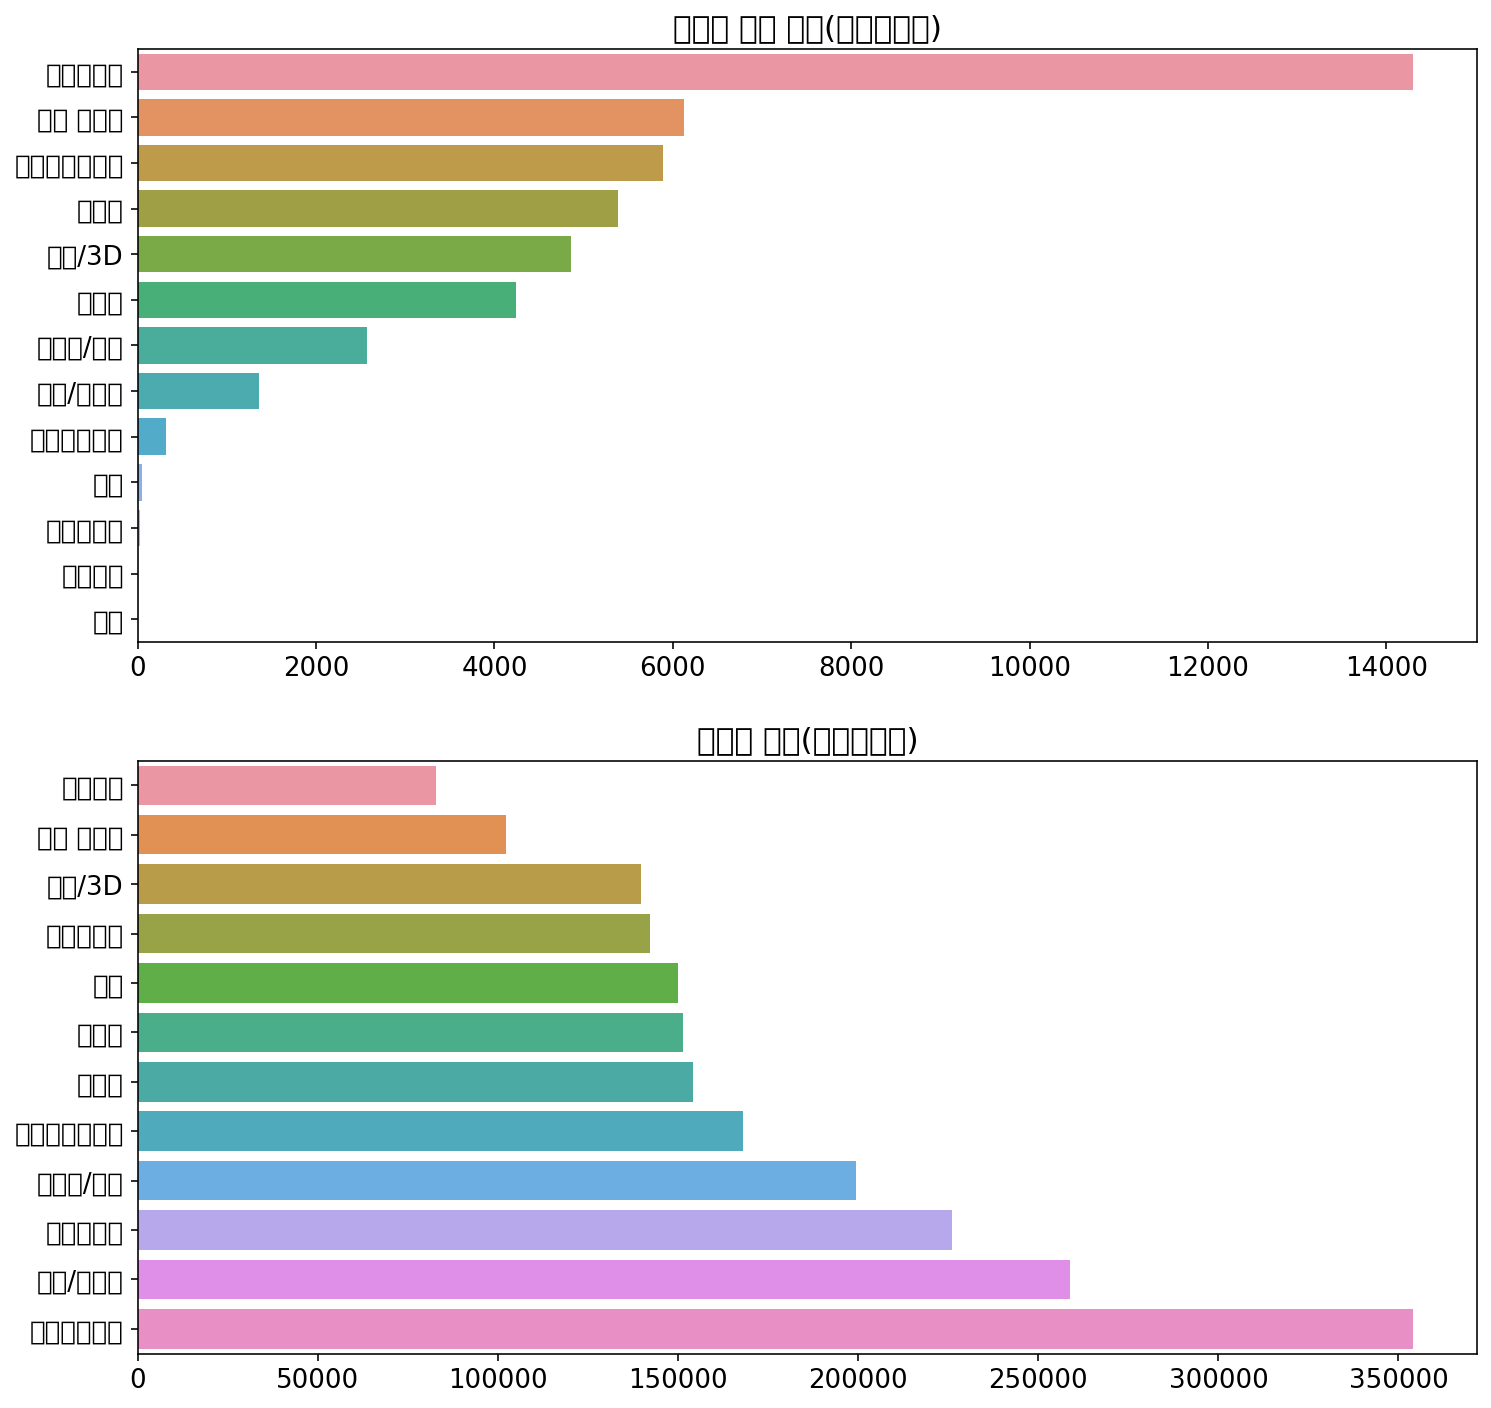

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
p1 = sns.countplot(data=pay,
             y=pay.category_title,
             order=pay.category_title.value_counts().index)
p1.set_title('판매된 강의 개수(카테고리별)')
p1.set_xlabel('')
p1.set_ylabel('')

plt.subplot(2,1,2)
p1 = sns.barplot(data=sort,
                 x = sort.sale_price,
                 y = sort.index)
p1.set_title('판매가 평균(카테고리별)')
p1.set_xlabel('')
p1.set_ylabel('')

plt.show()

- 판매가 평균과 함께 살펴보면 15만원대 근처의 카테고리들이 판매량에서 상위를 차지하고 있는 것을 볼 수 있다.  
- 특히 **프로그래밍**에 대한 인기가 최근에 높아지면서 적절한 가격대 형성과 함께 압도적인 판매량을 나타내는 것으로 보인다.  
- **투자/재테크**, **부동산/금융** 또한 인기 있는 주제들이므로 판매가 평균을 조금 낮춘다면 판매량을 늘릴 수 있을거라고 생각한다.

#### 서브 카테고리 분석 (프로그래밍)

In [ ]:
pg = temp.loc[(pay.category_title=='프로그래밍')]

In [ ]:
pd.DataFrame(pg['subcategory_title'].value_counts())

,subcategory_title
프론트엔드 개발,3134
개발자 커리어,3115
백엔드 개발,2984
모바일앱,1697
DevOps,1130
게임,798
코딩 입문,425
기타,220
디자인툴,79
업무자동화,57


In [ ]:
avg_sub = pg.groupby('subcategory_title').mean()
sort = avg_sub.sort_values(by='sale_price', ascending=True)

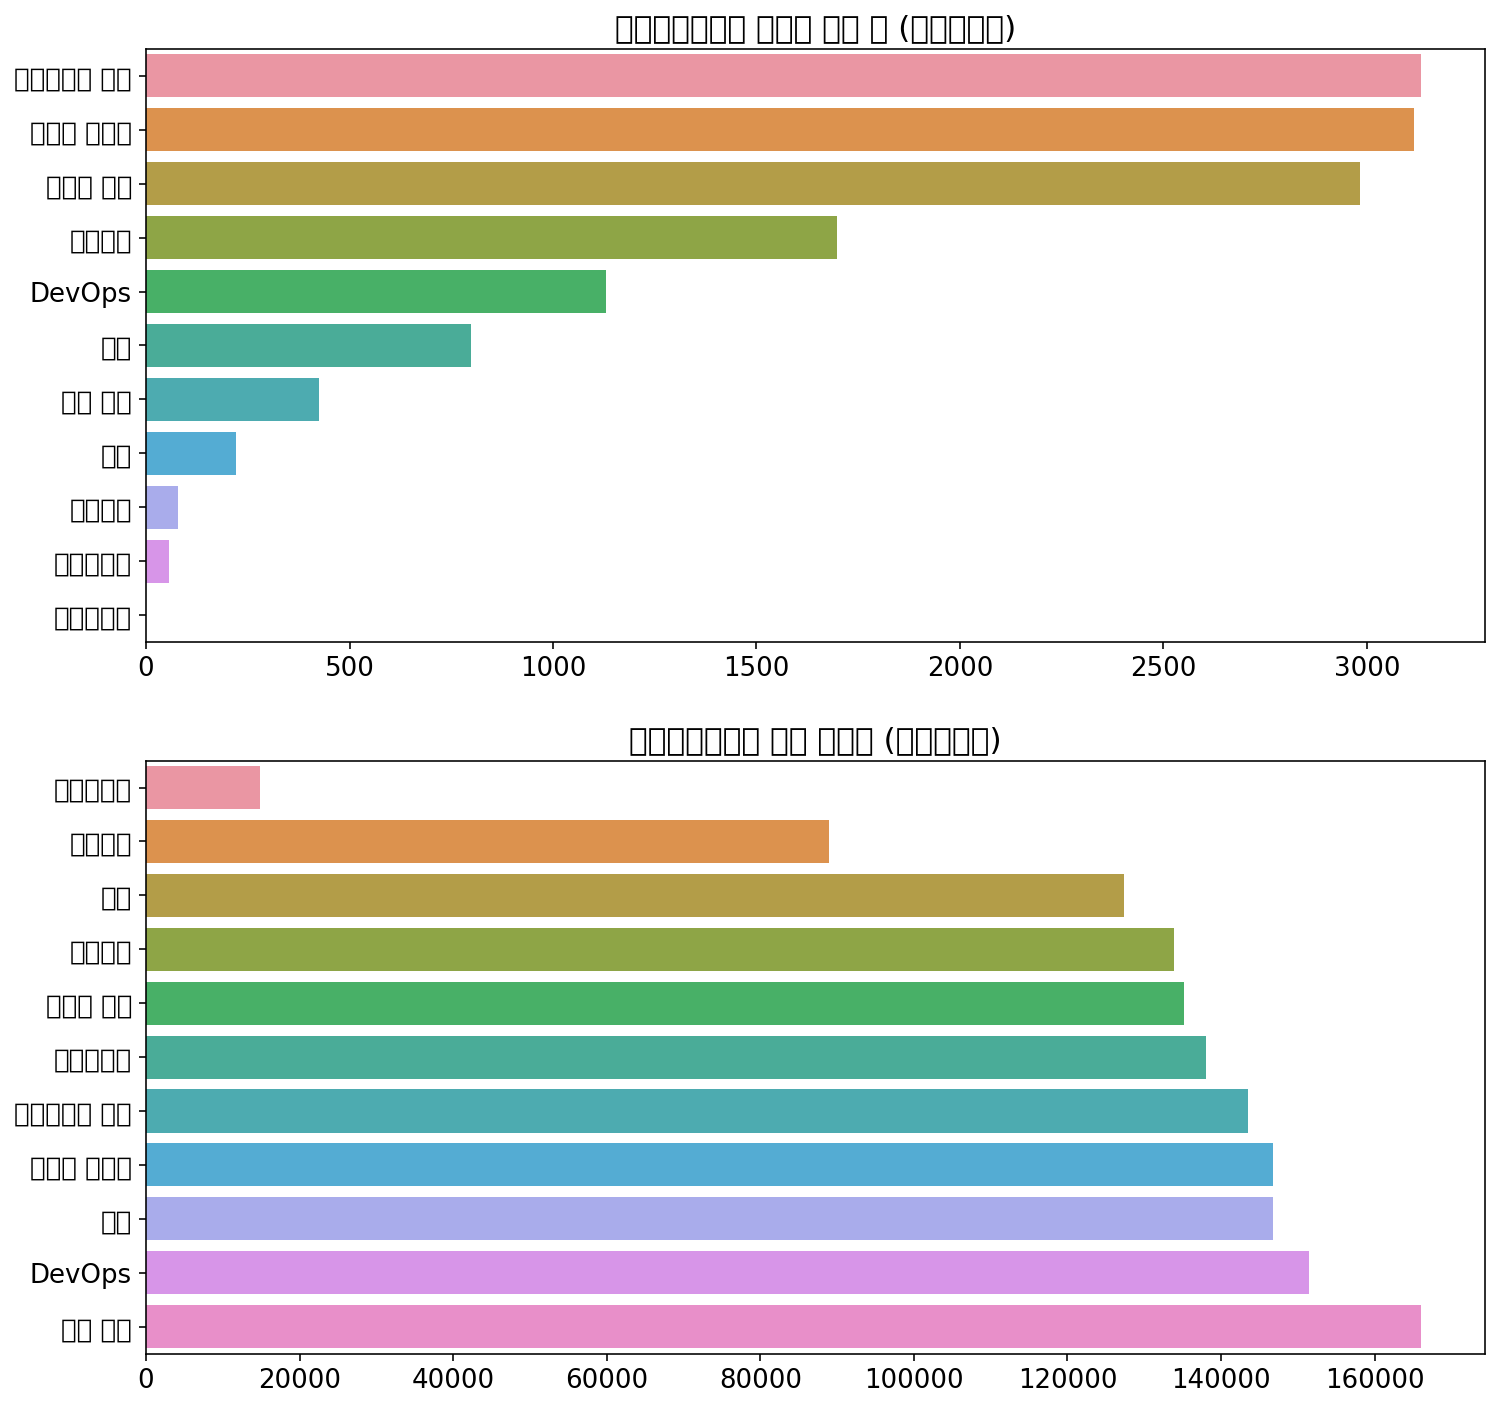

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
p1 = sns.countplot(data=pg,
             y=pg.subcategory_title,
             order=pg.subcategory_title.value_counts().index)
p1.set_title('서브카테고리별 구매된 강의 수 (프로그래밍)')
p1.set_xlabel('')
p1.set_ylabel('')

plt.subplot(2,1,2)
p2 = sns.barplot(data=sort,
           x=sort.sale_price,
           y=sort.index)
p2.set_title('서브카테고리의 평균 판매가 (프로그래밍)')
p2.set_xlabel('')
p2.set_ylabel('')

plt.show()

- 프로그래밍 서브카테고리의 **데이터분석** 강의는 너무 적은 수가 개설되어 있어 판매량이 저조한 것으로 보인다.
- 비전공자들이 개발자로 커리어 전환을 원하는 경우가 많기 때문에 이러한 고객들을 잡기 위해서는 **코딩 입문** 강의들의 가격을 많이 낮춰서 접근성을 높이는게 좋은 방식이라고 생각한다.

#### format 분석

In [ ]:
pay['format'].unique()

array(['스쿨 온라인', '올인원', 'RED', '온라인 완주반', 'B2B 온라인', '캠프', '이벤트',
       '하루10분컷', '아카이브', '관리', 'B2B', 'MBA', 'B2G'], dtype=object)

In [ ]:
pd.DataFrame(pay['format'].value_counts())

,format
올인원,38151
RED,3109
온라인 완주반,1350
하루10분컷,1327
B2B,352
스쿨 온라인,328
B2G,310
이벤트,82
B2B 온라인,52
아카이브,31


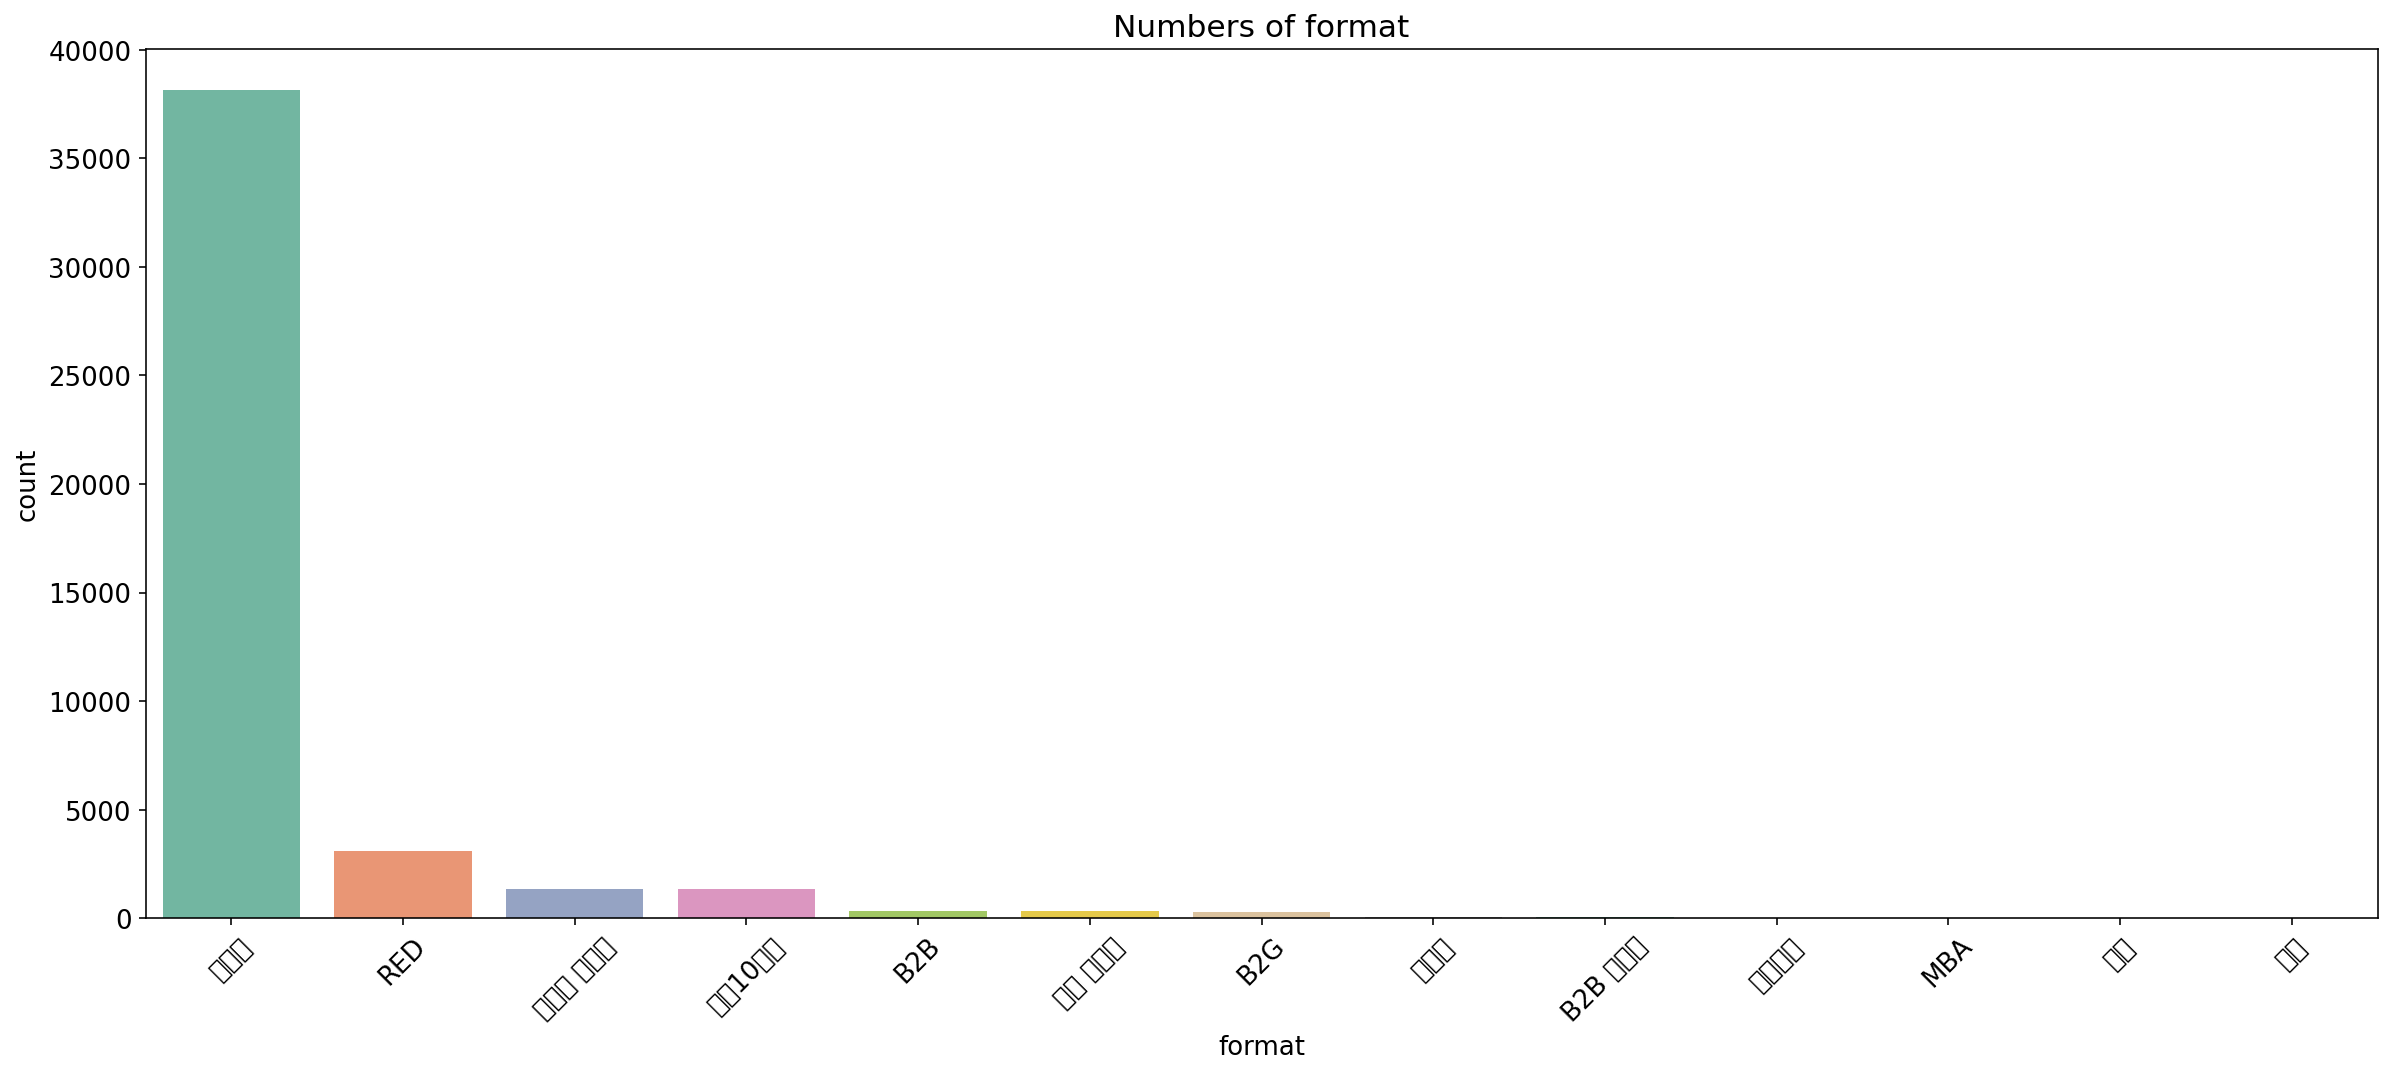

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(data=pay, x='format', order = pay['format'].value_counts().index, palette='Set2')
plt.xticks(rotation=45)
plt.title('Numbers of format')
plt.show()

올인원 format이 압도적으로 많은것으로 보아 사람들은 한번 결제에 여러가지 강의가 들어있는것을 선호하는 타입인것 같다 

마케팅 방향을 올인원을 광고하는것으로 잡아서 하는게 판매율을 높을 수있을것 같다


#### 마케팅의 효과 분석

In [ ]:
# 마케팅이 시작된 시기 분석
pd.DataFrame(pay['marketing_start_at'].dt.strftime('%Y년 %m월').value_counts())

,marketing_start_at
2021년 04월,5144
2021년 02월,4728
2021년 06월,4229
2021년 07월,3758
2020년 12월,3567
2021년 03월,2097
2021년 05월,1979
2021년 08월,1704
2021년 01월,1558
2020년 03월,1279


In [ ]:
# 결제 완료 시간을 월별로 나눠서 분석
pd.DataFrame(pay['completed_at'].dt.strftime('%Y년 %m월').value_counts())

,completed_at
2021년 08월,8435
2021년 05월,7647
2021년 06월,7499
2021년 04월,7435
2021년 07월,7394
2021년 09월,4845
2021년 03월,1879


*   2019년과 2020년에는 마케팅 횟수가 적고 2021년 2월부터 크게 증가해서 4월부터 증가해서 8월까지는 판매수가 많아진걸로 보여진다
*   2021년 9월에는 마케팅 횟수가 현저히 떨어졌기때문에 9월 판매수가 떨어진것으로 보인다

### 시기별 분석

#### 결제가 주로 이루어진 시간대

##### 월별 결제량

In [ ]:
pd.DataFrame(pay['completed_at'].dt.strftime('%Y년 %m월').value_counts())

,completed_at
2021년 08월,8435
2021년 05월,7647
2021년 06월,7499
2021년 04월,7435
2021년 07월,7394
2021년 09월,4845
2021년 03월,1879


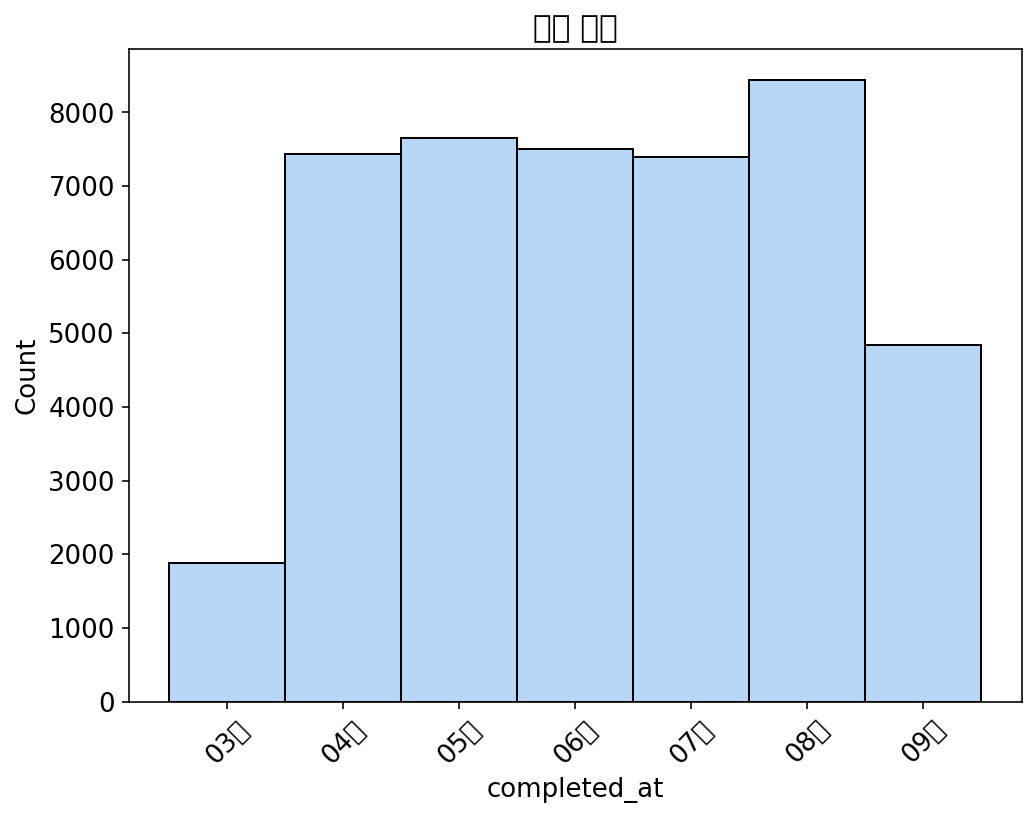

In [ ]:
plt.figure(figsize=(8,6))
sns.set_palette("pastel")
sns.histplot(pay['completed_at'].dt.strftime('%m월'))
plt.xticks(rotation=45)
plt.title('월별 결제')
plt.show()

4월부터 8월까지 결제량이 많았고 3월과 9월에는 마케팅 부족으로 거래량이 적은걸로 예상된다

##### 일별 거래량

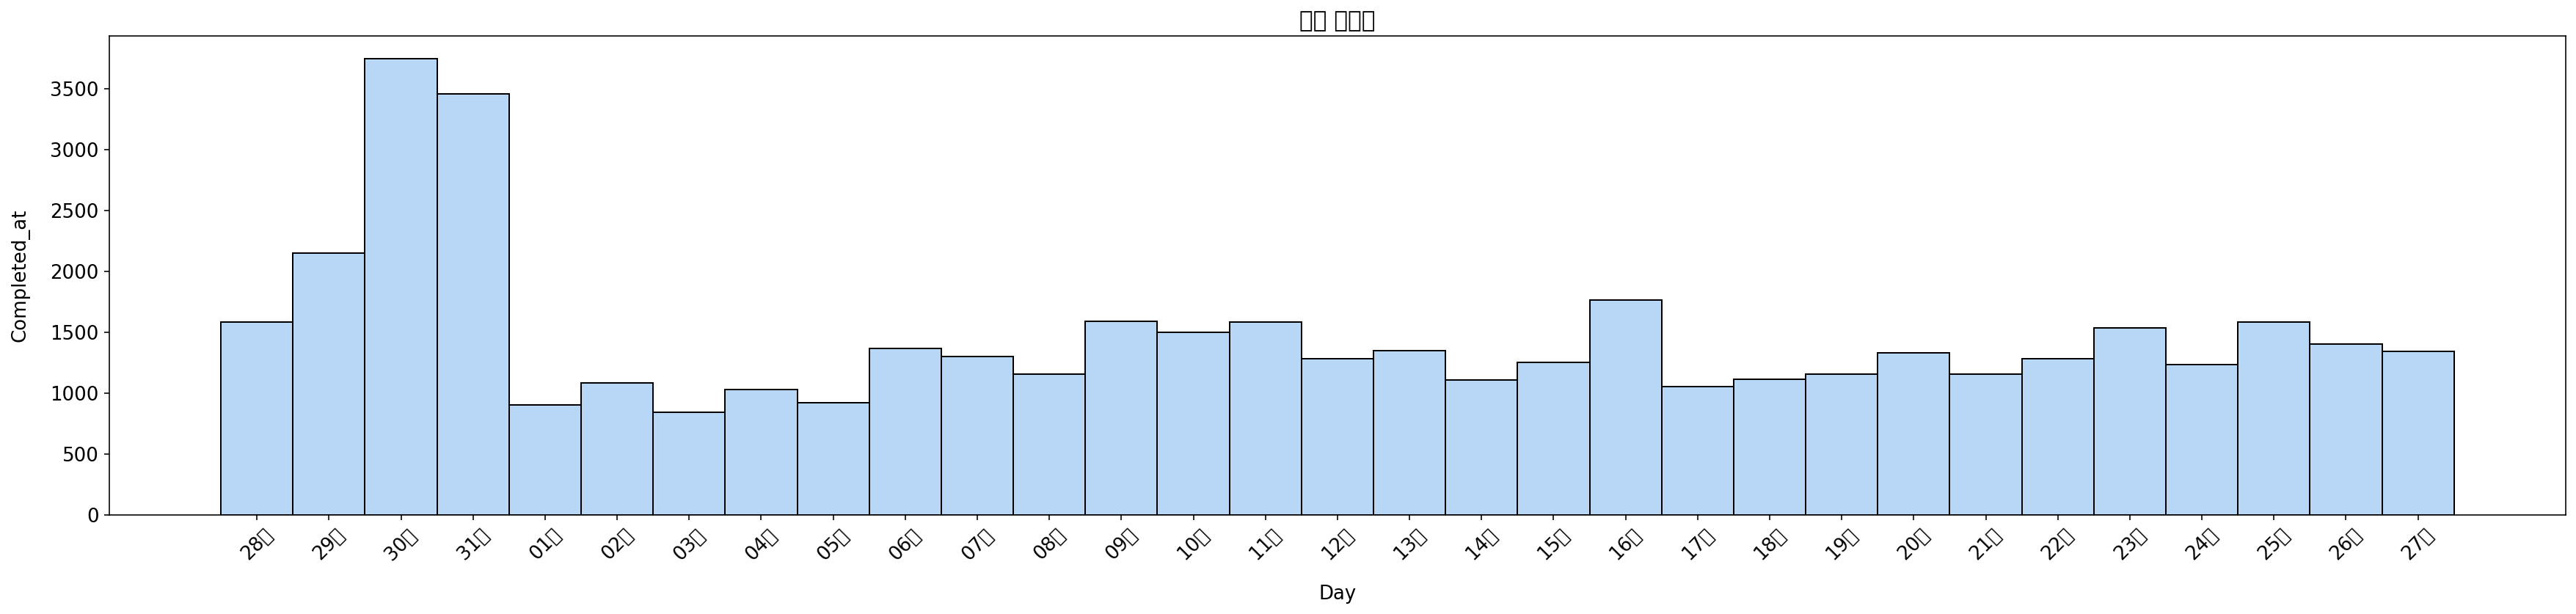

In [ ]:
plt.figure(figsize=(30,6))
sns.set_palette('pastel')
sns.histplot(pay['completed_at'].dt.strftime('%d일'))
plt.xticks(rotation=45)
plt.title('일별 거래량')
plt.xlabel("Day", labelpad=14)
plt.ylabel("Completed_at", labelpad=14)
plt.show()

28일부터 증가하기 시작해서 월말까지 결제률이 높았다

##### 시간별 결제량

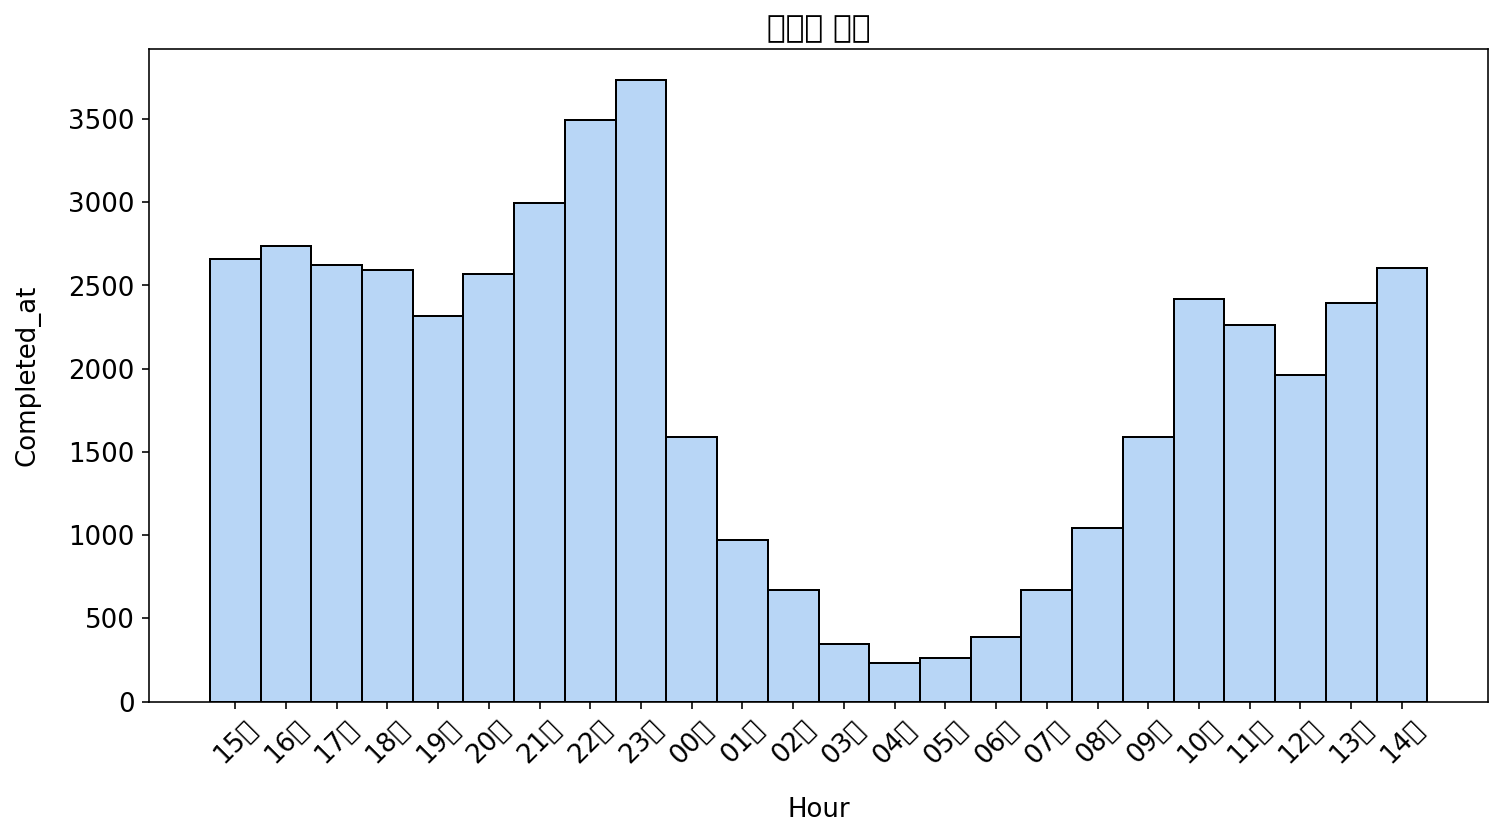

In [ ]:
# 결제된 시간 분포 
plt.figure(figsize=(12,6))
sns.set_palette('pastel')
sns.histplot(pay['completed_at'].dt.strftime('%H시'), )
plt.xticks(rotation=45)
plt.title('결제된 시간')
plt.xlabel("Hour", labelpad=14)
plt.ylabel("Completed_at", labelpad=14)
plt.show()

결제된 시간의 분포에 따르면 9시에서 11시 사이에 결제가 많이 된것으로 보아 

직장인들이 일을 마치고 퇴근후 결제한것으로 예상을 해볼수 있을 것 같다

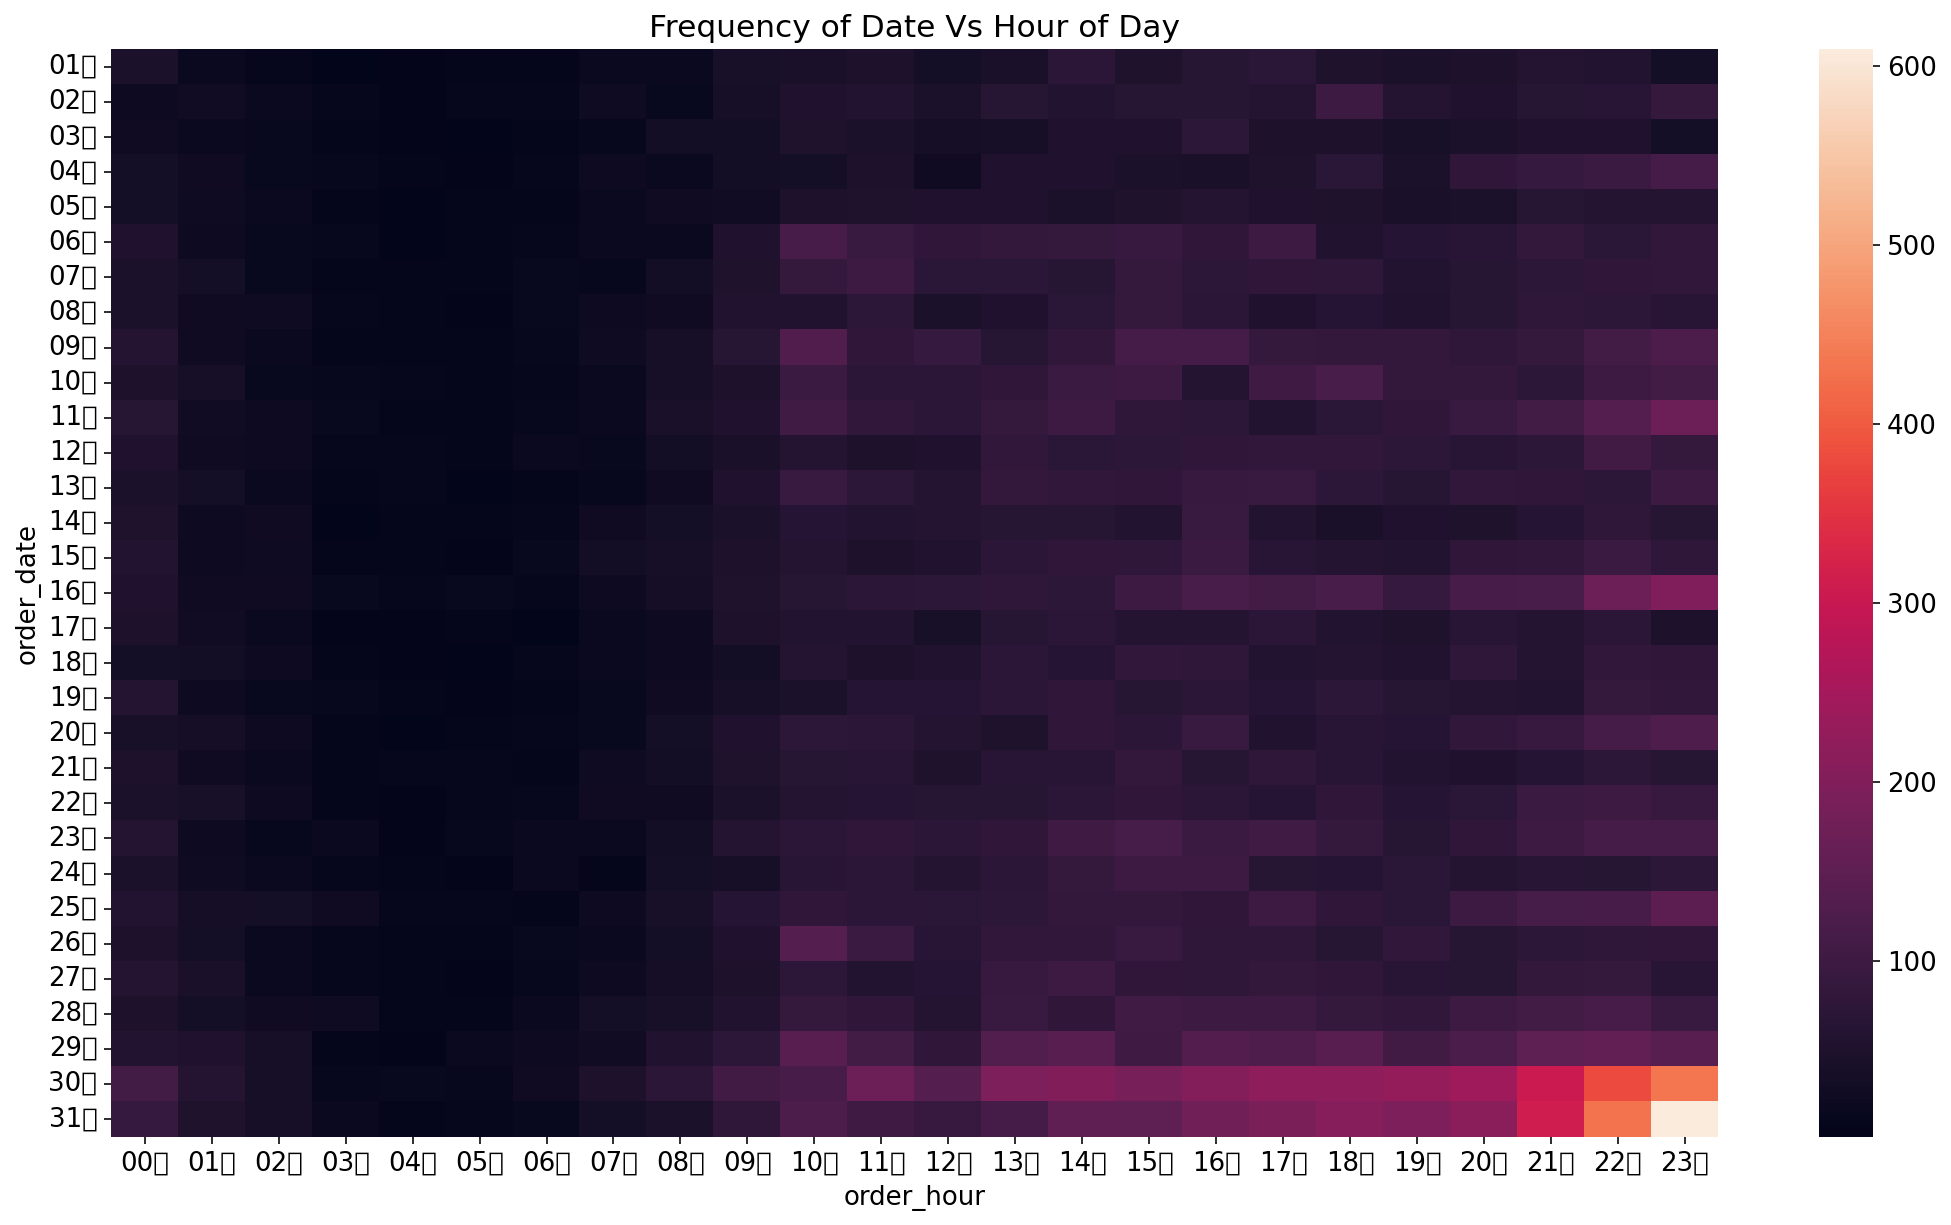

In [ ]:
# 결제 시간과 날짜의 관계
pay['order_hour'] = pay['completed_at'].dt.strftime('%H시')
pay['order_date'] = pay['completed_at'].dt.strftime('%d일')
pay_time = pay.groupby(["order_date", "order_hour"])["id"].aggregate("count").reset_index()

pay_time = pay_time.pivot('order_date', 'order_hour', 'id')

plt.figure(figsize=(18,10))
sns.heatmap(pay_time)
plt.title("Frequency of Date Vs Hour of Day")
plt.show()

결론적으로 '월말', '저녁시간대'에 sns나 인터넷 광고를 하는게 효율적일 것으로 보인다

#### 환불 시간대 분석

#### 일별 환불량

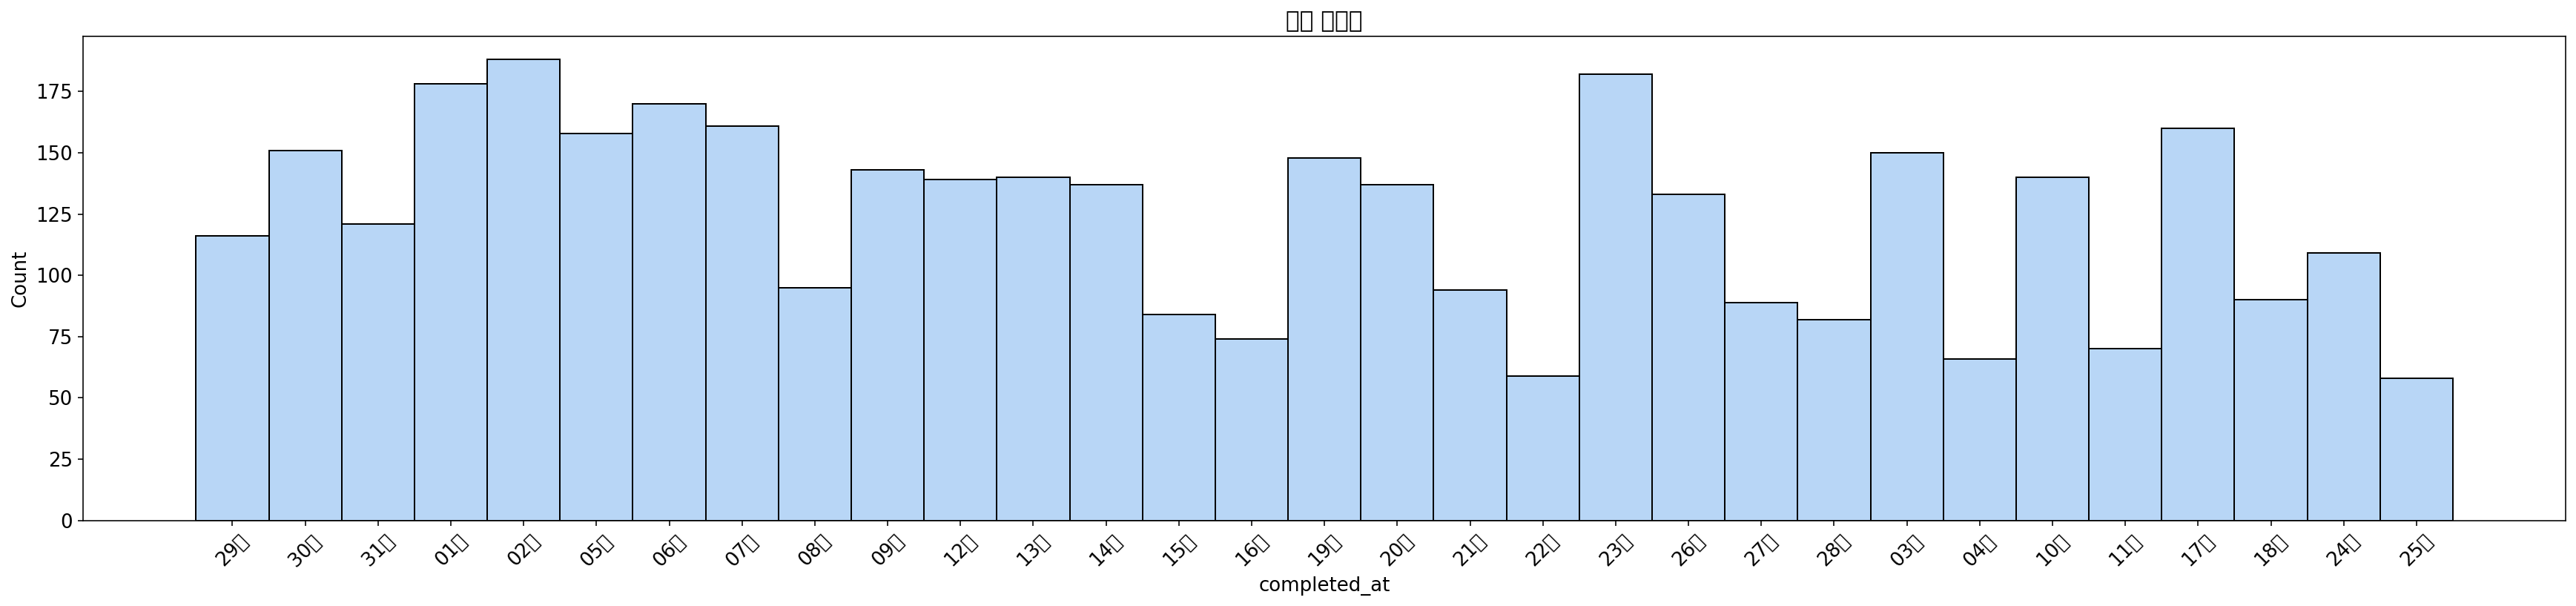

In [ ]:
plt.figure(figsize=(30,6))
sns.set_palette('pastel')
sns.histplot(ref['completed_at'].dt.strftime('%d일'))
plt.xticks(rotation=45)
plt.title('일별 환불량')
plt.show()

일별 환불에서는 뚜렷한 패턴을 찾을수가 없었다

#### 시간별 환불량

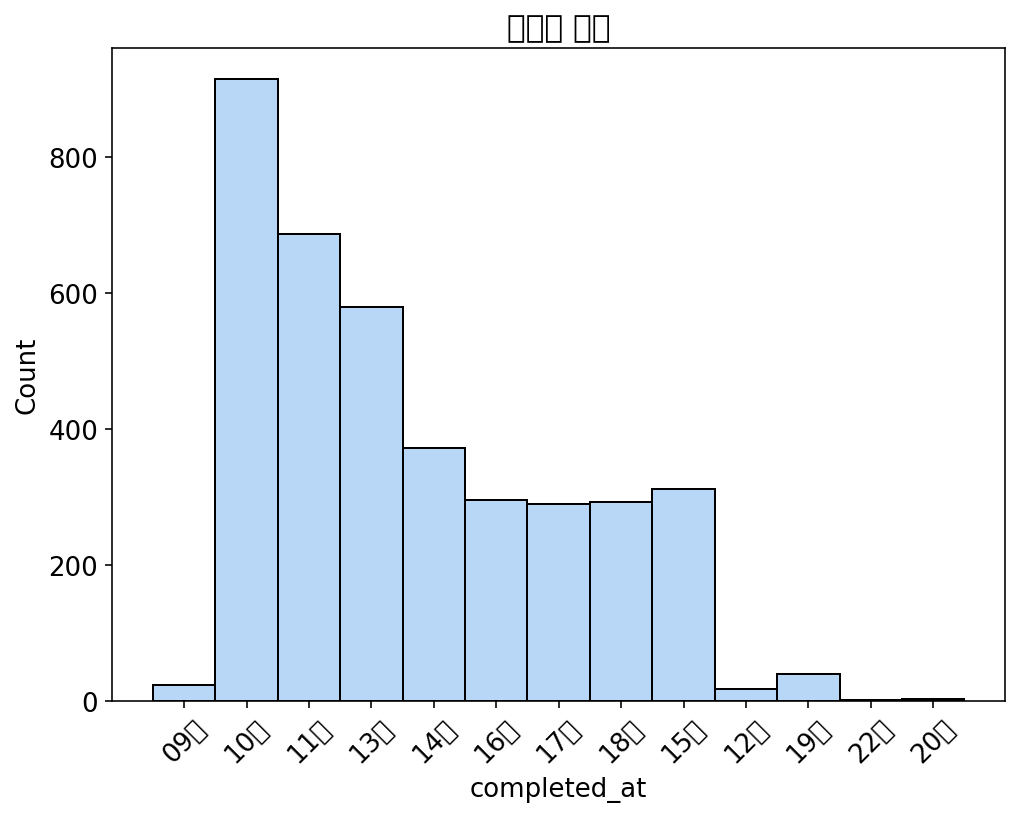

In [ ]:
plt.figure(figsize=(8,6))
sns.set_palette('pastel')
sns.histplot(ref['completed_at'].dt.strftime('%H시'))
plt.xticks(rotation=45)
plt.title('환불된 시간')
plt.show()

환불된 시간을 보면 10시에서 새벽 한시까지 많은 걸로 봐서 
* 9시에서 11시 사이에 결제를 하고 강의를 들어보고 자기한테 맞지 않아 환불을 한것으로 예상된다


### 금액별 분석

#### 할인액에 따른 월별 판매량 분석

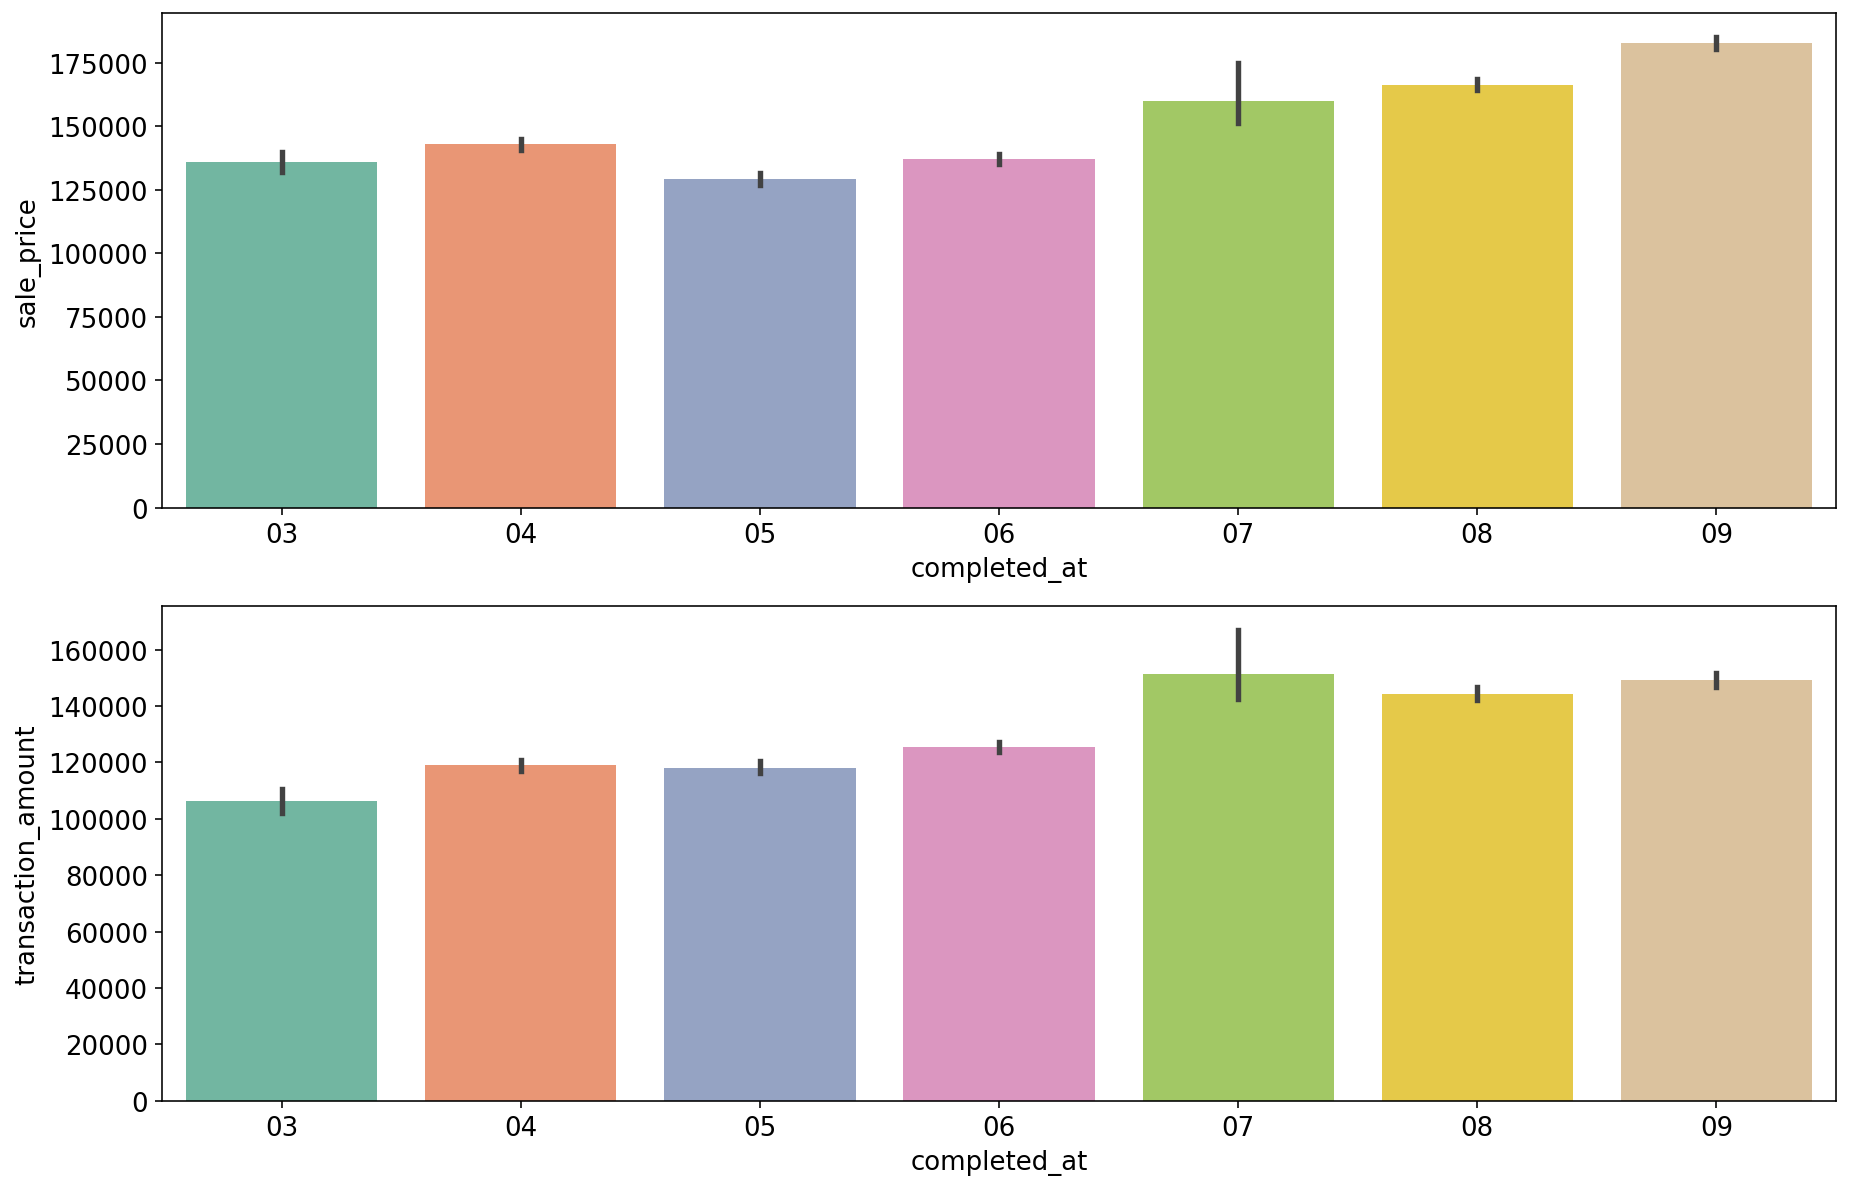

In [ ]:
# 월별 판매가격과 실제 결제액 비교 분석
plt.figure(figsize=( 15,10))

plt.subplot(2,1,1)
sns.barplot(pay['completed_at'].dt.strftime('%m'), pay['sale_price'], palette='Set2') #  판매금액

plt.subplot(2,1,2)
sns.barplot(pay['completed_at'].dt.strftime('%m'), pay['transaction_amount'], palette='Set2') #할인 결제 금액
plt.show()

#실제금액,판매금액 시각화

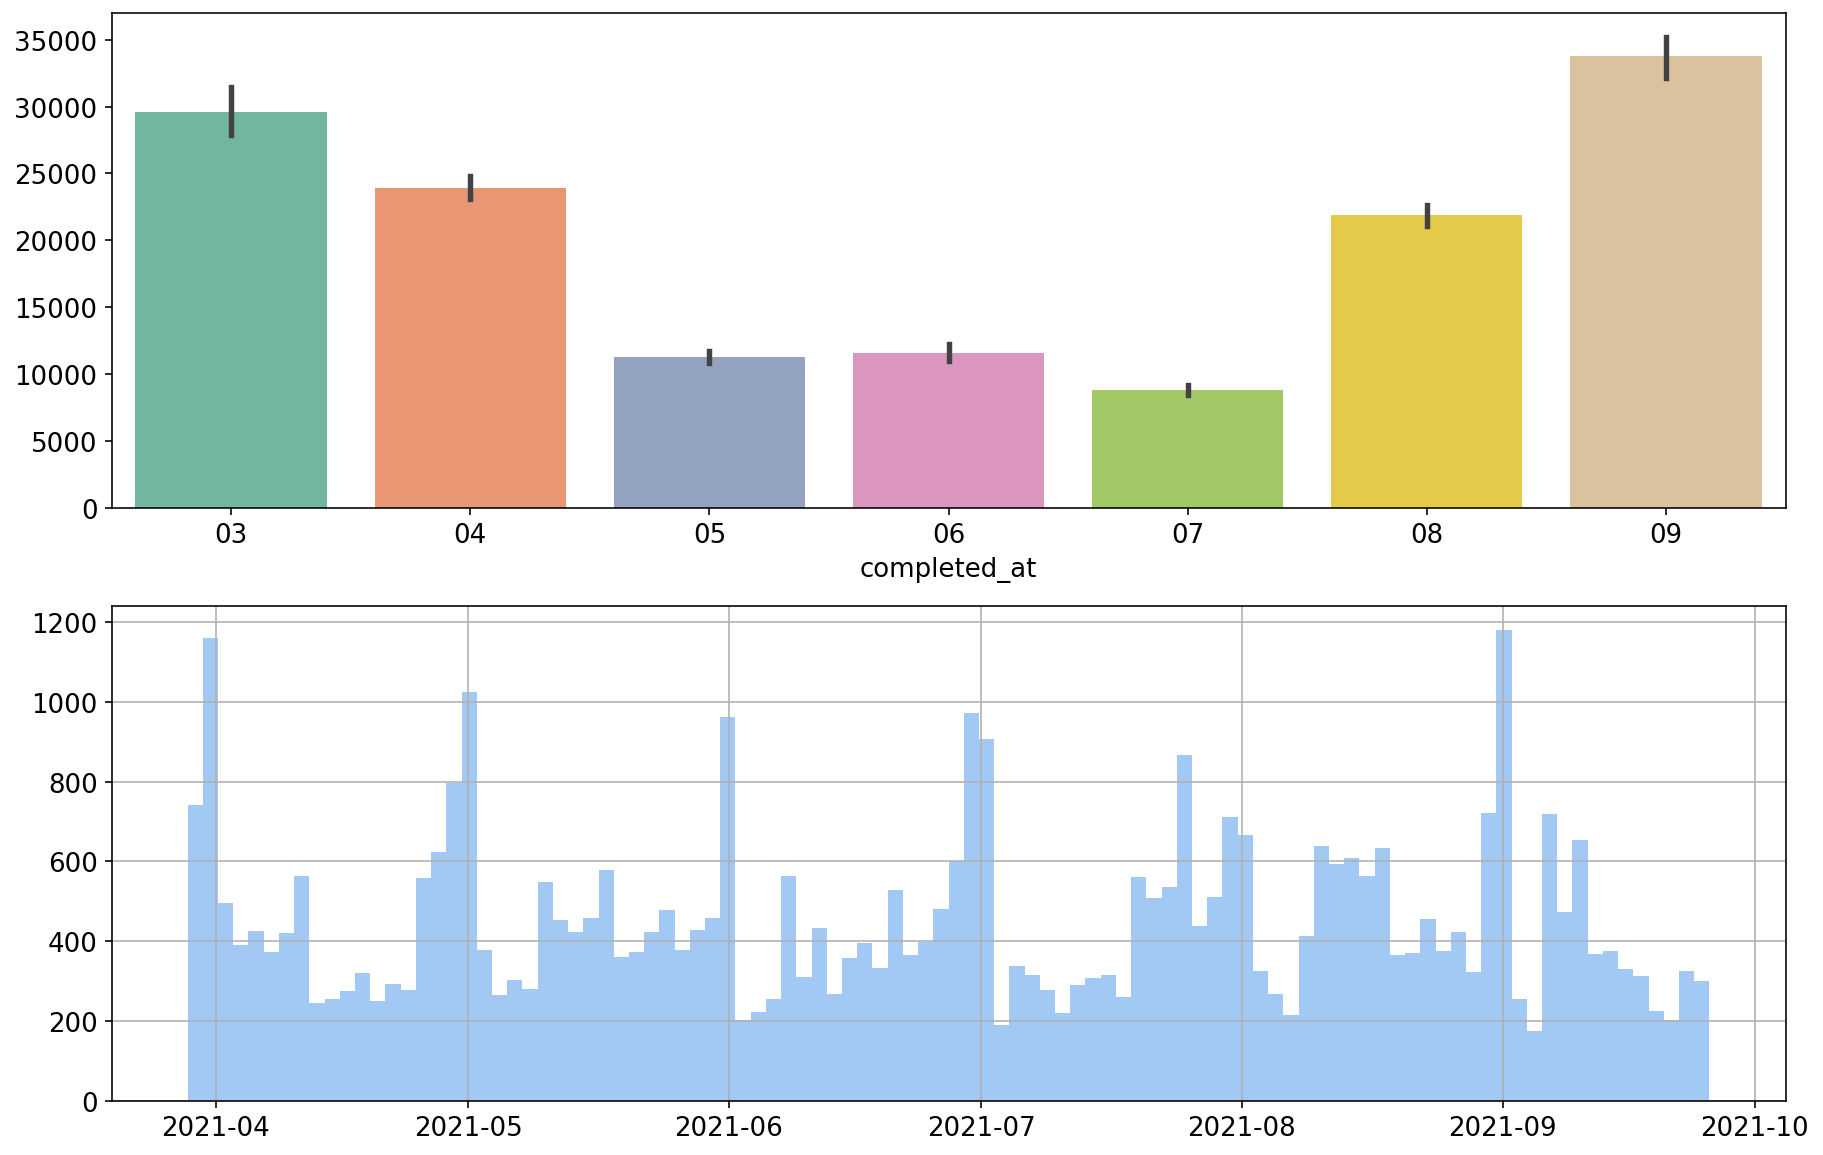

18159.63087694421

In [ ]:
# 월별 할인액 시각화
st= pay['sale_price'] - pay['transaction_amount'] # 판매금액 - 결제금액 = 할인액 
plt.figure(figsize=( 15,10))
plt.subplot(2,1,1)
sns.barplot( x= pay['completed_at'].dt.strftime('%m'),y= st, palette='Set2')

plt.subplot(2,1,2)
pay['completed_at'].hist(bins=100,) # 월별 결제완료 현황

plt.show()
st.mean()

In [ ]:
 pd.DataFrame( pay['completed_at'].dt.strftime('%m').value_counts().sort_values(ascending=False) )
 #월별 판매량
 #마케팅 실패 / 홍보의 부족 /but 쿠폰에 적용 가능한 강의가 다를 수도 있다는 점을 전제로 분석을 해야할듯..

,completed_at
08,8435
05,7647
06,7499
04,7435
07,7394
09,4845
03,1879


일반적으로 **할인액의 가격이 클수록 구매가격이 낮아지므로 판매량이 높아질 것을 기대** 해 볼 수 있다.  
하지만, 판매량이 가장 높았던 8월과 5월의 할인액을 비교해보면 5월에는 할인액이 적었고, 8월에는 할인액이 컸다는 데이터를 확인 할 수 있었고, 9월에는 **할인액이 가장 많았음에도 불구하고 판매량이 저조**했다.  
  


  


#### 월별 쿠폰 할인액에 따른 판매량 분석


In [ ]:
# 쿠폰 사용률이 높은 상위 10개 항목
cou_a = pay[ [ 'coupon_title'] ] 
coua=cou_a.value_counts().head(10)
pd.DataFrame(coua)

,0
coupon_title,
사용안함,24899
[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,3864
[WELCOME] 온라인 강의 3만원 할인쿠폰,2143
[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,1711
[WELCOME] 온라인 강의 2만원 할인쿠폰,1656
[WELCOME] 온라인 강의 1만원 할인쿠폰,1265
8월 1+1 프로모션 쿠폰,864
[웰컴쿠폰] 올인원 패키지 3만원 할인 쿠폰,862
[미래투자금] 온라인 강의 2만원 할인쿠폰,836


In [ ]:
cou = pay[ [ 'coupon_title','coupon_discount_amount']]

def counts(s):
  return(s).value_counts()

cou['count']=0
couu=cou.groupby('coupon_title').agg({'coupon_discount_amount':np.mean, 'count':counts})
couuu=couu.sort_values(by='count',ascending=False)
ch10=couuu.head(10)
pd.DataFrame(ch10.sort_values(by='count',ascending=False))

,coupon_discount_amount,count
coupon_title,,
사용안함,0.000000,24899
[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.000000,3864
[WELCOME] 온라인 강의 3만원 할인쿠폰,30000.000000,2143
[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.000000,1711
[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.000000,1656
[WELCOME] 온라인 강의 1만원 할인쿠폰,10000.000000,1265
8월 1+1 프로모션 쿠폰,140535.358796,864
[웰컴쿠폰] 올인원 패키지 3만원 할인 쿠폰,30000.000000,862
[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.000000,836


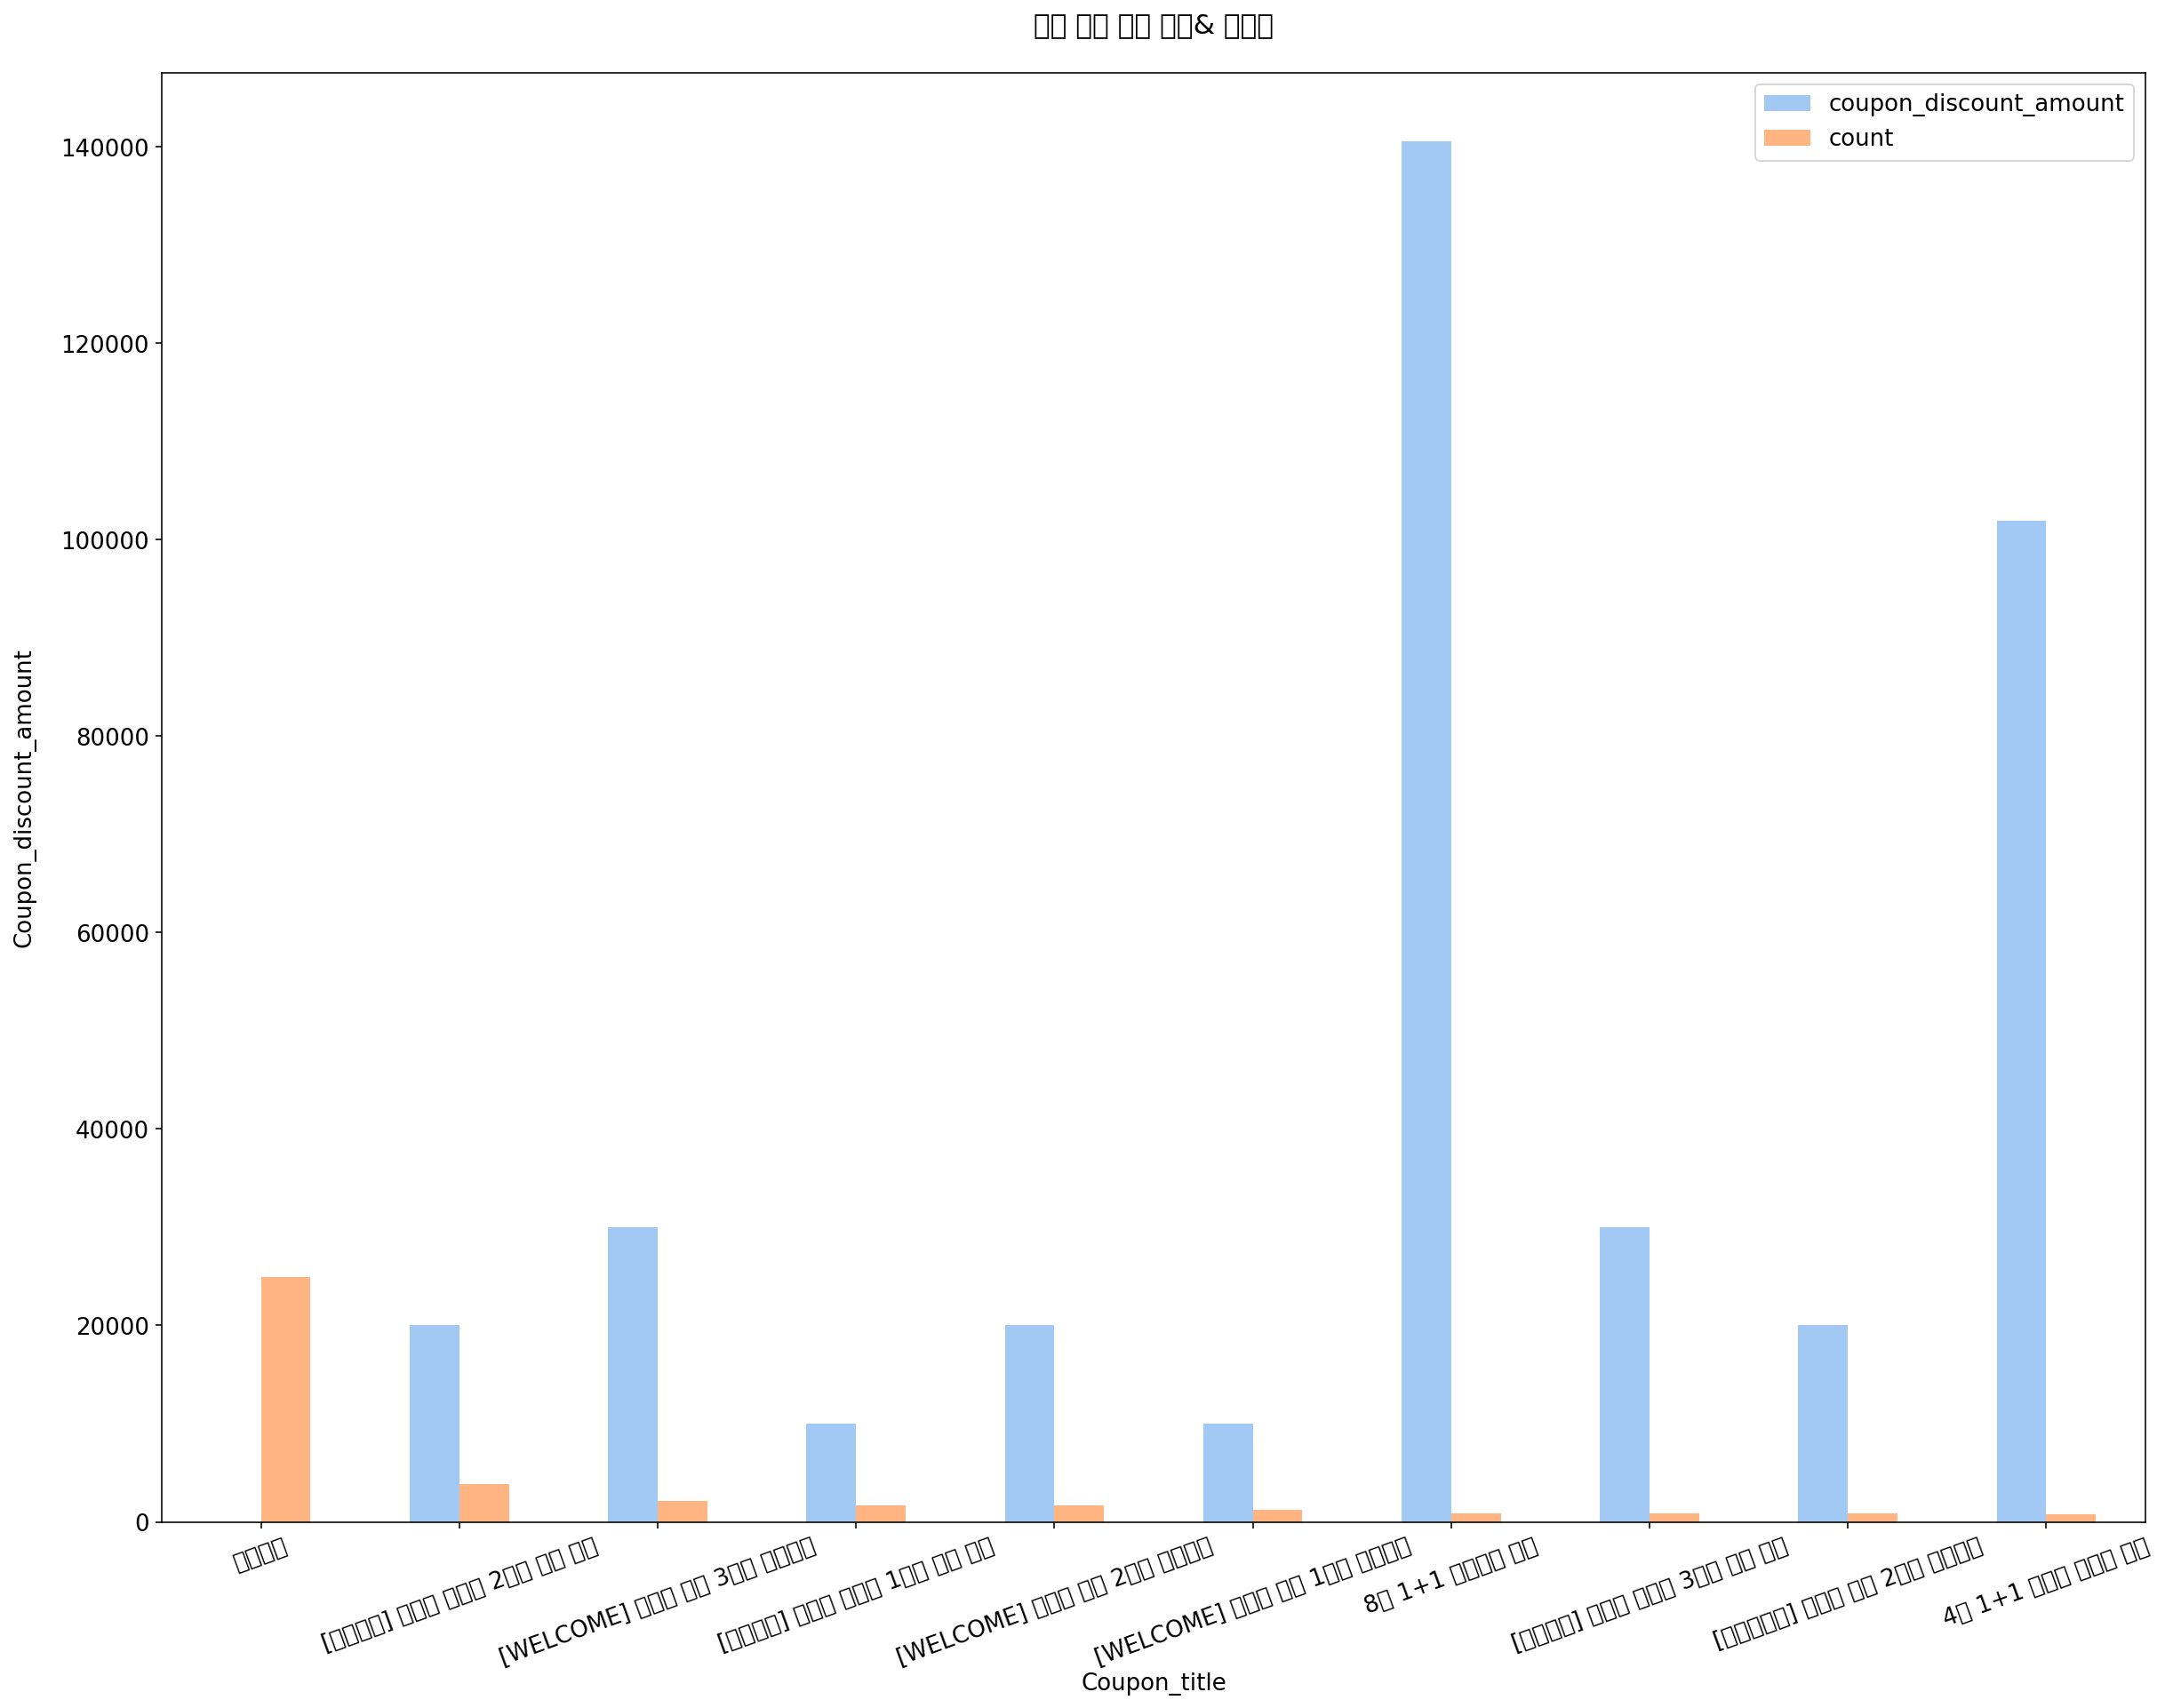

In [ ]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] =False
ch10.sort_values(by='count',ascending=False).plot(kind='bar',figsize=(20, 15), rot=20)
plt.xlabel("Coupon_title", labelpad=1)
plt.ylabel("Coupon_discount_amount", labelpad=14)
plt.title("월별 쿠폰 할인 평균& 사용률", y=1.02);

In [ ]:
# 월별 쿠폰 사용률
cou = pay[ [ 'coupon_title','coupon_discount_amount']]
cou1 = pay[ [ 'coupon_title'] ] # 리스트


pd.DataFrame( cou1[cou1['coupon_title'].str.contains('월')].value_counts()) # 쿠폰이름에서 월별 카운트 8월이 가장 많이 쿠폰을 뿌린것을 확인 가능


,0
coupon_title,
8월 1+1 프로모션 쿠폰,864
4월 1+1 페이백 이벤트 쿠폰,760
7월 100% 페이백 프로모션 쿠폰,656
5월 페이백 프로모션 쿠폰,642
6월 반값특가 프로모션 쿠폰,183
5월 5일 어른이날 기념 5%쿠폰,21
[쿠폰재발급]6월 반값특가 프로모션 쿠폰,3
[재결제쿠폰]6월 반값특가 프로모션 쿠폰,2
[예외처리]8월 1+1 프로모션 쿠폰,1


In [ ]:
# 월별 쿠폰 타이틀의 할인액 평균값 & 사용률
cou = pay[ [ 'coupon_title','coupon_discount_amount']]
cou2=cou.loc[cou.coupon_title.str.contains('월')].copy()
cou2['count']=0

def counts(s):
  return(s).value_counts()

cou3 = cou2.groupby('coupon_title').agg({'coupon_discount_amount':np.mean, 'count':counts})
cou4 = cou3.iloc[0:6]
cou4

pd.DataFrame(cou4.sort_values(by='count',ascending=False))


,coupon_discount_amount,count
coupon_title,,
8월 1+1 프로모션 쿠폰,140535.358796,864
4월 1+1 페이백 이벤트 쿠폰,101898.157895,760
7월 100% 페이백 프로모션 쿠폰,136872.865854,656
5월 페이백 프로모션 쿠폰,101523.364486,642
6월 반값특가 프로모션 쿠폰,60201.092896,183
5월 5일 어른이날 기념 5%쿠폰,5593.809524,21


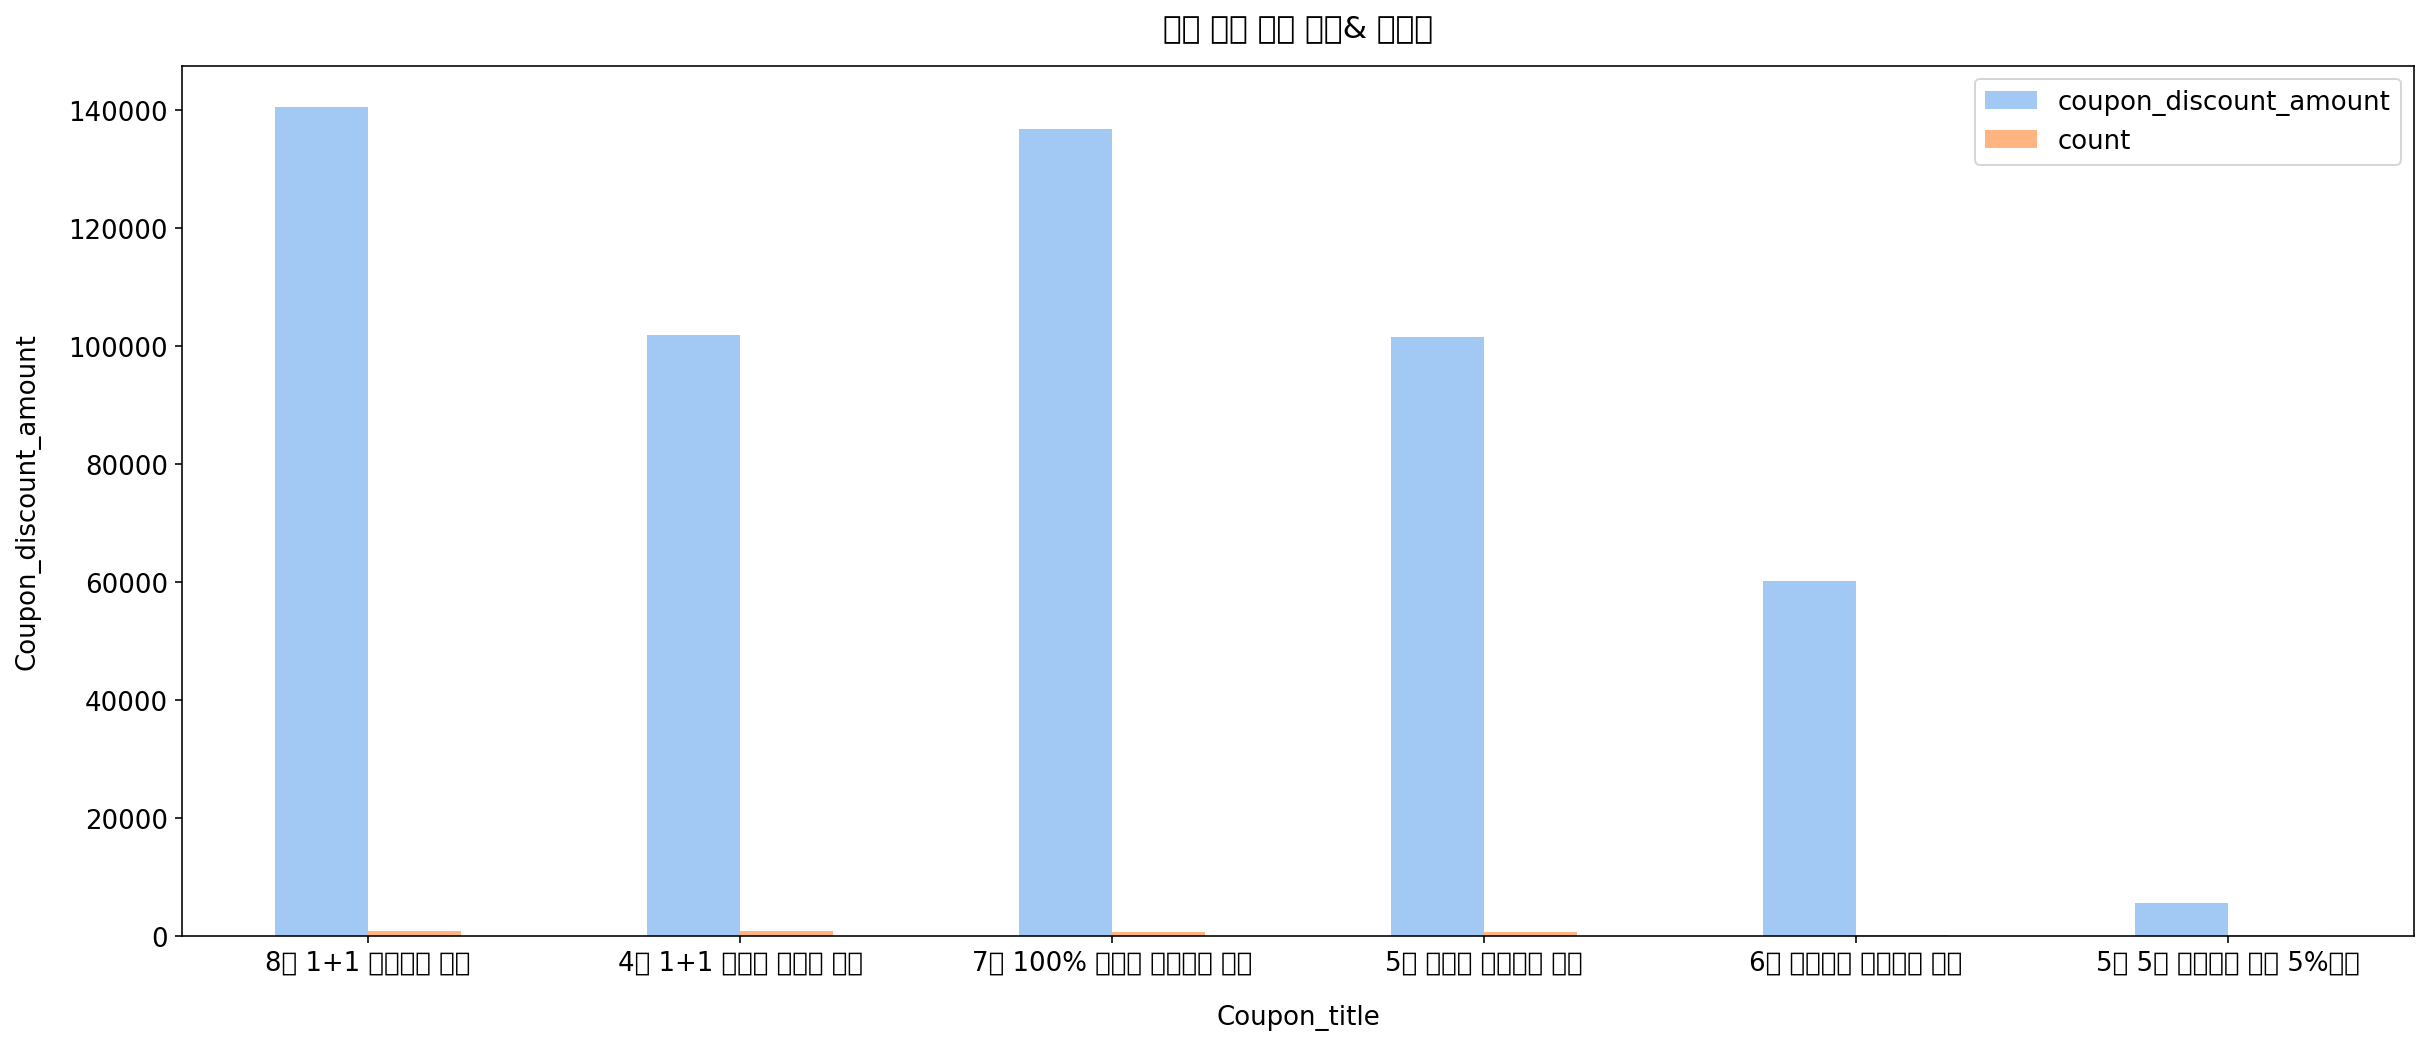

In [ ]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] =False
cou4.sort_values(by='count',ascending=False).plot(kind='bar',figsize=(20, 8), rot=0)
plt.xlabel("Coupon_title", labelpad=14)
plt.ylabel("Coupon_discount_amount", labelpad=14)
plt.title("월별 쿠폰 할인 평균& 사용률", y=1.02);

#### 쿠폰 이외 할인 분석



*   transaction_amount 금액별 조사



In [ ]:
pay['transaction_amount'].value_counts()

99000     891
119000    855
129000    817
149000    806
159000    781
         ... 
477000      1
184775      1
388000      1
111800      1
347650      1
Name: transaction_amount, Length: 1267, dtype: int64

In [ ]:
pay[pay.transaction_amount == 0].value_counts()

Series([], dtype: int64)

In [ ]:
ref['transaction_amount'].value_counts()

-99000     82
-129000    76
-299000    75
-30000     70
-119000    63
           ..
-109494     1
-302000     1
-402000     1
-302333     1
-108186     1
Name: transaction_amount, Length: 798, dtype: int64


*   type = PAYMENT 에서는 전부 0 이상 이므로 전부 할인 받은 고객은 없다.
*   type = REFUND 에서는 금액을 환불 받아서 실 거래금액이 음수이다.




In [ ]:
# 할인 금액 확인 - PAYMENT
pay['discount'] = pay['sale_price'] - pay['transaction_amount']
pay.head()

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,...,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,order_hour,order_date,discount
0,2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,...,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,ETC,CARD,프론트엔드 개발,2021-03-04,15시,28일,19090.0
1,4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,...,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,ETC,CARD,PPT/보고서,2019-11-14,15시,28일,20000.0
2,8,970669,478033.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,...,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,116000.0,ETC,CARD,영상 편집,2020-12-02,15시,28일,20000.0
3,10,970671,469860.0,203644.0,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,...,사용안함,0.0,263000.0,ETC,CARD,회계/재무/세무,2020-11-27,15시,28일,0.0
4,14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,...,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,ETC,CARD,프론트엔드 개발,2021-02-02,15시,28일,20000.0


In [ ]:
# 쿠폰 외 할인 금액 확인
p_dc = pd.DataFrame(pay.loc[(pay.coupon_title == '사용안함')&(pay.discount != 0), 'discount'].value_counts())
p_dc.head()

,discount
20000.0,30
10000.0,21
30000.0,17
180000.0,5
3800.0,2


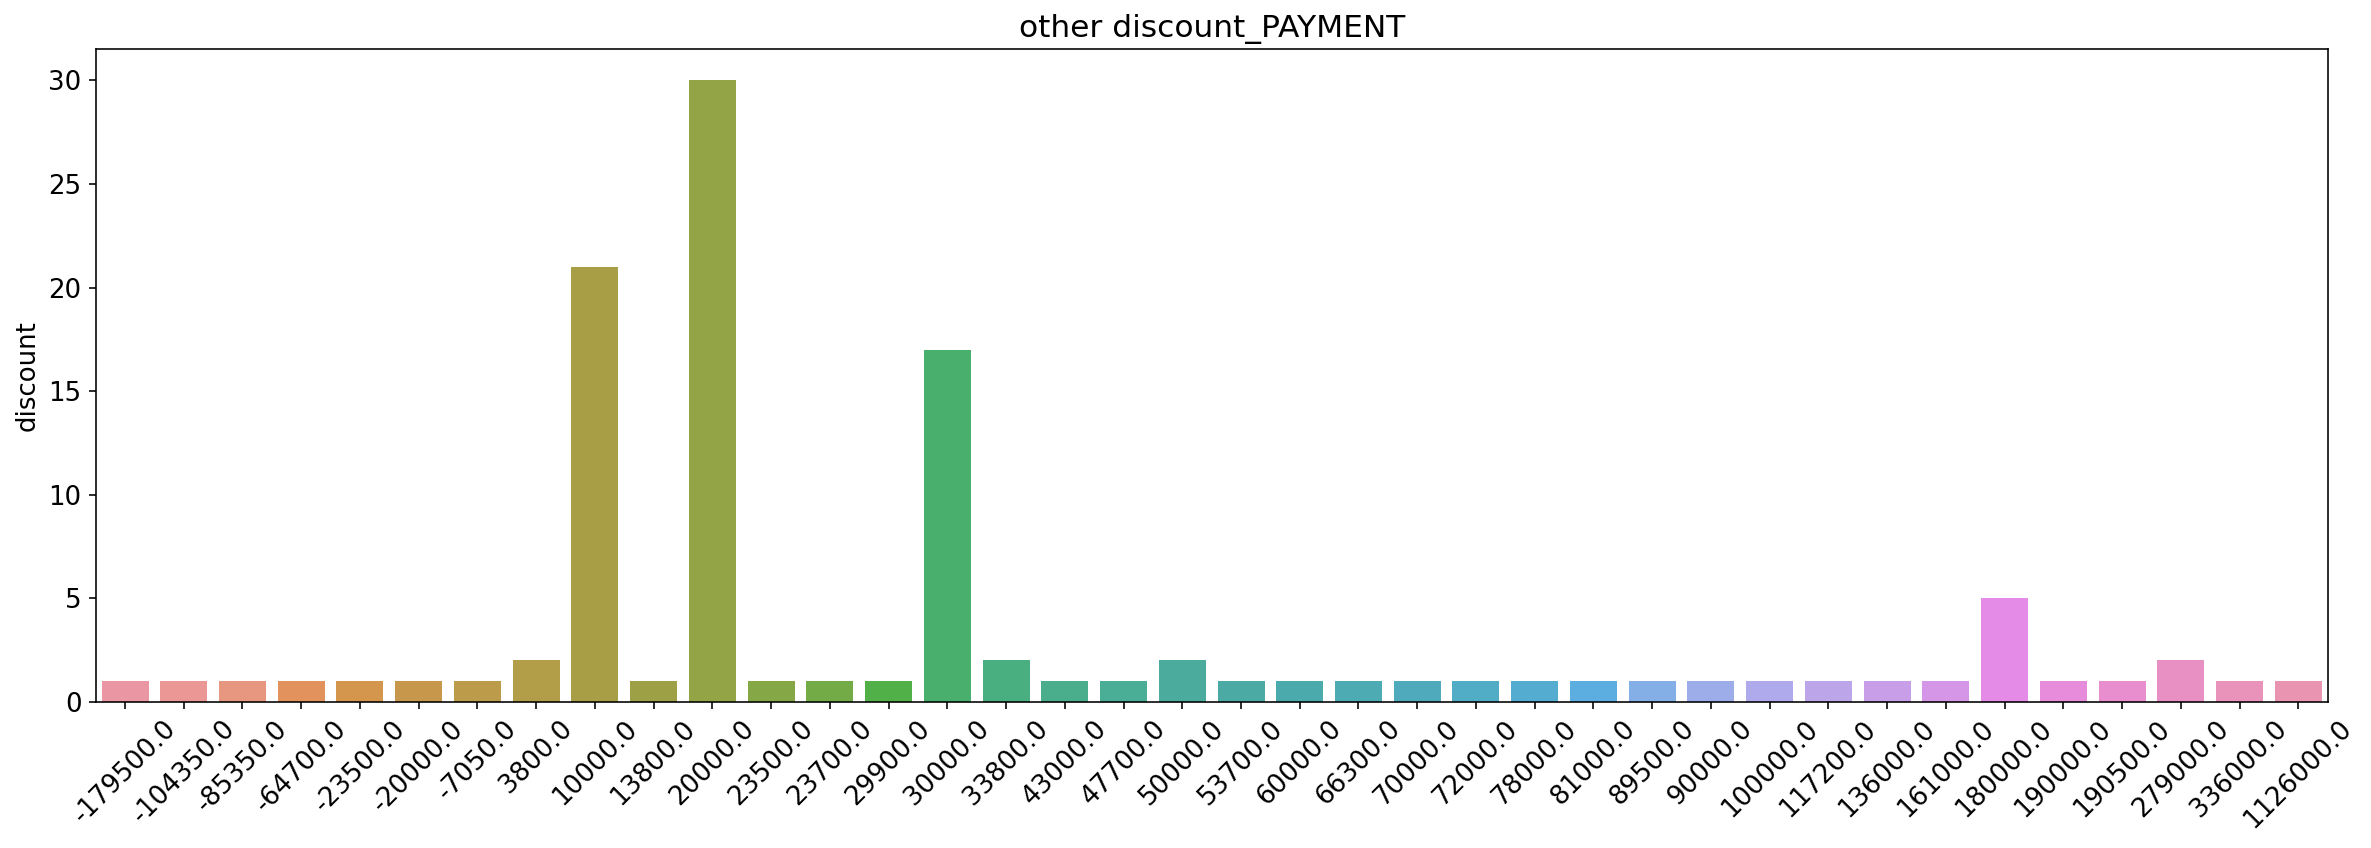

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(data=p_dc,
            x = p_dc.index,
            y = p_dc.discount)
plt.xticks(rotation=45)
plt.title('other discount_PAYMENT')
plt.show()

In [ ]:
# 할인 금액 확인 - REFUND

# REFUND 결측치 처리
# coupon_title이 빈상태인 사람들을 쿠폰을 사용안한것으로 간주하여 '사용안함'을 채워넣음
ref['coupon_title'].fillna('사용안함', inplace=True)

# coupon_discount_amount가 비어있는 사람들을 사용안한것으로 간주하여 0.0을 채워넣음
ref['coupon_discount_amount'].fillna(0.0,inplace=True)

# pg가 비어있는 사람들을 다른 결제 방법으로 결제 한것으로 간주하여 'ETC'를 채워넣음
ref['pg'].fillna('ETC', inplace=True)

# sale_price가 없는 코스들은 프로모션으로 인해 없는것이므로 삭제
ref['sale_price'].replace('', np.nan, inplace=True)
ref.dropna(subset=['course_id'], inplace=True)

# course_id가 없는 코스들은 프로모션으로 인해 없는것이므로 삭제
ref['course_id'].replace('', np.nan, inplace=True)
ref.dropna(subset=['sale_price'],inplace=True)

# 카테고리가 없는것으로 간주해서 '해당없음'으로 채워넣음
ref['category_title'].fillna('해당없음', inplace=True)

# transcation_amount가 0, sale_price값이 1 인 항목들은 전부 셈플 강의거나 테스트용이었으므로 삭제
ref = ref.loc[(ref.sale_price!=1.0)&(ref.transaction_amount!=0)]

# 할인 금액 열 생성
ref['discount'] = ref['sale_price'] + ref['transaction_amount']
ref.head()

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,discount
0,651,972377,444760.0,204122.0,REFUND,COMPLETED,퍼포먼스 마케터 되기 온라인 완주반 2기,마케팅,온라인 완주반,2021-03-29 09:24:43,-147000,사용안함,0.0,404000.0,404000.0,ETC,VBANK,NaN,NaT,257000.0
1,652,972381,472666.0,203178.0,REFUND,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-29 09:26:13,-96000,사용안함,0.0,116000.0,116000.0,ETC,CARD,영상 편집,2020-12-02,20000.0
2,666,972409,447177.0,203989.0,REFUND,COMPLETED,올인원 패키지 : 소금툰과 함께 캐릭터 드로잉/굿즈/임티/컷툰,디자인,올인원,2021-03-29 09:40:54,-79000,사용안함,0.0,89000.0,89000.0,ETC,CARD,일러스트,2021-02-19,10000.0
3,672,972422,373915.0,204264.0,REFUND,COMPLETED,데이터분석 프로젝트+자격증 온라인 완주반 3기,데이터사이언스,온라인 완주반,2021-03-29 09:44:01,-340000,사용안함,0.0,340000.0,340000.0,ETC,VBANK,NaN,2021-03-08,0.0
5,676,972440,469406.0,202547.0,REFUND,COMPLETED,올인원 패키지 : Financial Modeling,부동산/금융,올인원,2021-03-29 09:48:29,-125000,사용안함,0.0,145000.0,145000.0,ETC,CARD,금융/투자 실무,2020-04-17,20000.0


In [ ]:
# 쿠폰 외 할인 금액 확인
ref.loc[(ref.coupon_title == '사용안함')&(ref.discount != 0), 'discount'].value_counts()

20000.0     472
10000.0     325
30000.0     239
50000.0      50
111300.0     12
           ... 
40500.0       1
14242.0       1
26000.0       1
29469.0       1
5814.0        1
Name: discount, Length: 443, dtype: int64



*   케이스가 적어서 분석의 의미가 없다.
*   거의 모든 고객이 쿠폰으로 강좌를 구매한다.



#### 금액구간별 분석

##### 강의판매금액 구간별 분석

강의판매금액을 저렴한편부터 비싼편까지 총 다섯가지 구간별로 분류해, 어떤 금액대가 많이 분포되어 있는지 알아본다.

In [ ]:
#강의판매금액
pay_sale = pay.copy()

def sale(x):
    if   x <= 50000:
        return "저렴한편"
    elif 50000 < x <= 100000:
        return "조금 저렴한편"
    elif 100000 < x <= 300000:
        return "보통"
    elif 300000 < x < 500000:
        return "조금 비싼편"
    else:
        return "비싼편"

pay_sale['sale_price'] = pay_sale['sale_price'].map( sale )

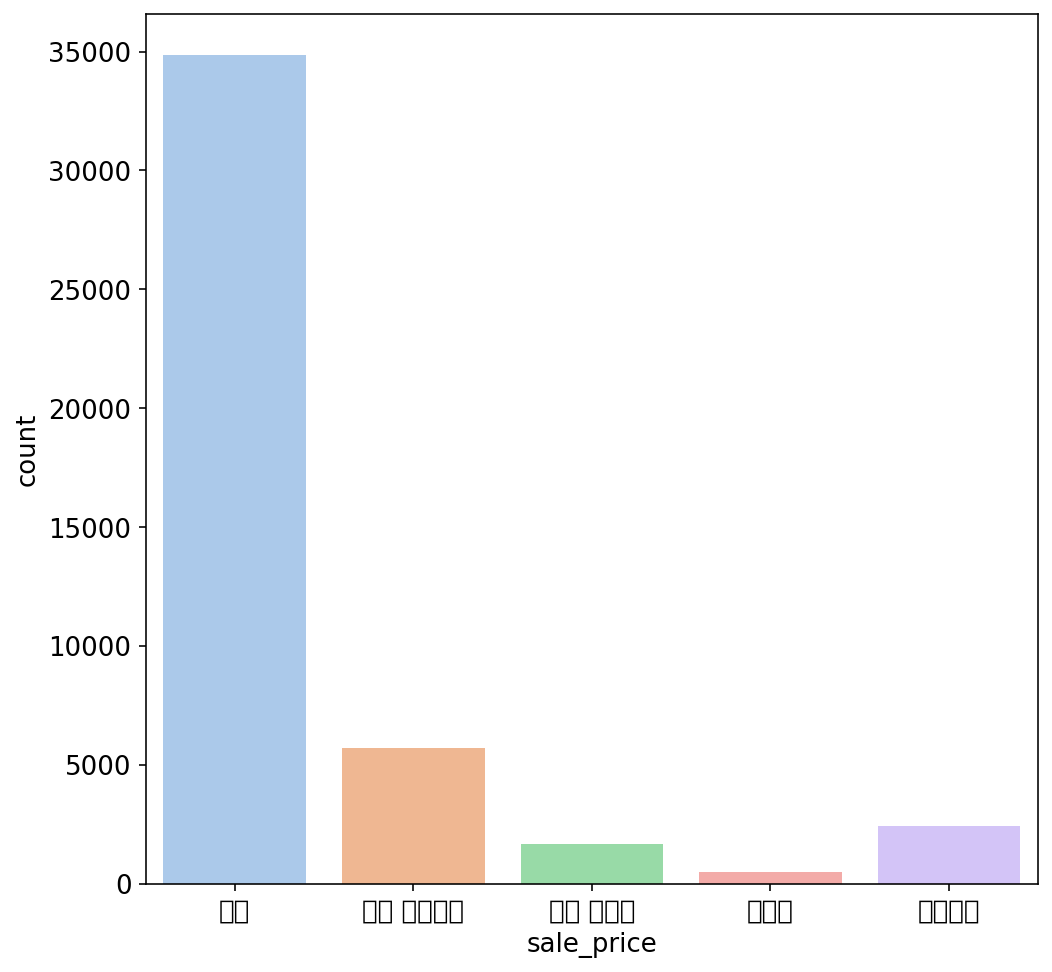

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(data=pay_sale, x='sale_price')
plt.show()

*  10만원부터 30만원까지 구간인 '보통'구간이 가장 많고, 두번째로 5만원부터 10만원구간인 '조금 저렴한편'구간이 많다.

##### 쿠폰할인금액 구간별 분석

쿠폰할인금액을 할인적음부터 할인 많음까지 총 다섯가지 구간별로 분류해, 쿠폰으로 할인받은 금액이 어떻게 형성되어 있는지 알아본다.

In [ ]:
#쿠폰할인금액
pay_coupon = pay.copy()

def coupon(x):
    if 0 < x <= 10000:
        return "할인적음"
    elif 10000 < x <= 50000:
        return "할인 조금적음"
    elif 50000 < x <= 100000:
        return "할인 보통"
    elif 100000 < x <= 300000:
        return "할인 조금많음"
    else:
        return "할인많음"

pay_coupon['coupon_discount_amount'] = pay_coupon['coupon_discount_amount'].map( coupon )

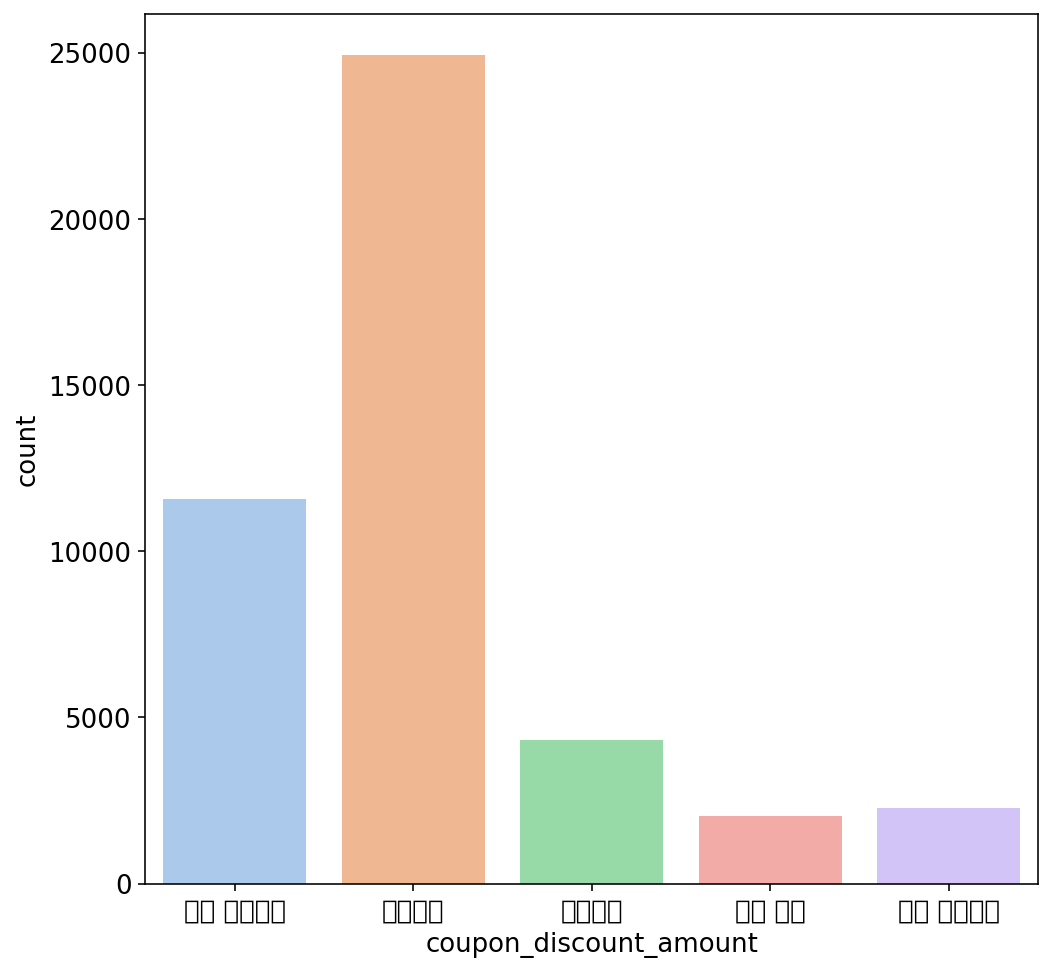

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(data=pay_coupon, x='coupon_discount_amount')
plt.show()

*  30만원 초과인 할인금액을 뜻하는 '할인많음'구간이 가장 많고, 두 번째로 1만원부터 5만원 구간인 '할인 조금많음'이 많다.

##### 최종결제금액 구간별 분석

최종결제금액을 저렴한편부터 비싼편까지 다섯가지 구간별로 분류해, 어떤 금액대가 많이 분포되어 있는지 알아본다.

In [ ]:
pay_transaction = pay.copy()

def transaction(x):
    if  x <= 50000:
        return "저렴한편"
    elif 50000 < x <= 100000:
        return "조금 저렴한편"
    elif 100000 < x <= 300000:
        return "보통"
    elif 300000 < x < 500000:
        return "조금 비싼편"
    else:
        return "비싼편"

pay_transaction['transaction_amount'] = pay_transaction['transaction_amount'].map(transaction)

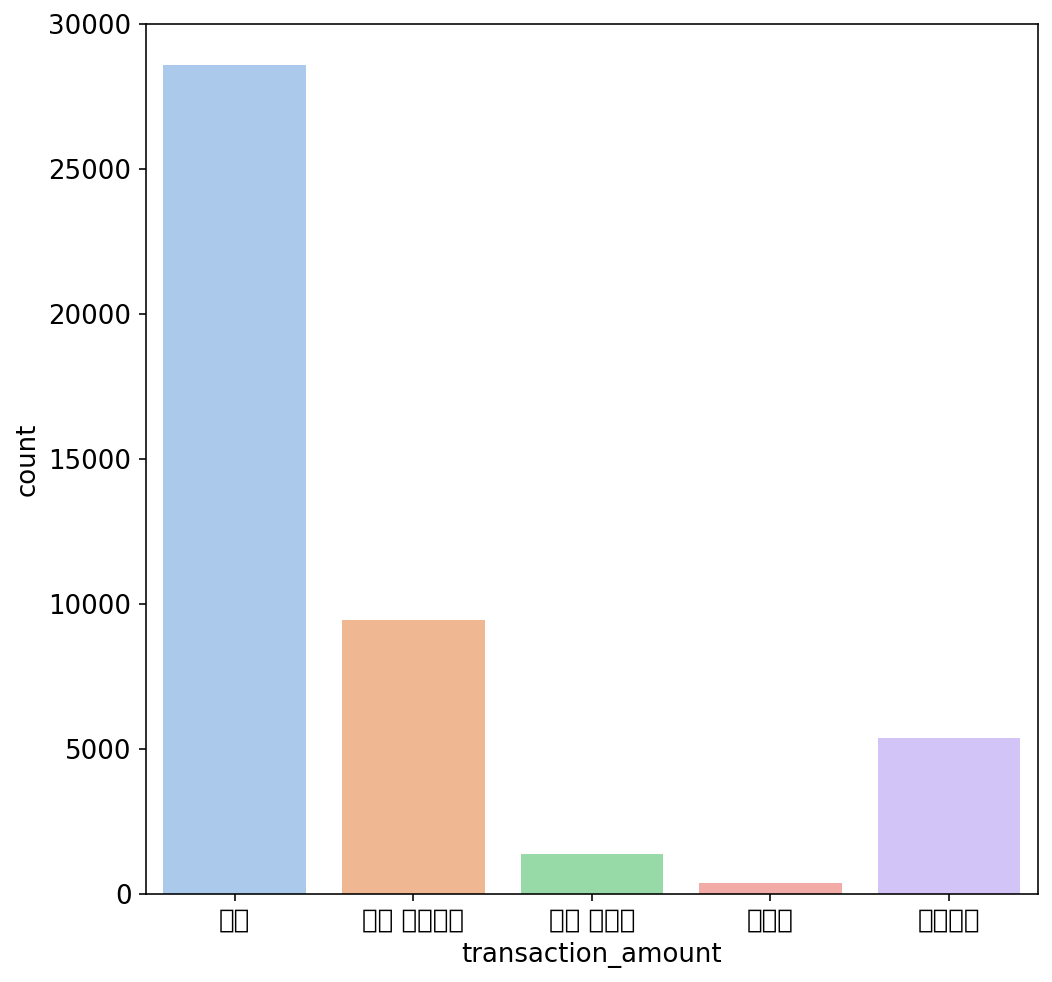

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(data=pay_transaction, x='transaction_amount')
plt.show()

*  10만원 ~ 30만원 구간인 보통이 가장 많고, 5만원 ~ 10만원 구간인 조금 저렴한편이 두번째로 많다.

In [ ]:
# 공백을 위한 코드

세 가지 구간별 분석을 합쳐서 비교하면 다음과 같다.

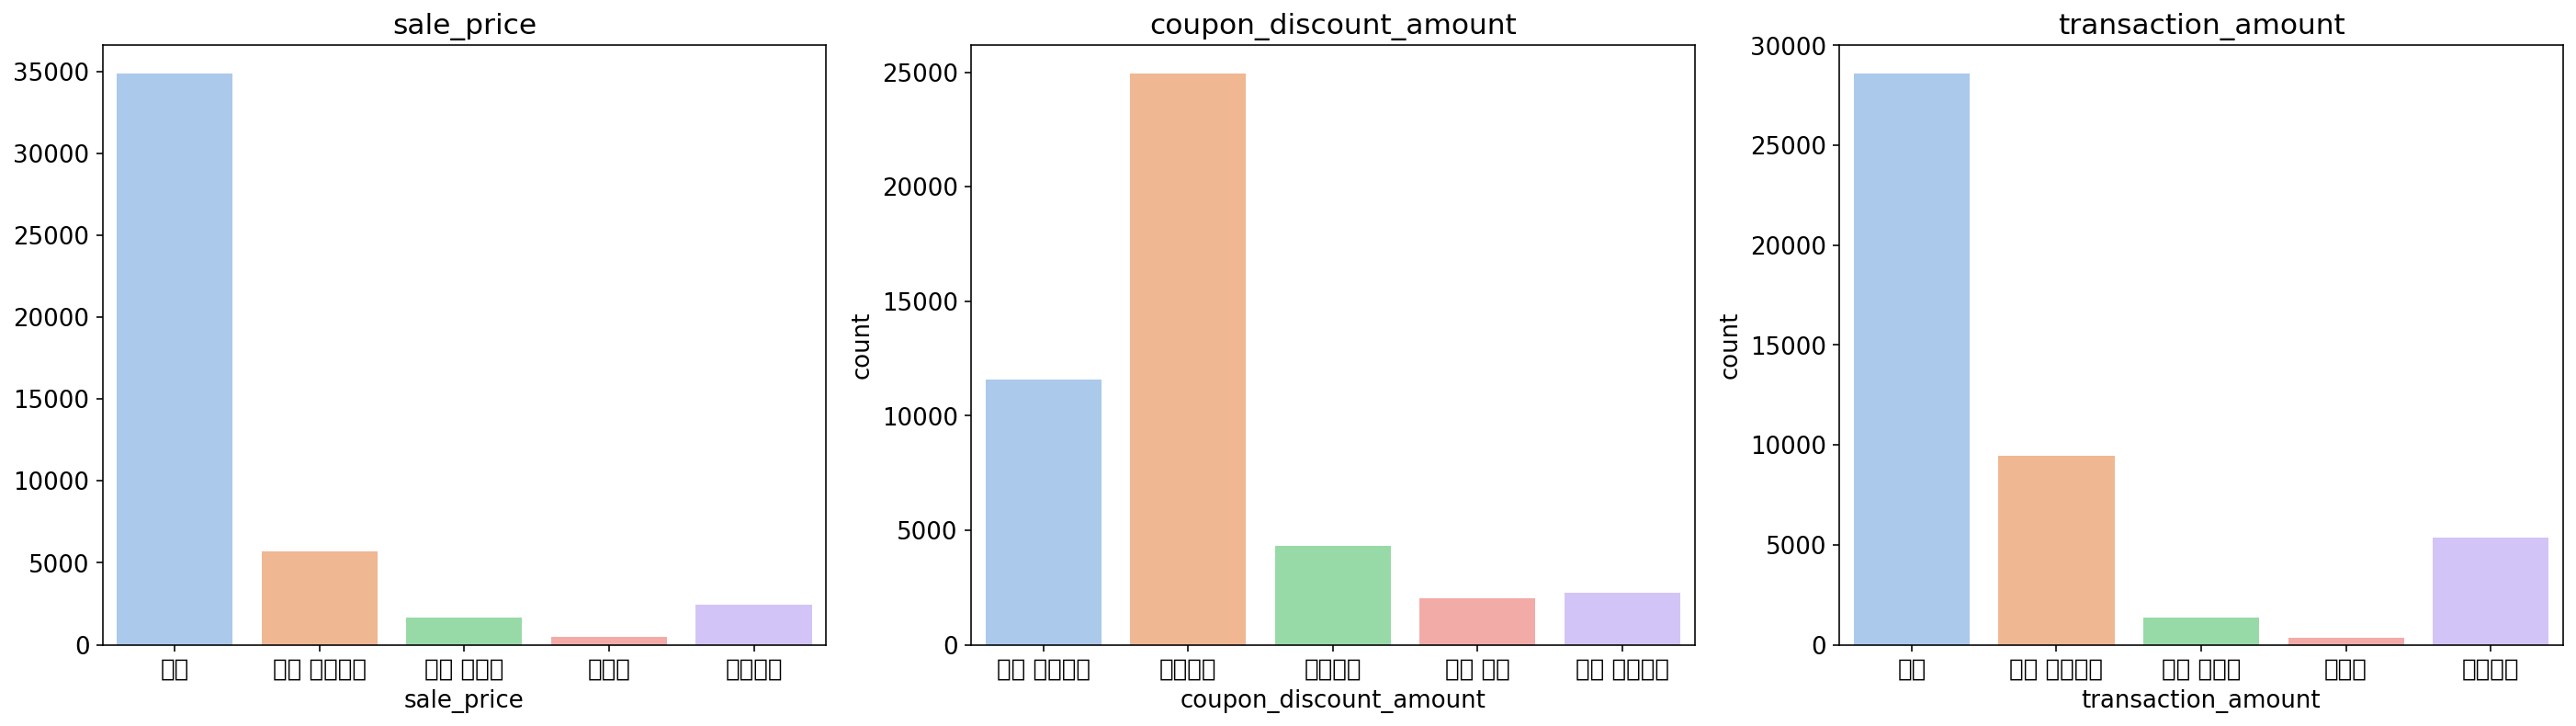

In [ ]:
fig = plt.figure(figsize=(24,6))
graph1 = fig.add_subplot(1,3,1)
sns.countplot('sale_price',data=pay_sale,ax=graph1)
graph1.set_title('sale_price')
graph1.set_ylabel('')
graph2 = fig.add_subplot(1,3,2)
sns.countplot('coupon_discount_amount',data=pay_coupon,ax=graph2)
graph2.set_title('coupon_discount_amount')
graph3 = fig.add_subplot(1,3,3)
sns.countplot('transaction_amount',data=pay_transaction,ax=graph3)
graph3.set_title('transaction_amount')
plt.show(fig)



*  강의판매금액은 10만원부터 30만원까지 구간인 '보통'구간이 가장 많고, 두번째로 5만원부터 10만원구간인 '조금 저렴한편'구간이 많다.

*  쿠폰할인금액은 30만원 초과인 할인금액을 뜻하는 '할인많음'구간이 가장 많고, 두 번째로 1만원부터 5만원 구간인 '할인 조금많음'이 많다.

*  최종결제금액은 10만원 ~ 30만원 구간인 '보통'이 가장 많고, 5만원 ~ 10만원 구간인 '조금 저렴한편'이 두번째로 많다.




#### 금액 범위별 분포

Sale_price가 25만원 미만인 구간

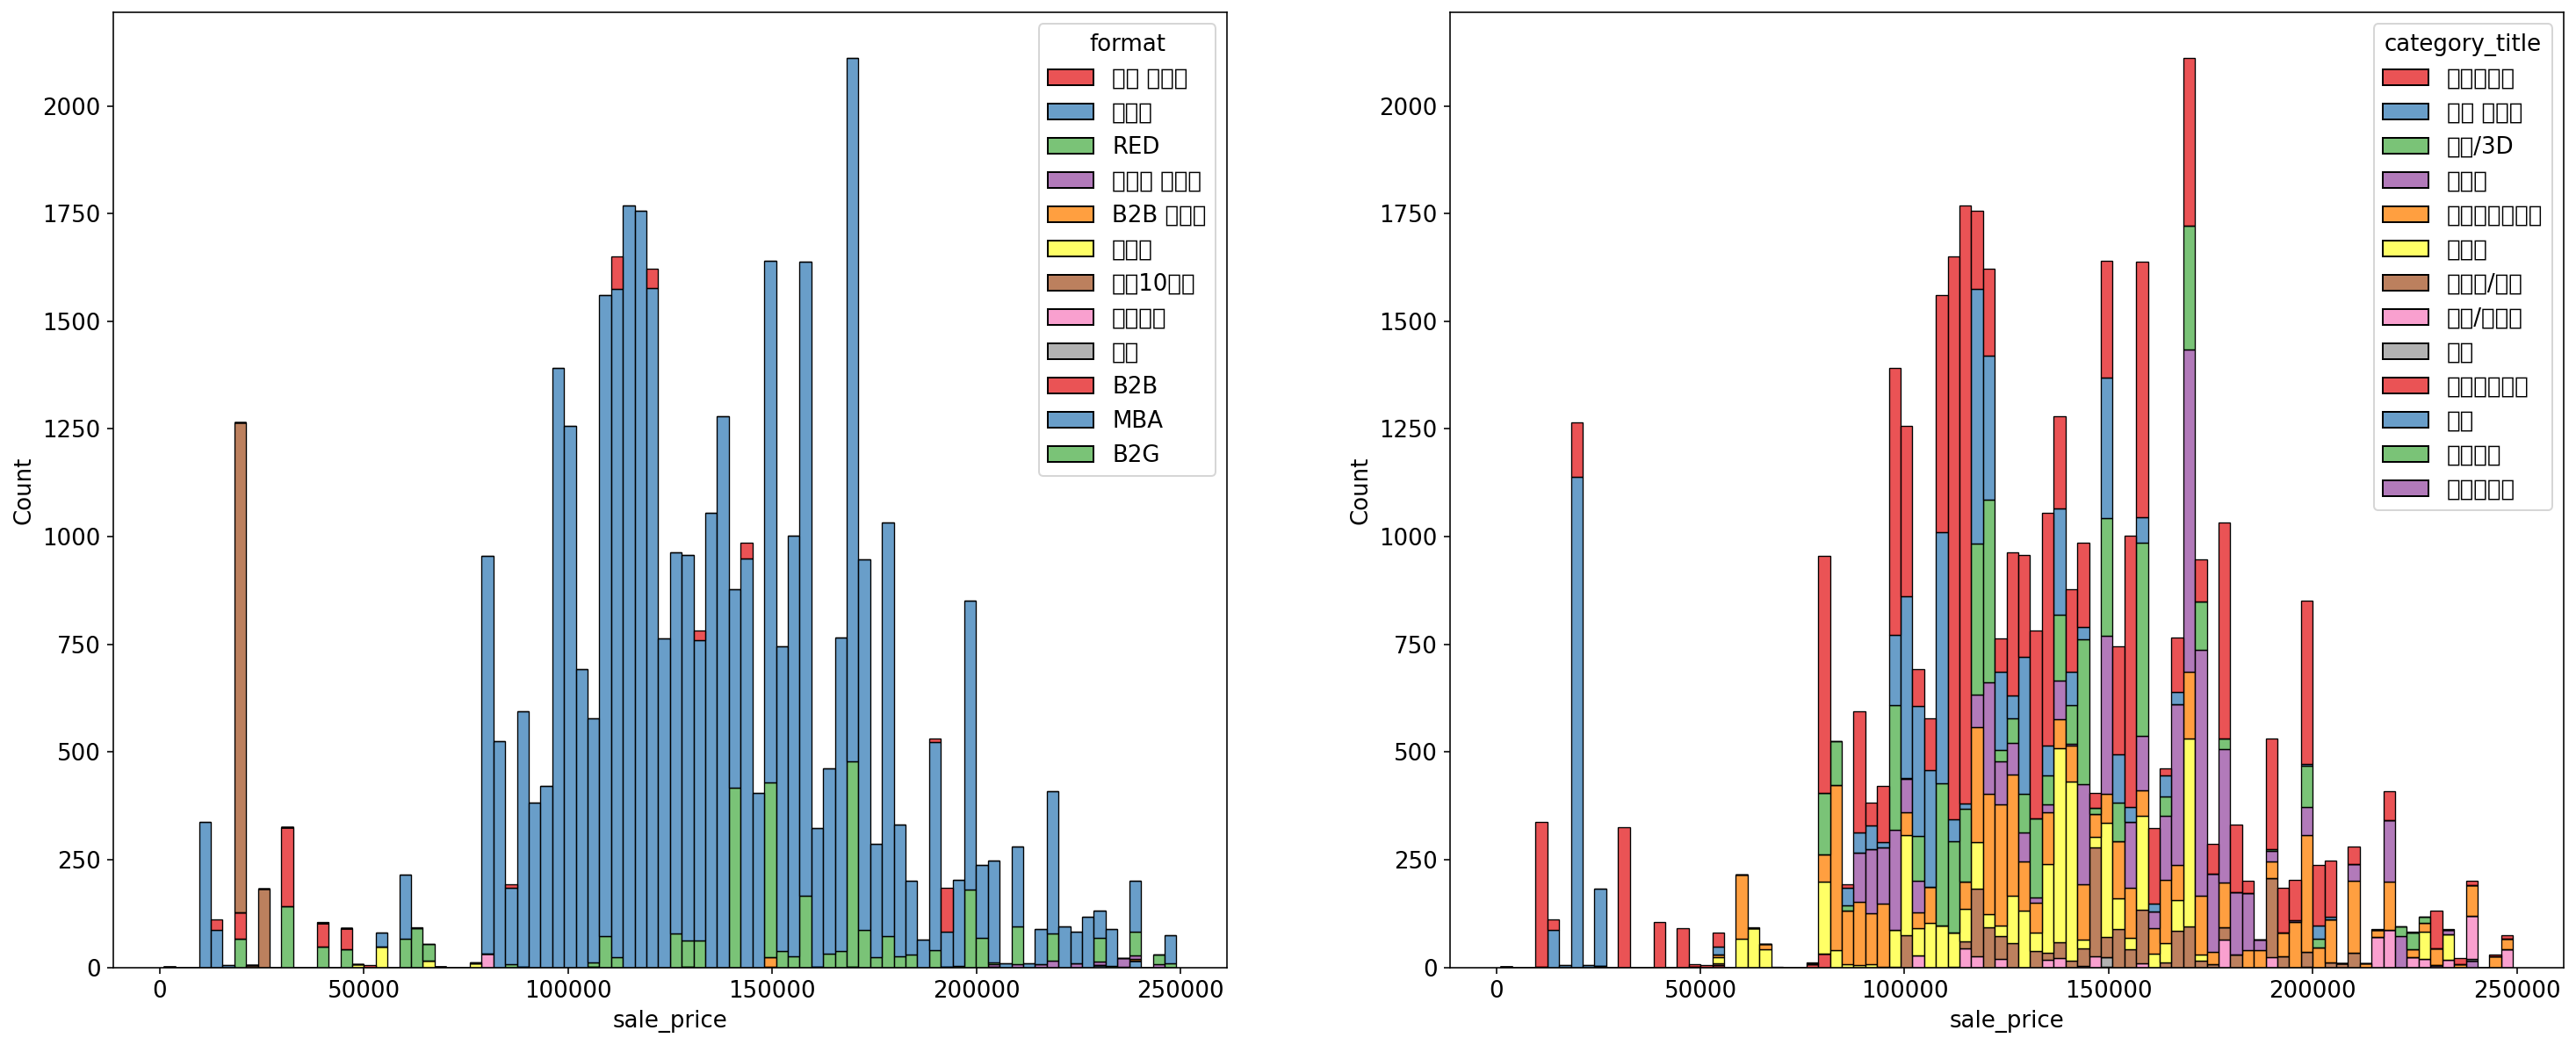

In [ ]:
# sc = pay[ (pay['sale_price'] < 250000 )& (['format'] ) ] # 25만원 미만
low_price = pay[pay.sale_price<250000.0]

plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.histplot(data=low_price , x ='sale_price', hue='format',multiple='stack',palette="Set1") 

plt.subplot(1,2,2)
sns.histplot(data=low_price, x='sale_price', hue='category_title', multiple='stack',palette="Set1")

plt.show()

In [ ]:
sc1 = pay[ pay['sale_price'] < 250000] ['course_title'].value_counts() # 25만원 미만
sc1h=sc1.head(10)
pd.DataFrame(sc1h)
# pay[ pay['sale_price'] < 100000] ['course_title'].value_counts().plot(kind='bar') # 50만원 미만

,course_title
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,1398
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,1139
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,1052
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,1050
나의 칼퇴치트키 엑셀유치원,751
올인원 패키지 : star741의 캐주얼 일러스트 드로잉,678
초격차 패키지 : 한번에 끝내는 디자인 툴,654
올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential,639
초격차 패키지 : 한 번에 끝내는 엑셀 실무,623
초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin,609


**25만원 구간**  
  
올인원-**프로그래밍-초격차** 패키지 영역에서 강세를 보이고 있으며, B2G-마케팅 영역에서 약세를 보이고 있다.

Sale_price가 25만원 ~ 100만원 미만인 구간

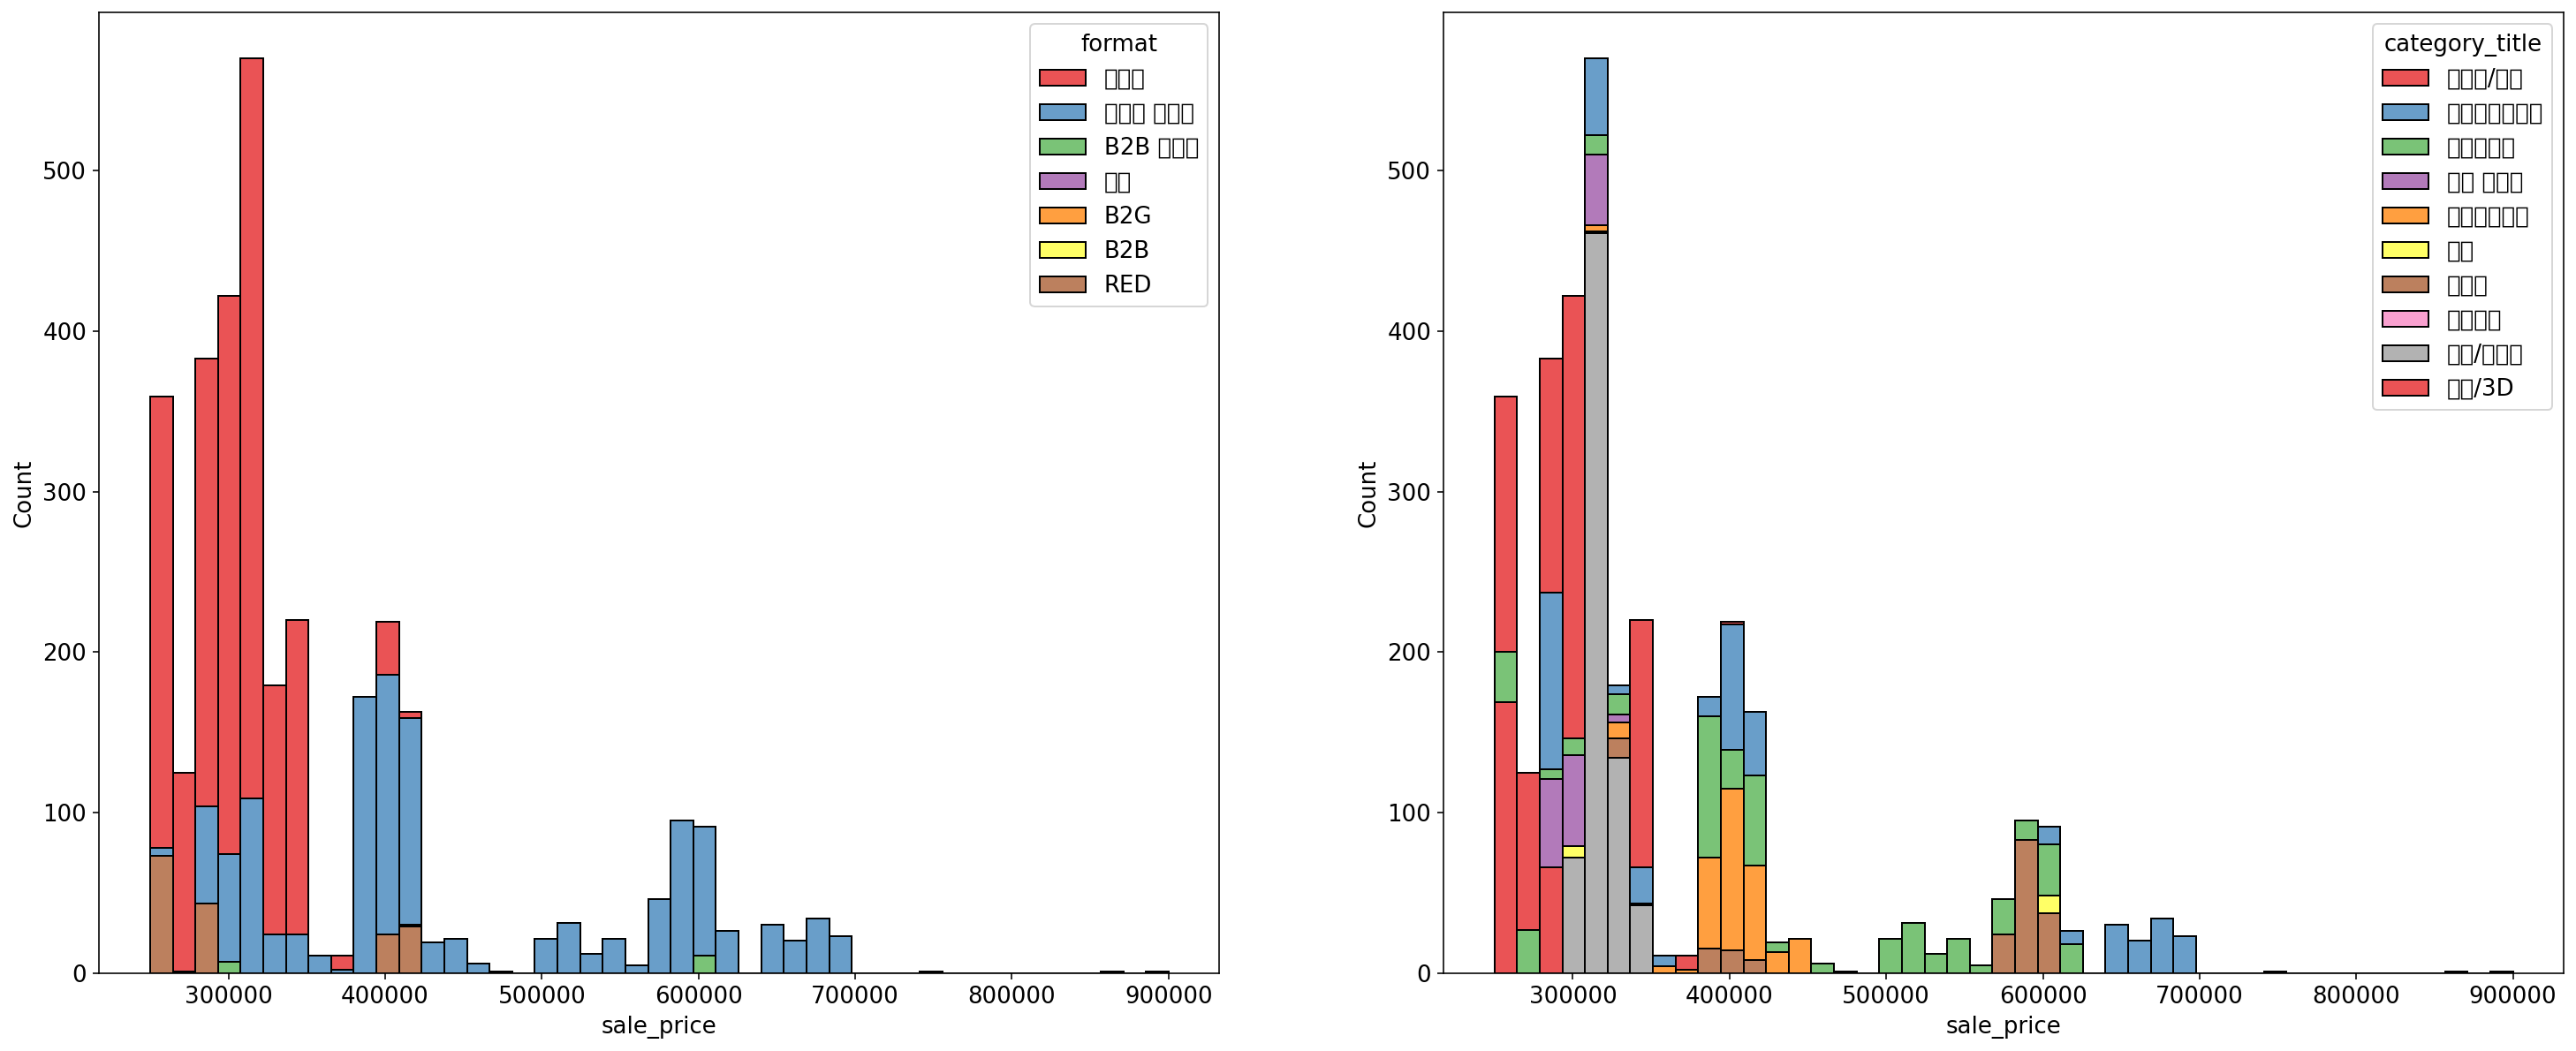

In [ ]:
middle_price = pay[pay.sale_price>=250000][pay.sale_price<1000000] #판매가격이 25만원 이상 100만원 미만
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.histplot(data=middle_price , x ='sale_price', hue='format',multiple='stack',palette="Set1") 

plt.subplot(1,2,2)
sns.histplot(data=middle_price, x='sale_price', hue='category_title', multiple='stack',palette="Set1")
plt.show()

In [ ]:
sc2 = pay[ ( (pay['sale_price'] > 250000) & (pay['sale_price'] < 1000000))]['course_title'].value_counts() 
sc2h=sc2.head(10)
pd.DataFrame(sc2h)

,course_title
올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략,497
올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초 (수강시간 제한),229
올인원 패키지 : 15명의 전문 애널리스트에게 배우는 산업&매크로 분석과 투자 전략,212
올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 심화 (수강시간 제한),201
초격차 패키지 : 한번에 끝내는 금융ㆍ투자(IB) 실무,183
올인원 패키지 : 권오상의 금융 아카데미 - 권오상 회계사의 자금조달 분석 및 가치평가 (수강시간 제한),167
매주)엑셀+데이터분석 온라인 완주반,157
매주)디지털 마케팅 온라인 완주반,144
매주)데이터 사이언스 온라인 완주반,126
매주)서비스 기획서 완성 온라인 완주반 2101,108


**25만원 ~ 100만원 구간**  

  
올인원-**부동산/금융**-올인원패키지 영역에서 강세를 보이고 있으며, B2B(G)-교육 영역에서 약세를 보이고 있다.

Sale_price가 100만원 ~Max인 구간

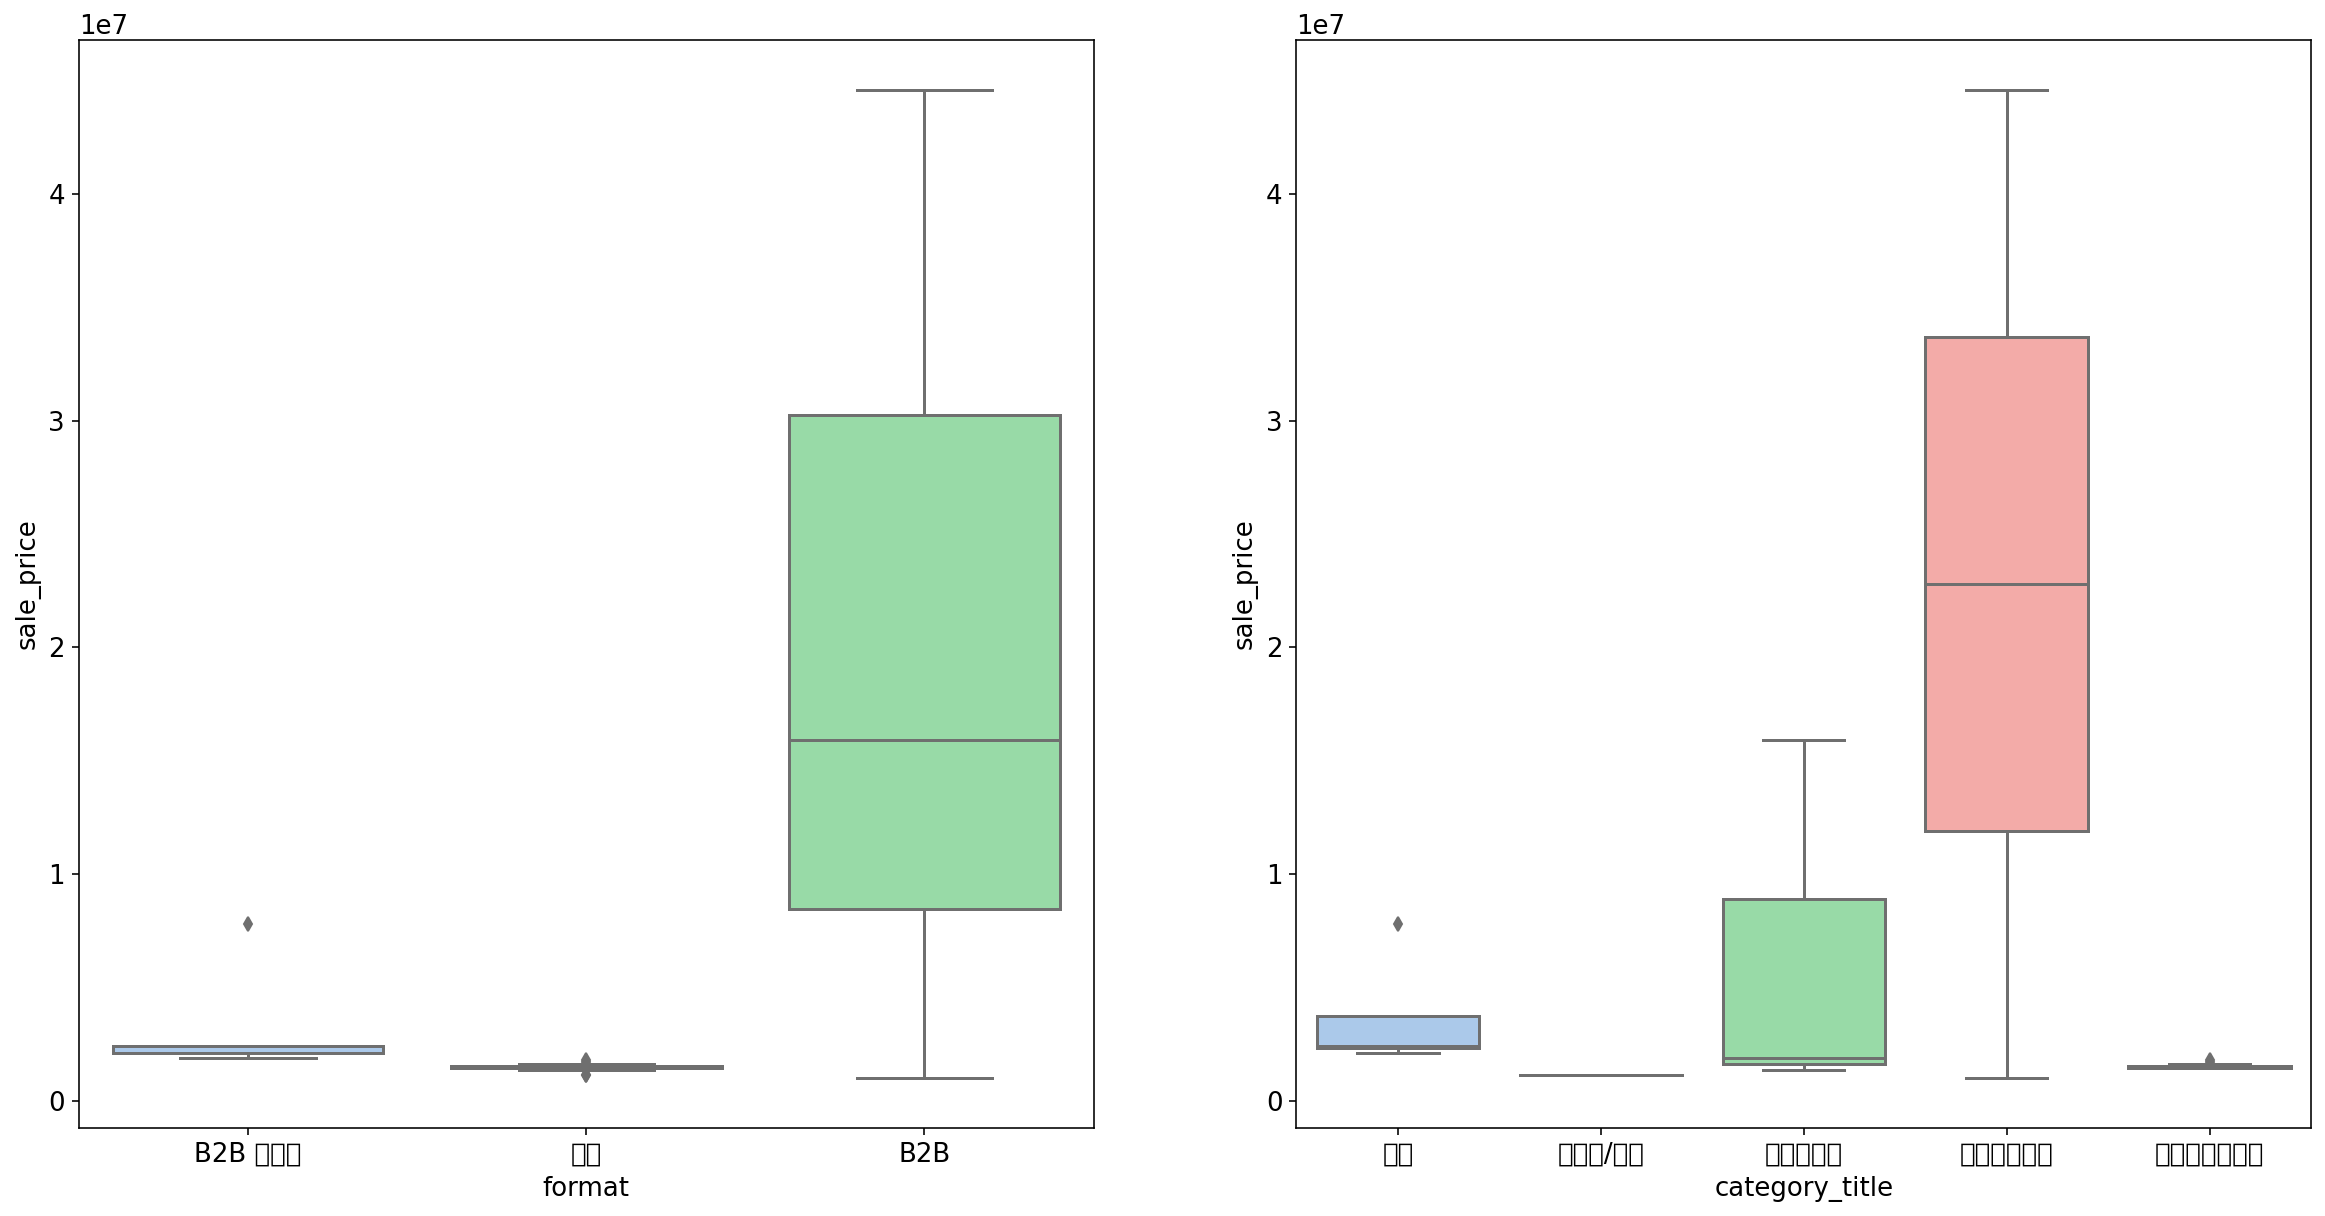

In [ ]:
high_price = pay[pay.sale_price>=1000000.0]#판매가격이 100만원 이상 200만원 미만
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
# sns.histplot(data=high_price , x ='sale_price', hue='format',multiple='stack',palette="Set1") 


sns.boxplot(y = "sale_price", x= 'format',data = high_price)


plt.subplot(1,2,2)
# sns.histplot(data=high_price, x='sale_price', hue='category_title', multiple='stack',palette="Set1")
sns.boxplot(y= "sale_price", x= 'category_title',data = high_price)


plt.show()



In [ ]:
sc3 = pay[ (pay['sale_price'] > 1000000) ]['course_title'].value_counts() 
sc3h=sc3.head(10)
pd.DataFrame(sc3h)

,course_title
Apache Spark을 이용한 빅데이터 분석 입문 15기,15
부동산 금융 실무 : 엑셀을 활용한 부동산 사업성 분석 16기,2
(B2B) 이노비즈협회 경영혁신 마일리지 제도 온라인 구독 (2021년 03월 2차),1
(B2B) 단국대학교 ICT혁신인재센터 온라인 구독 올 플랜,1
(B2B) NHN고도 온라인 구독 올 플랜,1
(B2B) KB국민카드 온라인 구독 싱글 플랜 (데이터베이스와 SQLD 4월),1
(B2B) KB증권 블록체인 개발 입문 과정,1
(B2B) 하나금융티아이 DT University(2021),1
(B2B) (주)이지엠앤씨 온라인 구독 올 플랜,1
OpenCV로 배우는 컴퓨터 비전 프로그래밍 22기,1


**100만원 ~ Max 구간**  

100만원 이상의 강의는 주로 기업, 전문인력 양성 강의 수가 많았고 금액 대의 편차가 가장 큰 구간임을 확인 할 수 있었으며 주로 데이터사이언스에 속하는 강의가 많았다는 점 또한 알 수 있었다.

### 강의별 분석

#### course_title 분석

In [ ]:
 # 기업,정부 고객 삭제
pay_p = pay.loc[(pay['format']!= 'B2B')&(pay['format']!='B2B 온라인')&(pay['format']!='B2G')]
pay_p['format'].value_counts()

올인원        38151
RED         3109
온라인 완주반     1350
하루10분컷      1327
스쿨 온라인       328
이벤트           82
아카이브          31
MBA           22
캠프            19
관리             1
Name: format, dtype: int64

In [ ]:
# course_title 중 300회 이상 결제된 강의들 목록
cnt_crs = pd.DataFrame(pay_p.loc[:,['course_title','subcategory_title']].value_counts())

cnt_crs[(cnt_crs[0] > 300)]

,,0
course_title,subcategory_title,
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프론트엔드 개발,1398
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상 편집,1139
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,백엔드 개발,1052
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,글쓰기/카피라이팅,1050
나의 칼퇴치트키 엑셀유치원,엑셀/VBA,751
올인원 패키지 : star741의 캐주얼 일러스트 드로잉,일러스트,678
초격차 패키지 : 한번에 끝내는 디자인 툴,디자인툴,654
올인원 패키지 : 김민태의 프론트엔드 아카데미 : 제 1강 JavaScript & TypeScript Essential,프론트엔드 개발,639
초격차 패키지 : 한 번에 끝내는 엑셀 실무,엑셀/VBA,623


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


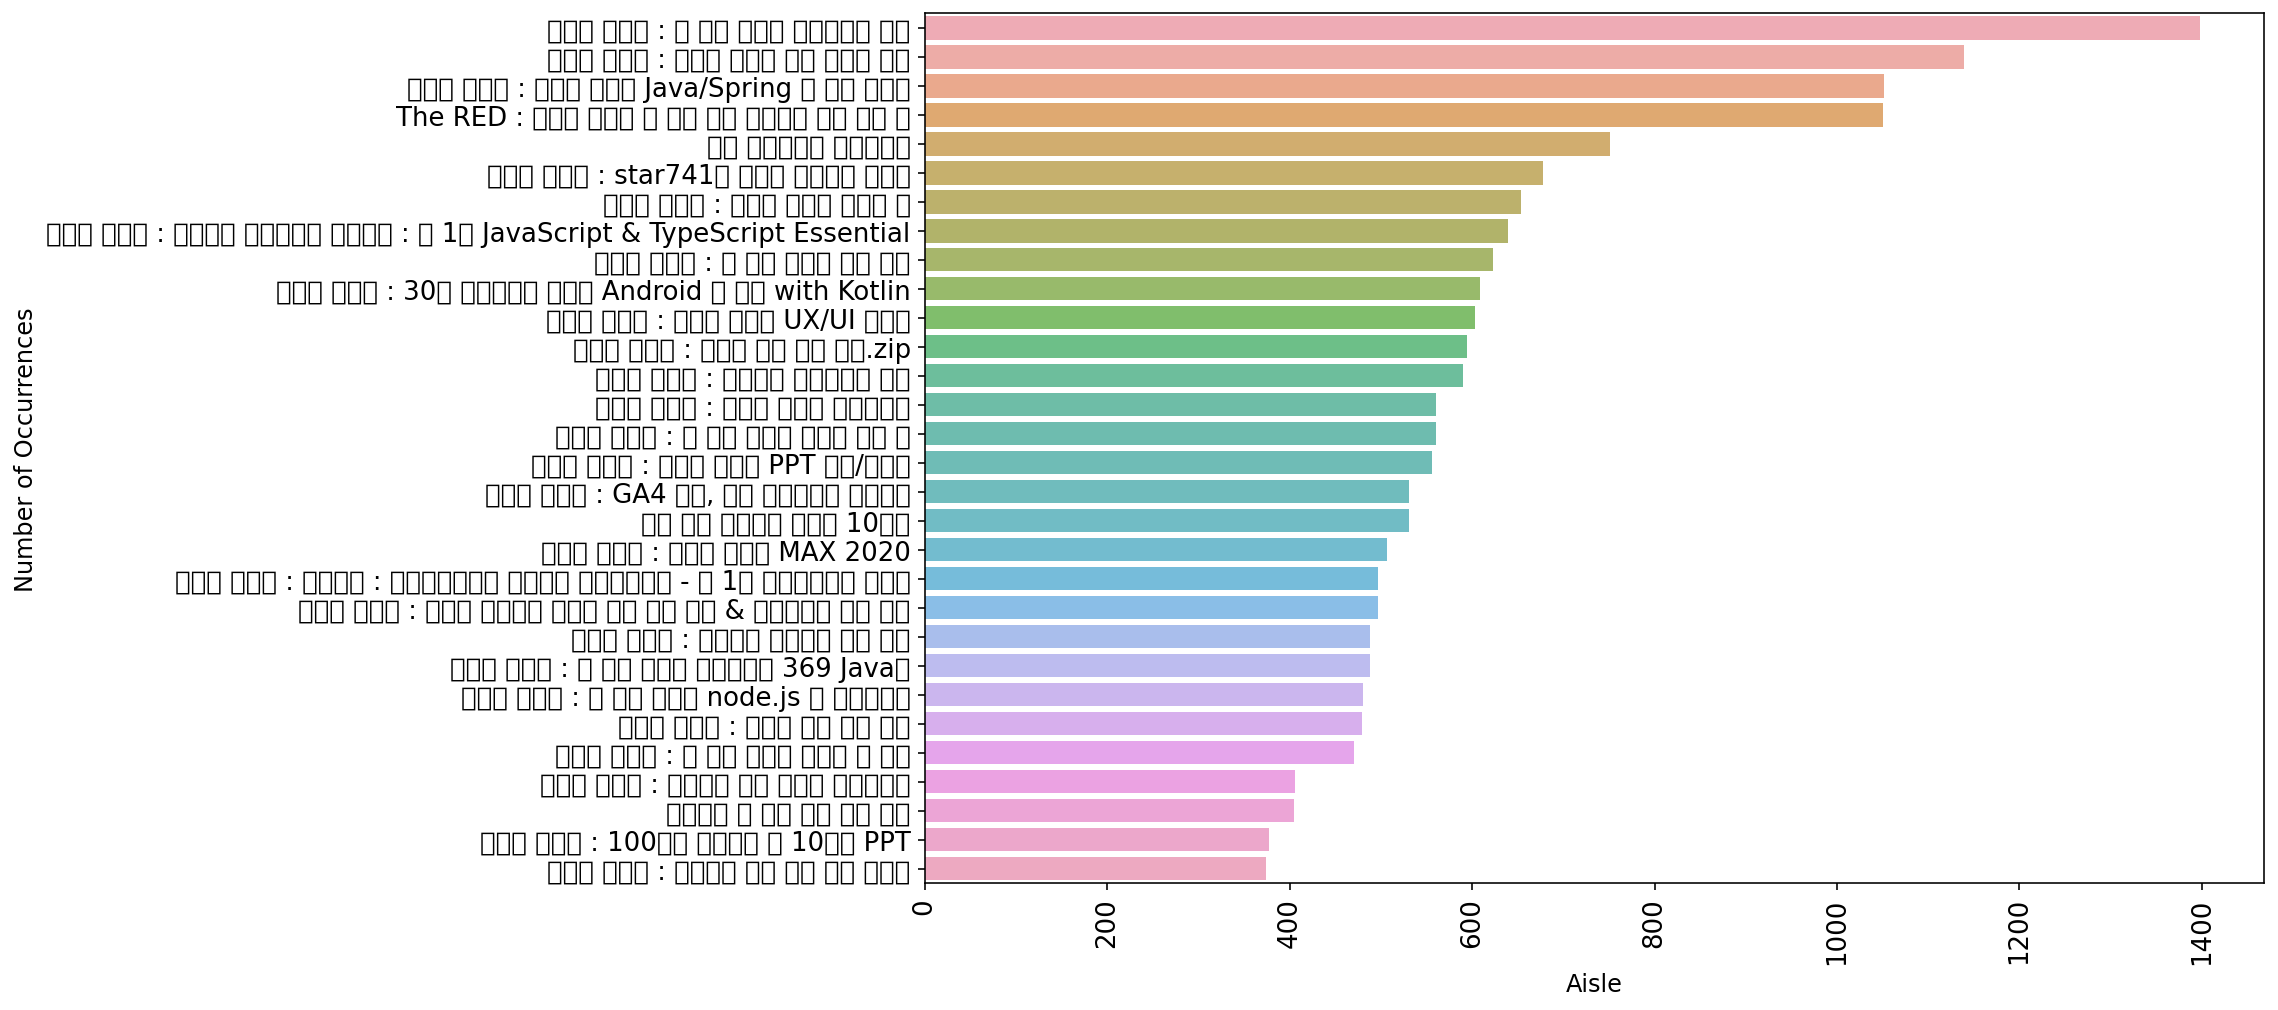

In [ ]:
cnt_crs = pay_p['course_title'].value_counts().head(30)
plt.figure(figsize=(12,8))
sns.barplot(y=cnt_crs.index, x=cnt_crs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

* 개인 고객에게는 최신 트랜드의 프로그래밍과 영상,디자인 관련 상품 들이 패키지 상품으로서 많이 팔린다. 
 * ex) 프론트앤드, 딥러닝, 웹/앱개발,데이터분석, UX/UI, 모션그래픽 등
* 회사 실무나 투자에 도움이 되는 상품들이 많이 팔린다.
 * ex) 필수스킬,엑셀, 글쓰기, 스피치, 주식 시장 분석, 부동산, 돈 버는 등

#### 강좌 재구매

In [ ]:
#  같은 강좌 재구매자수 
pay_re = pay_p.groupby(['course_title','subcategory_title', 'customer_id'])['id'].aggregate("count").reset_index()
pay_re = pay_re[(pay_re['id'] >= 2)]

pay_re_cnt = pay_re.groupby(['course_title','subcategory_title'])['customer_id'].aggregate("count").reset_index()
pay_re_cnt.sort_values(by='customer_id', ascending = False).head(30)

,course_title,subcategory_title,customer_id
106,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프론트엔드 개발,10
107,초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,백엔드 개발,9
86,초격차 패키지 : 30개 프로젝트로 배우는 Android 앱 개발 with Kotlin,모바일앱,9
18,스프링 아카데미아,기타,7
56,올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략,주식 투자,7
58,올인원 패키지 : 부동산 디벨로퍼,부동산 개발,6
113,초격차 패키지 : 한번에 끝내는 모션그래픽,모션그래픽,6
108,초격차 패키지 : 한번에 끝내는 PPT 제작/디자인,PPT/보고서,6
97,초격차 패키지 : 한 번에 끝내는 데이터 분석 툴,데이터분석,6
3,The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,글쓰기/카피라이팅,6


* 재구매율이 높은 강좌들은 취업 보다는 자기계발이나 직무관련 강좌가 많아보인다. 이것은 직장인들이 구매했다가 수강기간을 놓쳐서 다시 구매해서 듣는 것으로 보인다. 

* 또한 비교적 베스트셀러 강좌들과 겹치는 것으로 보아 수강기간을 놓쳤더라도 인기가 있어야 재구매율이 높은 것으로 보인다.

#### 할인을 받아 결제한 사람들의 비율

Initial thought
*   할인이 되는 강의일수록 결제 수가 더욱더 많을 것이다


In [ ]:
print(len(pay[pay['sale_price']!=pay['transaction_amount']]))
print(len(pay[pay['sale_price']==pay['transaction_amount']]))

20346
24788


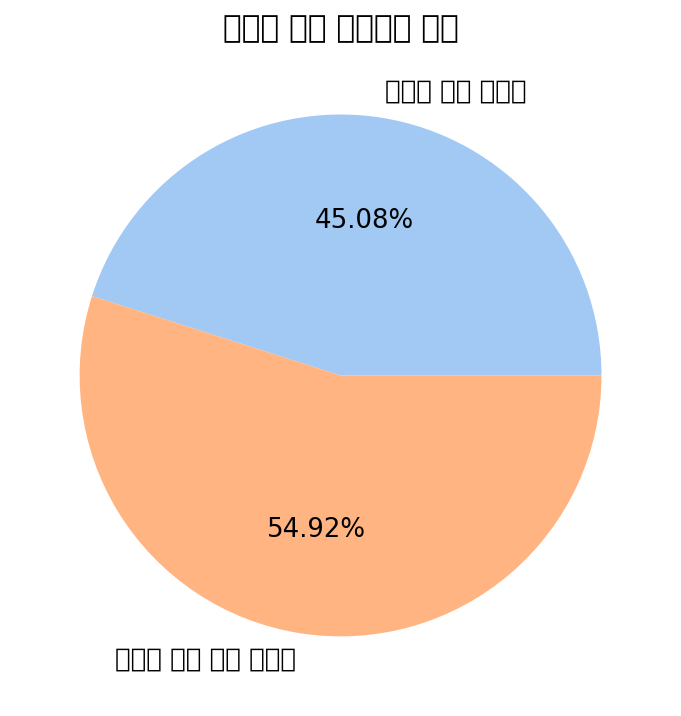

In [ ]:
# 할인을 받은 사람들 
plt.figure(figsize=(8,6))
coupon_usage = [len(pay[pay['sale_price']!=pay['transaction_amount']]), len(pay[pay['sale_price']==pay['transaction_amount']])]
location = ['할인을 받은 사람들','할인을 받지 않은 사람들']
colors = sns.color_palette('pastel')
plt.pie(coupon_usage, labels=location, colors=colors, autopct='%1.2f%%')
plt.title('할인을 받은 사람들의 비율')
plt.show()

할인이 되는 강의일수록 결제 수가 더욱더 많을 것이다라는 예측을 벗어나는것으로 확인

#### 할인 결제시 쿠폰 사용 비율

In [ ]:
temp = pay.copy()
temp['coupon_usage'] = 1
temp.loc[temp.coupon_title == '사용안함', 'coupon_usage'] = 0

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


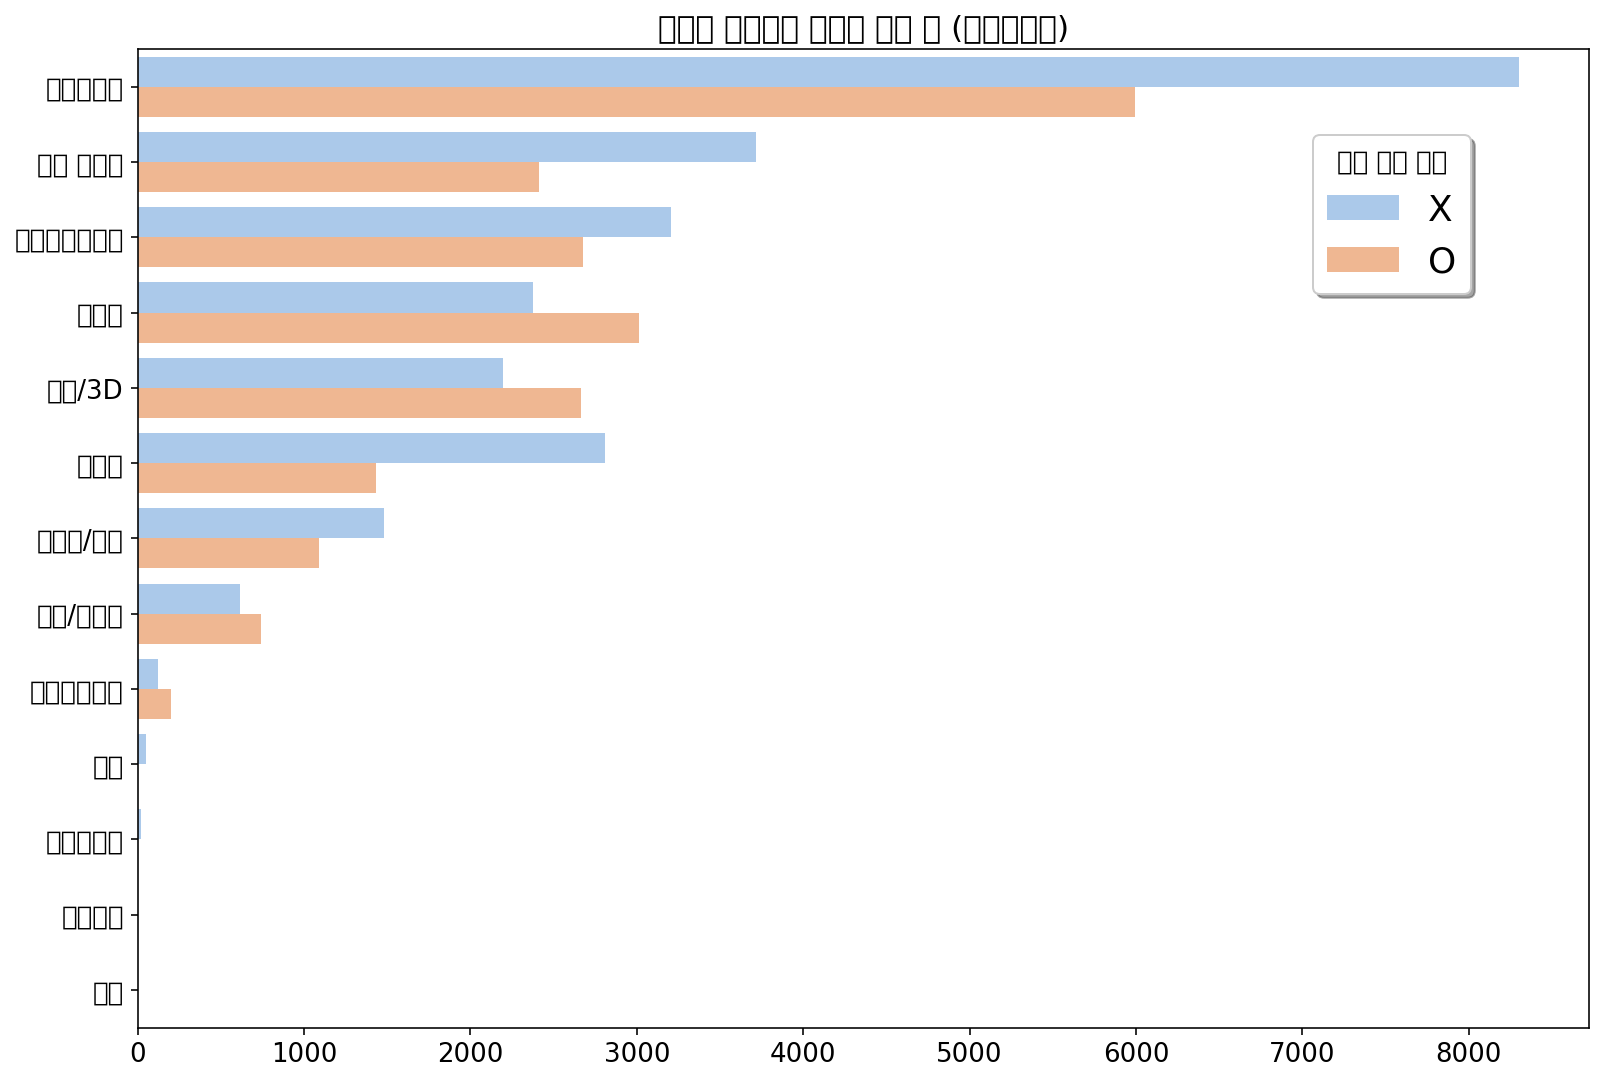

In [ ]:
plt.figure(figsize = (13,9))
p1 = sns.countplot(data = temp,
                  y = temp.category_title,
                  hue = temp.coupon_usage,
                  order = temp.category_title.value_counts().index)
p1.set_title('쿠폰을 사용해서 판매된 강의 수 (카테고리별)')
p1.set_xlabel('')
p1.set_ylabel('')
plt.legend(('X','O'), 
           title = '쿠폰 사용 여부', 
           loc = (0.81,0.75), 
           frameon=True, 
           shadow=True,
          fontsize=18)

plt.show()

In [ ]:
pg = pd.DataFrame(temp.loc[temp.category_title == '프로그래밍']['coupon_usage'])
dgn = pd.DataFrame(temp.loc[temp.category_title == '디자인']['coupon_usage'])
ds = pd.DataFrame(temp.loc[temp.category_title == '데이터사이언스']['coupon_usage'])
wl = pd.DataFrame(temp.loc[temp.category_title == '업무 생산성']['coupon_usage'])

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


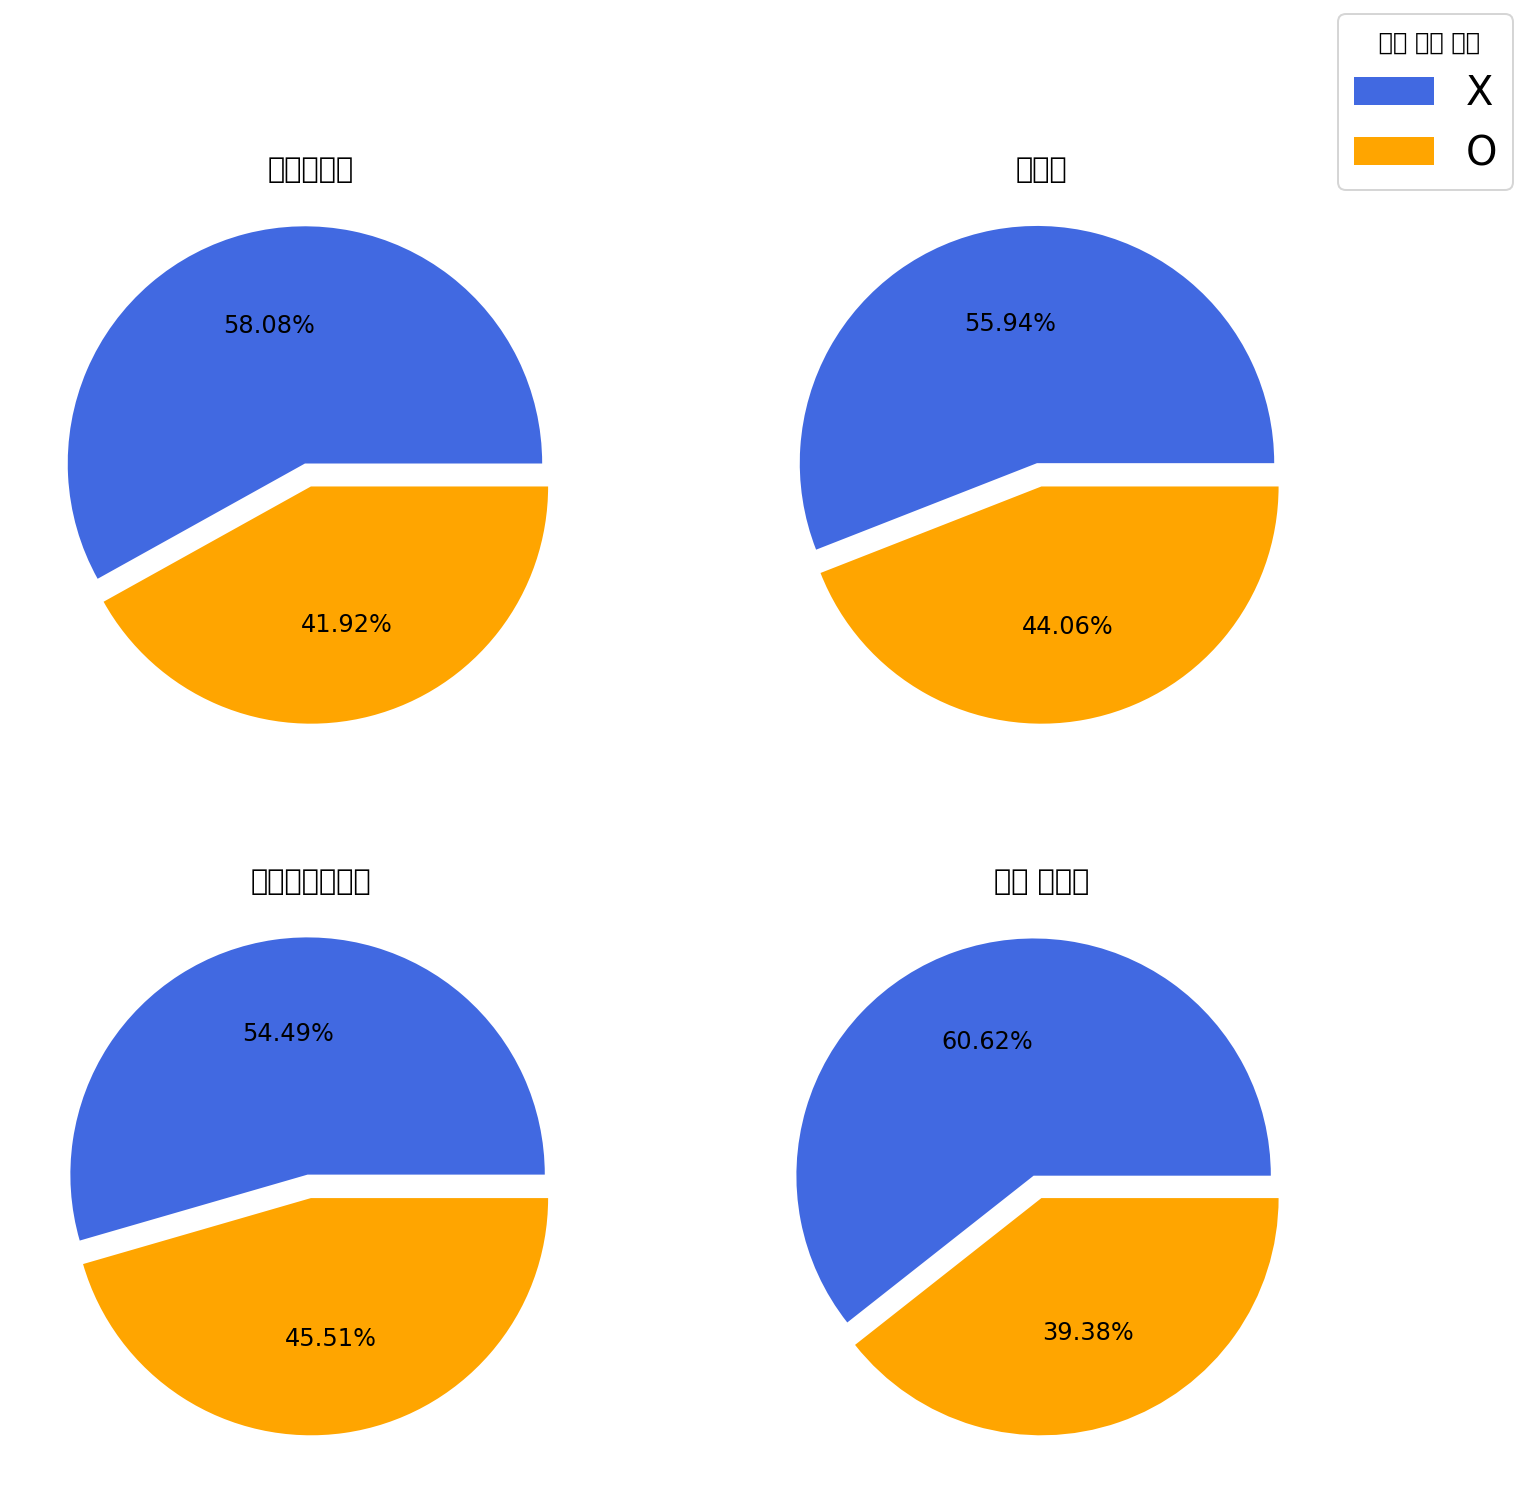

In [ ]:
plt.figure(figsize = (12,12))
plt.rc('font', size = 12)

plt.subplot(2,2,1)
p1 = pg['coupon_usage'].value_counts().plot.pie(explode=[0.1,0],
                                                autopct='%1.2f%%',
                                               labels=['',''],
                                               colors=['royalblue','orange'])
p1.set_title('프로그래밍')
p1.set_ylabel('')
p1.set_xlabel('')

plt.subplot(2,2,2)
p2 = dgn['coupon_usage'].value_counts().plot.pie(explode=[0.1,0],
                                                 autopct='%1.2f%%',
                                                labels=['',''],
                                                colors=['royalblue','orange'])
p2.set_title('디자인')
p2.set_ylabel('')
p2.set_xlabel('')
plt.legend(('X', 'O'),
           title = ' 쿠폰 사용 여부',
           loc = (1.0,1.0),
           fontsize = 20)

plt.subplot(2,2,3)
p3 = ds['coupon_usage'].value_counts().plot.pie(explode=[0.1,0],
                                                autopct='%1.2f%%',
                                               labels=['',''],
                                               colors=['royalblue','orange'])
p3.set_title('데이터사이언스')
p3.set_ylabel('')
p3.set_xlabel('')

plt.subplot(2,2,4)
p4 = wl['coupon_usage'].value_counts().plot.pie(explode=[0.1,0],
                                                 autopct='%1.2f%%',
                                                labels=['',''],
                                                colors=['royalblue','orange'])
p4.set_title('업무 생산성')
p4.set_ylabel('')
p4.set_xlabel('')

plt.show()

#### 여러개의 강의를 들은 사람

In [ ]:
# id가 같은 중복값 찾기 
dup_id = pay.duplicated(['id'])
dup_id.sum()

0

In [ ]:
# customer_id가 같으면 한사람
dup_cid = pay.duplicated(['customer_id'])
dup_cid.sum()

10379

In [ ]:
# 제일 많이 들은 사람을 찾아보자
pay[pay['customer_id'].duplicated()]['customer_id'].value_counts()

98685.0     47
50769.0     36
40783.0     27
65665.0     25
20784.0     23
            ..
160240.0     1
441566.0     1
566549.0     1
288961.0     1
384003.0     1
Name: customer_id, Length: 6353, dtype: int64

In [ ]:
# 제일 많이 들은 사람을 분석해보자
len(pay[pay['customer_id']==98685.0])

48

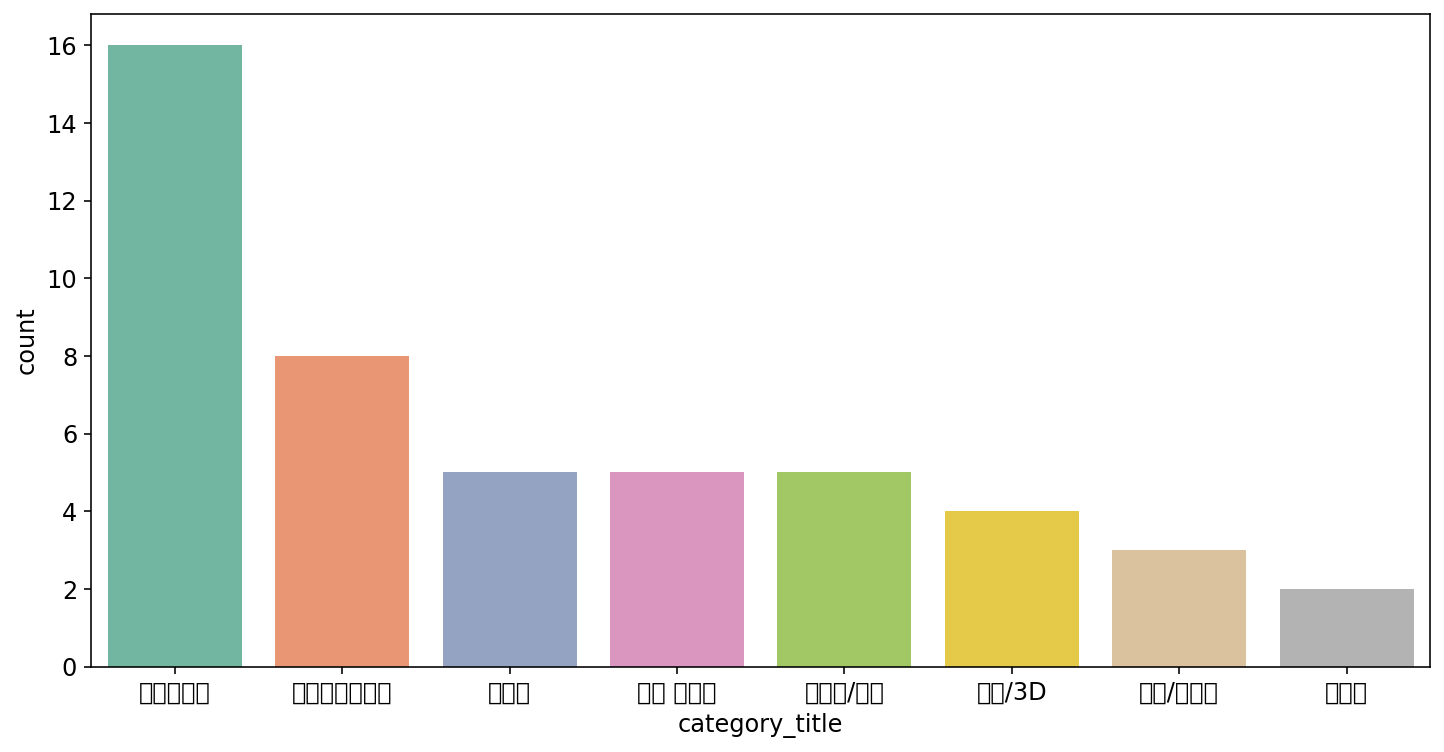

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=pay[pay['customer_id']==98685.0], x='category_title', order = pay[pay['customer_id']==98685.0]['category_title'].value_counts().index, palette='Set2')
plt.show()

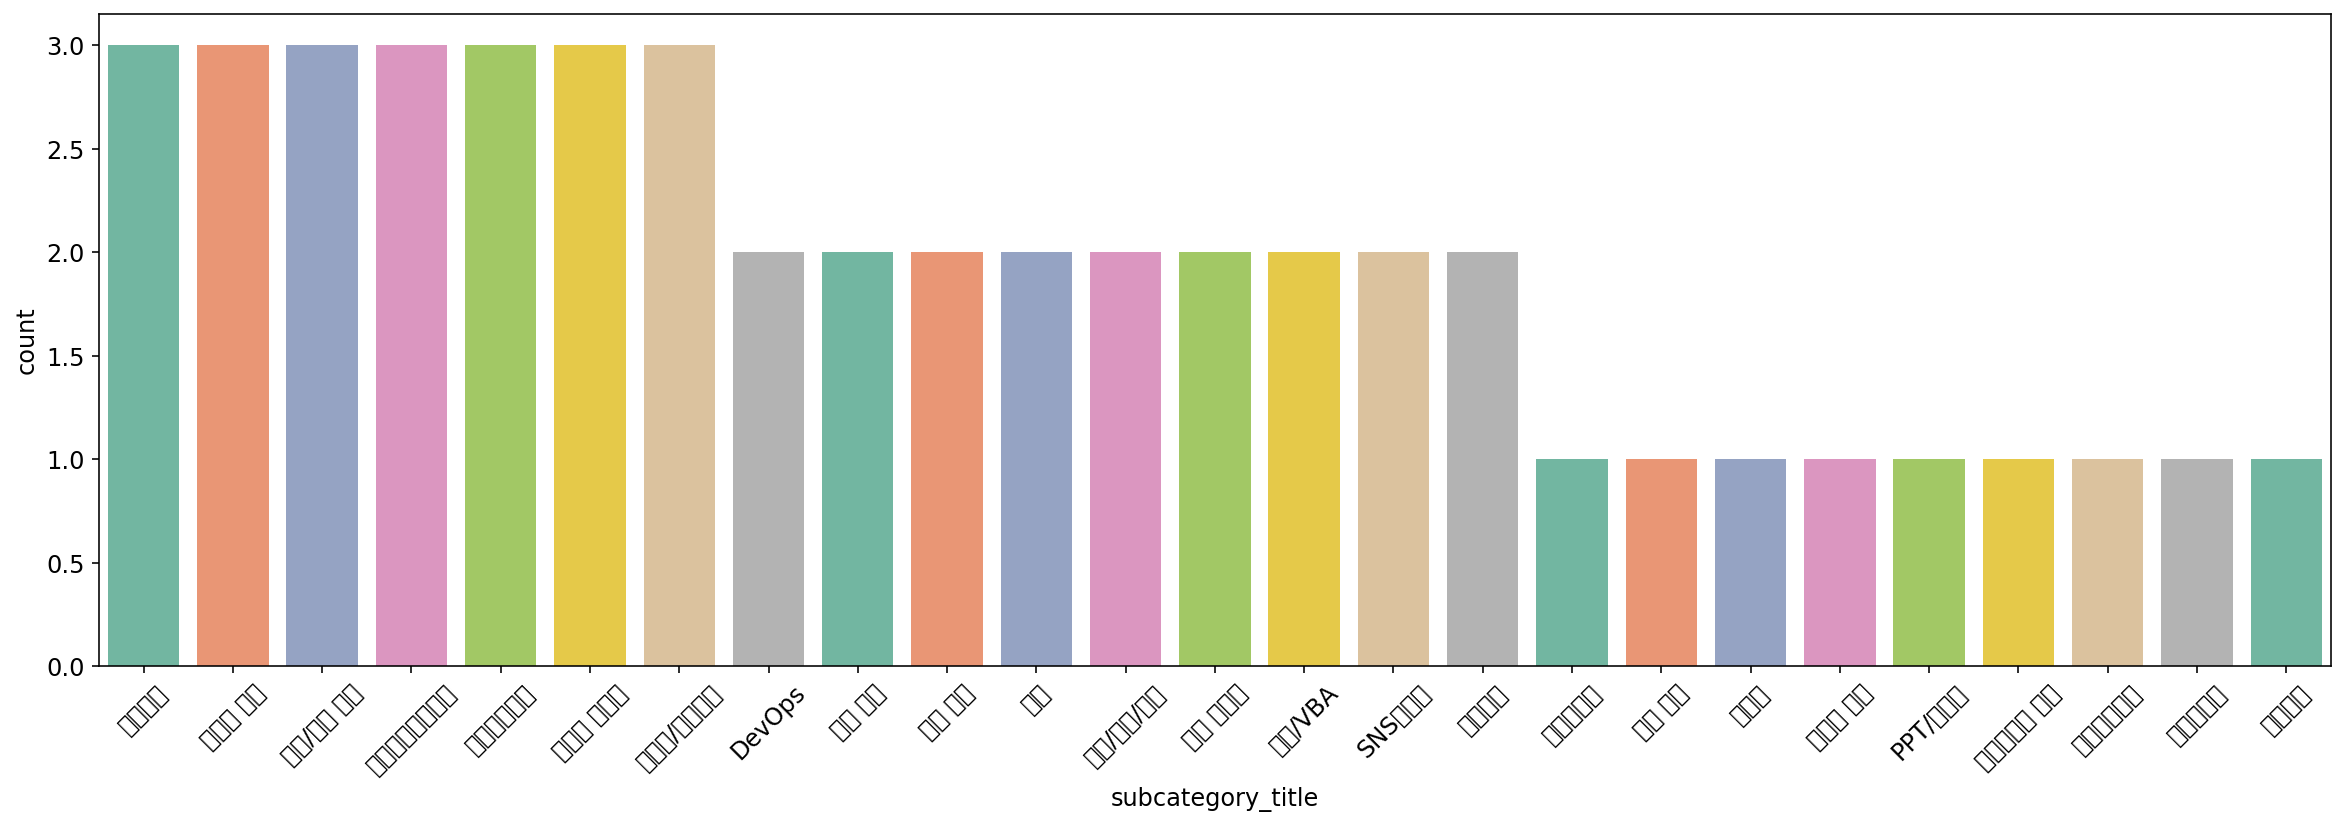

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(data=pay[pay['customer_id']==98685.0], x='subcategory_title', order = pay[pay['customer_id']==98685.0]['subcategory_title'].value_counts().index, palette='Set2')
plt.xticks(rotation=45)
plt.show()

프로그래밍 과목들을 제일 많이 듣는것으로 보여진다

In [ ]:
pay[pay['customer_id']==98685.0]

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,...,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,order_hour,order_date,discount
1932,5119,984635,98685.0,201998.0,PAYMENT,COMPLETED,올인원 패키지 : iOS 앱 개발,프로그래밍,올인원,2021-04-01 10:19:28,...,수강생 50만명 돌파 기념 감사제 쿠폰,87200.0,112000.0,ETC,CARD,모바일앱,2020-01-14,10시,01일,87200.0
2388,6337,988664,98685.0,204342.0,PAYMENT,COMPLETED,"올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기",마케팅,올인원,2021-04-03 00:08:50,...,GA4 30% 할인쿠폰,23700.0,79000.0,ETC,CARD,데이터마케팅,2021-04-02,00시,03일,23700.0
2637,6936,990338,98685.0,201798.0,PAYMENT,COMPLETED,올인원 패키지 : 브랜딩 2020,마케팅,올인원,2021-04-04 10:08:51,...,사용안함,0.0,162100.0,ETC,CARD,SNS마케팅,2019-11-11,10시,04일,0.0
7910,22014,1037252,98685.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-04-28 21:12:57,...,초격차 패키지 : 한번에 끝내는 3D 디자인툴 30% 할인 쿠폰,65700.0,219000.0,INICIS,CARD,디자인툴,2021-04-23,21시,28일,65700.0
8509,23448,1041392,98685.0,204775.0,PAYMENT,COMPLETED,입만 열면 인정받는 스피치 10분컷,업무 생산성,하루10분컷,2021-04-30 09:21:48,...,사용안함,0.0,19500.0,INICIS,CARD,커뮤니케이션,2021-04-28,09시,30일,0.0
10252,28280,1054819,98685.0,204773.0,PAYMENT,COMPLETED,이것만 배우면 끝 PPT 10분컷,업무 생산성,하루10분컷,2021-05-06 09:33:53,...,사용안함,0.0,19900.0,INICIS,CARD,PPT/보고서,2021-04-28,09시,06일,0.0
11982,33455,1069671,98685.0,204631.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍,프로그래밍,올인원,2021-05-13 23:03:57,...,[럭키룰렛] 올인원패키지,10000.0,79000.0,INICIS,CARD,백엔드 개발,NaT,23시,13일,10000.0
18123,50612,1127326,98685.0,201520.0,PAYMENT,COMPLETED,올인원 패키지 : AWS/Docker 클라우드 서버 구축,프로그래밍,올인원,2021-06-08 11:12:38,...,5월 페이백 프로모션 쿠폰,80000.0,112500.0,INICIS,CARD,DevOps,NaT,11시,08일,80000.0
18126,50625,1127354,98685.0,202698.0,PAYMENT,COMPLETED,합격 패스 : 데이터베이스와 SQLD,프로그래밍,올인원,2021-06-08 11:21:56,...,사용안함,0.0,79000.0,INICIS,CARD,개발자 커리어,2020-05-29,11시,08일,0.0
19981,56145,1147494,98685.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-06-17 17:37:55,...,[시크릿쿠폰] 유튜브 크리에이터 되기 20% 할인쿠폰,21800.0,109000.0,KAKAO,CARD,영상 편집,2021-06-15,17시,17일,21800.0


In [ ]:
len(ref[ref['customer_id']==98685.0])

0

환불을 한개도 신청하지 않은거로 보인다

#### 수강생이 많은 과목 분석

In [ ]:
pay['course_id'].value_counts()

203720.0    1398
203178.0    1139
203525.0    1052
204670.0    1050
205080.0     751
            ... 
207116.0       1
205233.0       1
206840.0       1
205171.0       1
207147.0       1
Name: course_id, Length: 353, dtype: int64

코스명 [초격차 패키지 : 한 번에 끝내는 프론트엔드 개발]가 제일 수강생이 많은 과목


In [ ]:
pay[pay['course_id'] == 203720.0].head(1) # 초격차 패키지 : 한 번에 끝내는 프론트엔드 개발

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,...,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,order_hour,order_date,discount
4,14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,...,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,ETC,CARD,프론트엔드 개발,2021-02-02,15시,28일,20000.0


In [ ]:
# 월마다 바뀐 판매가격
pd.DataFrame(pay[pay['course_id'] == 203720.0]['sale_price'].groupby(pay['completed_at'].dt.strftime("%m")).median())

,sale_price
completed_at,
03,111000.0
04,113000.0
05,115000.0
06,116000.0
07,136000.0
08,156000.0
09,179000.0


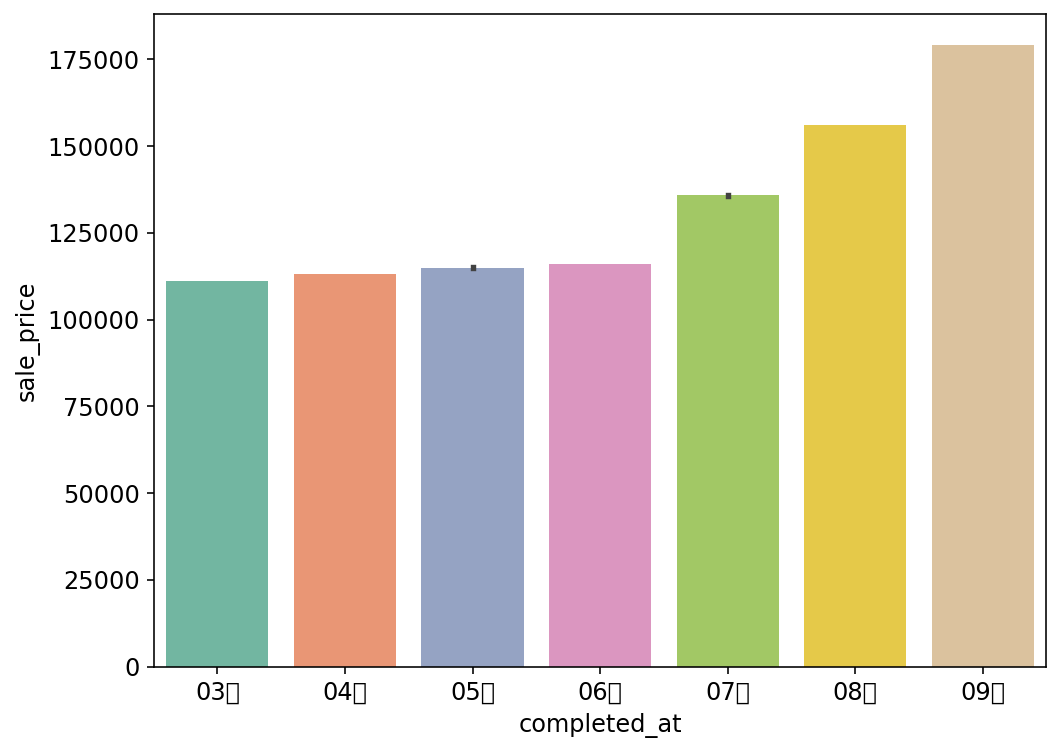

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(pay[pay['course_id'] == 203720.0]['completed_at'].dt.strftime('%m월'), pay[pay['course_id'] == 203720.0]['sale_price'], palette='Set2')
plt.show()

In [ ]:
pd.DataFrame(pay[pay['course_id'] == 203720.0]['completed_at'].dt.strftime('%m').value_counts())

,completed_at
04,329
05,307
06,235
08,199
07,166
09,91
03,71


In [ ]:
pd.DataFrame(pay[pay['course_id'] == 203720.0]['sale_price'].value_counts())

,sale_price
113000.0,329
115000.0,307
116000.0,235
156000.0,199
136000.0,165
179000.0,91
111000.0,71
109000.0,1


3월달에 가격이 제일쌌는데 결제횟수가 적은걸로 봐서 마케팅이 덜되었던 것으로 예상된다


#### 환불율이 높은 강의

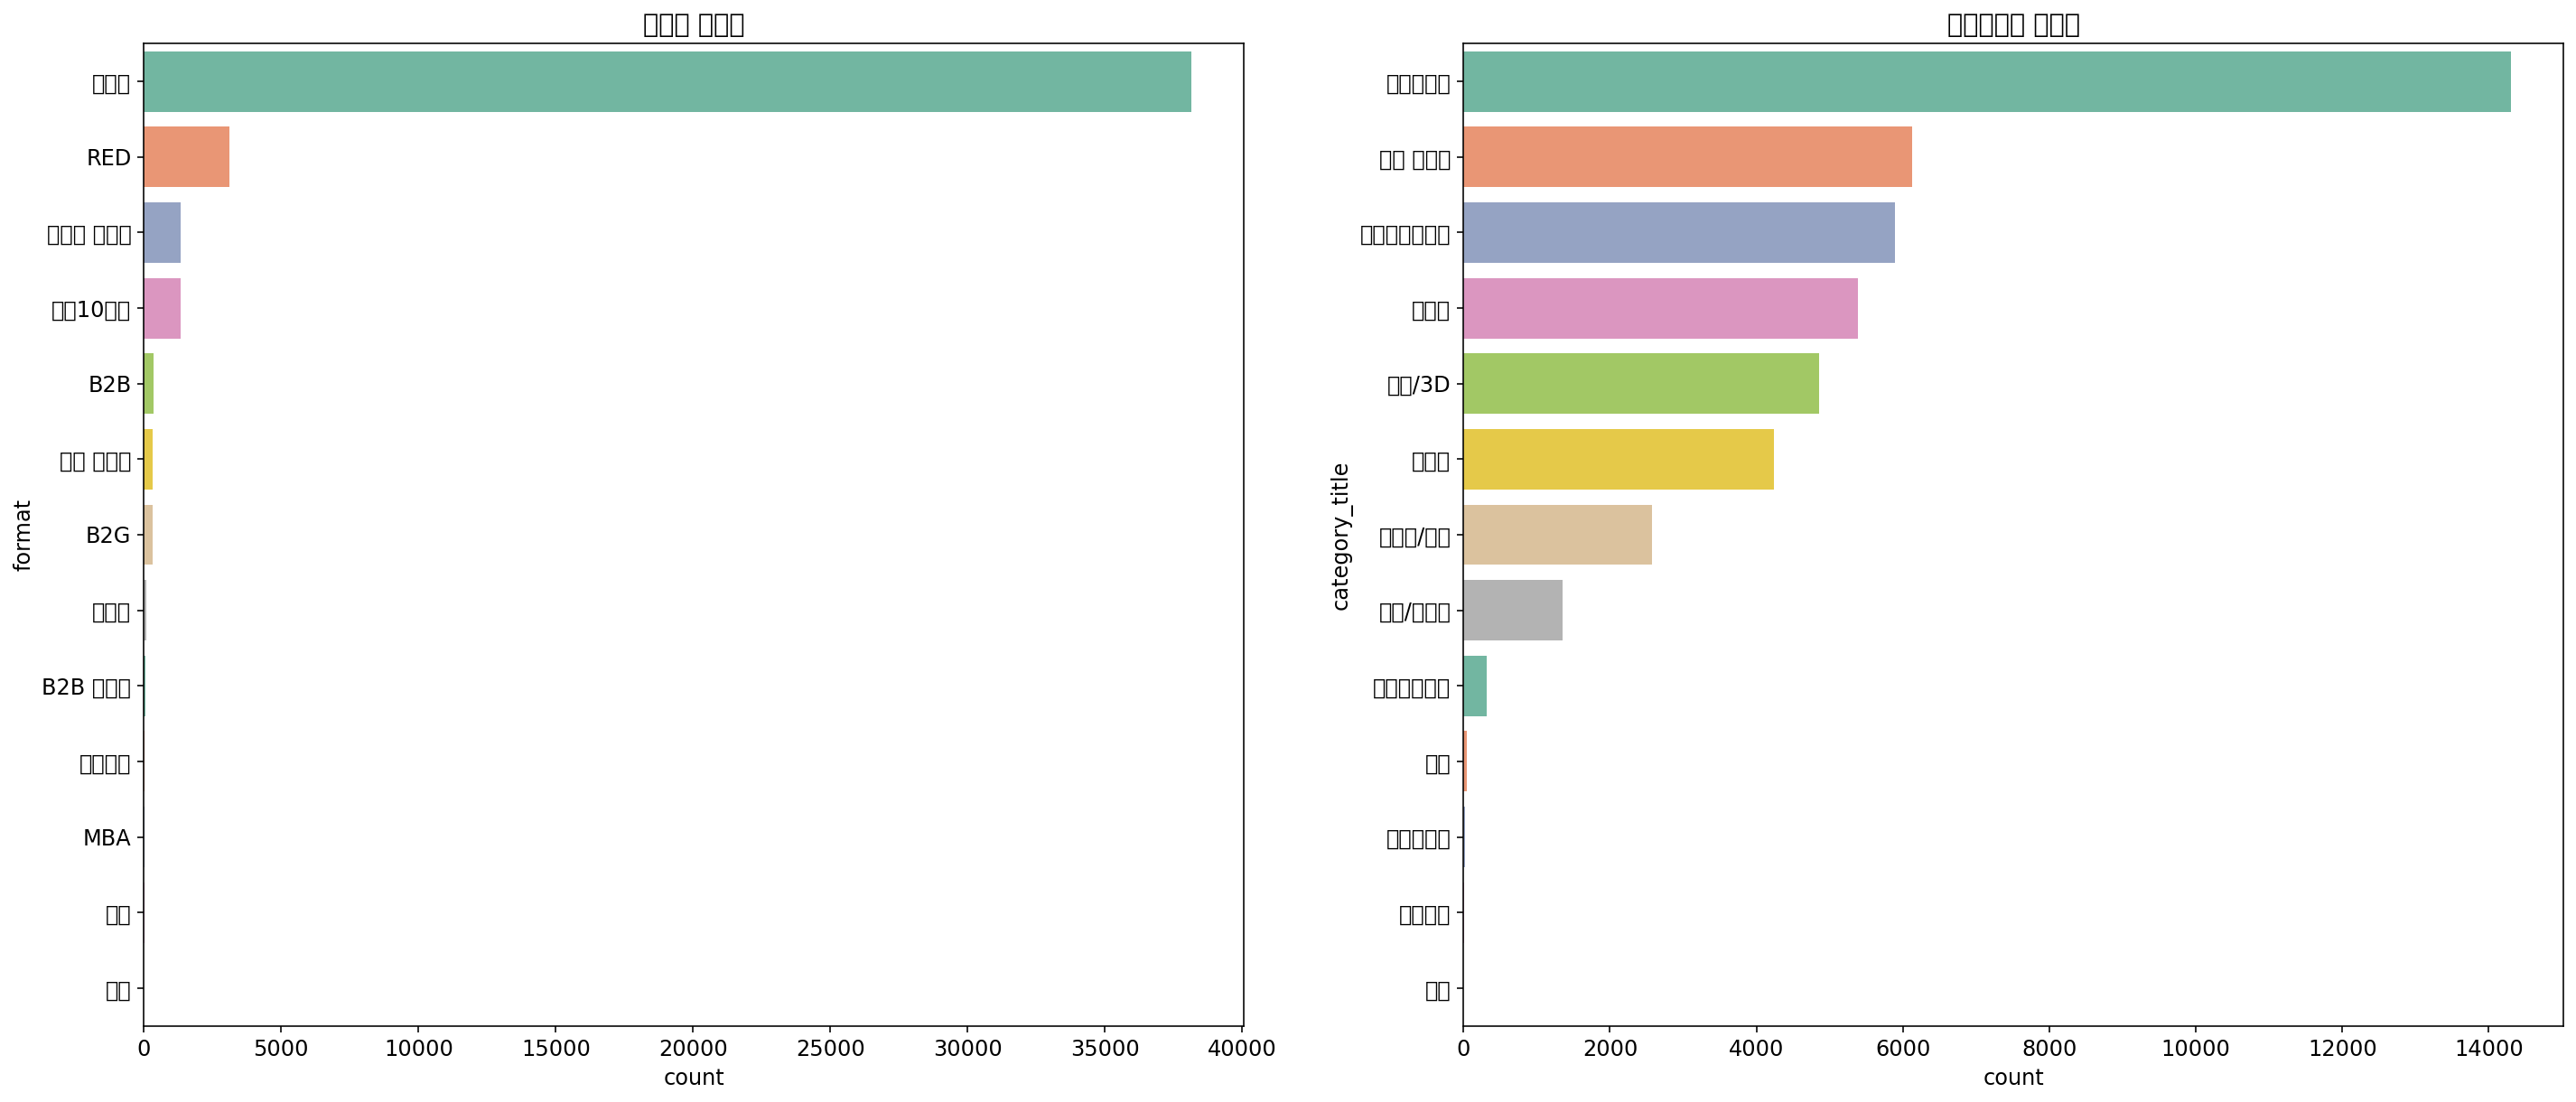

In [ ]:
# 결제 완료된 강의들을 포맷과 카테고리로 분류
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.countplot(data=pay, y='format', order = pay['format'].value_counts().index, palette='Set2')
plt.title('포맷별 거래량')
plt.subplot(1,2,2)
sns.countplot(data=pay, y='category_title', order = pay['category_title'].value_counts().index, palette='Set2')
plt.title('카테고리별 거래량')
plt.show()

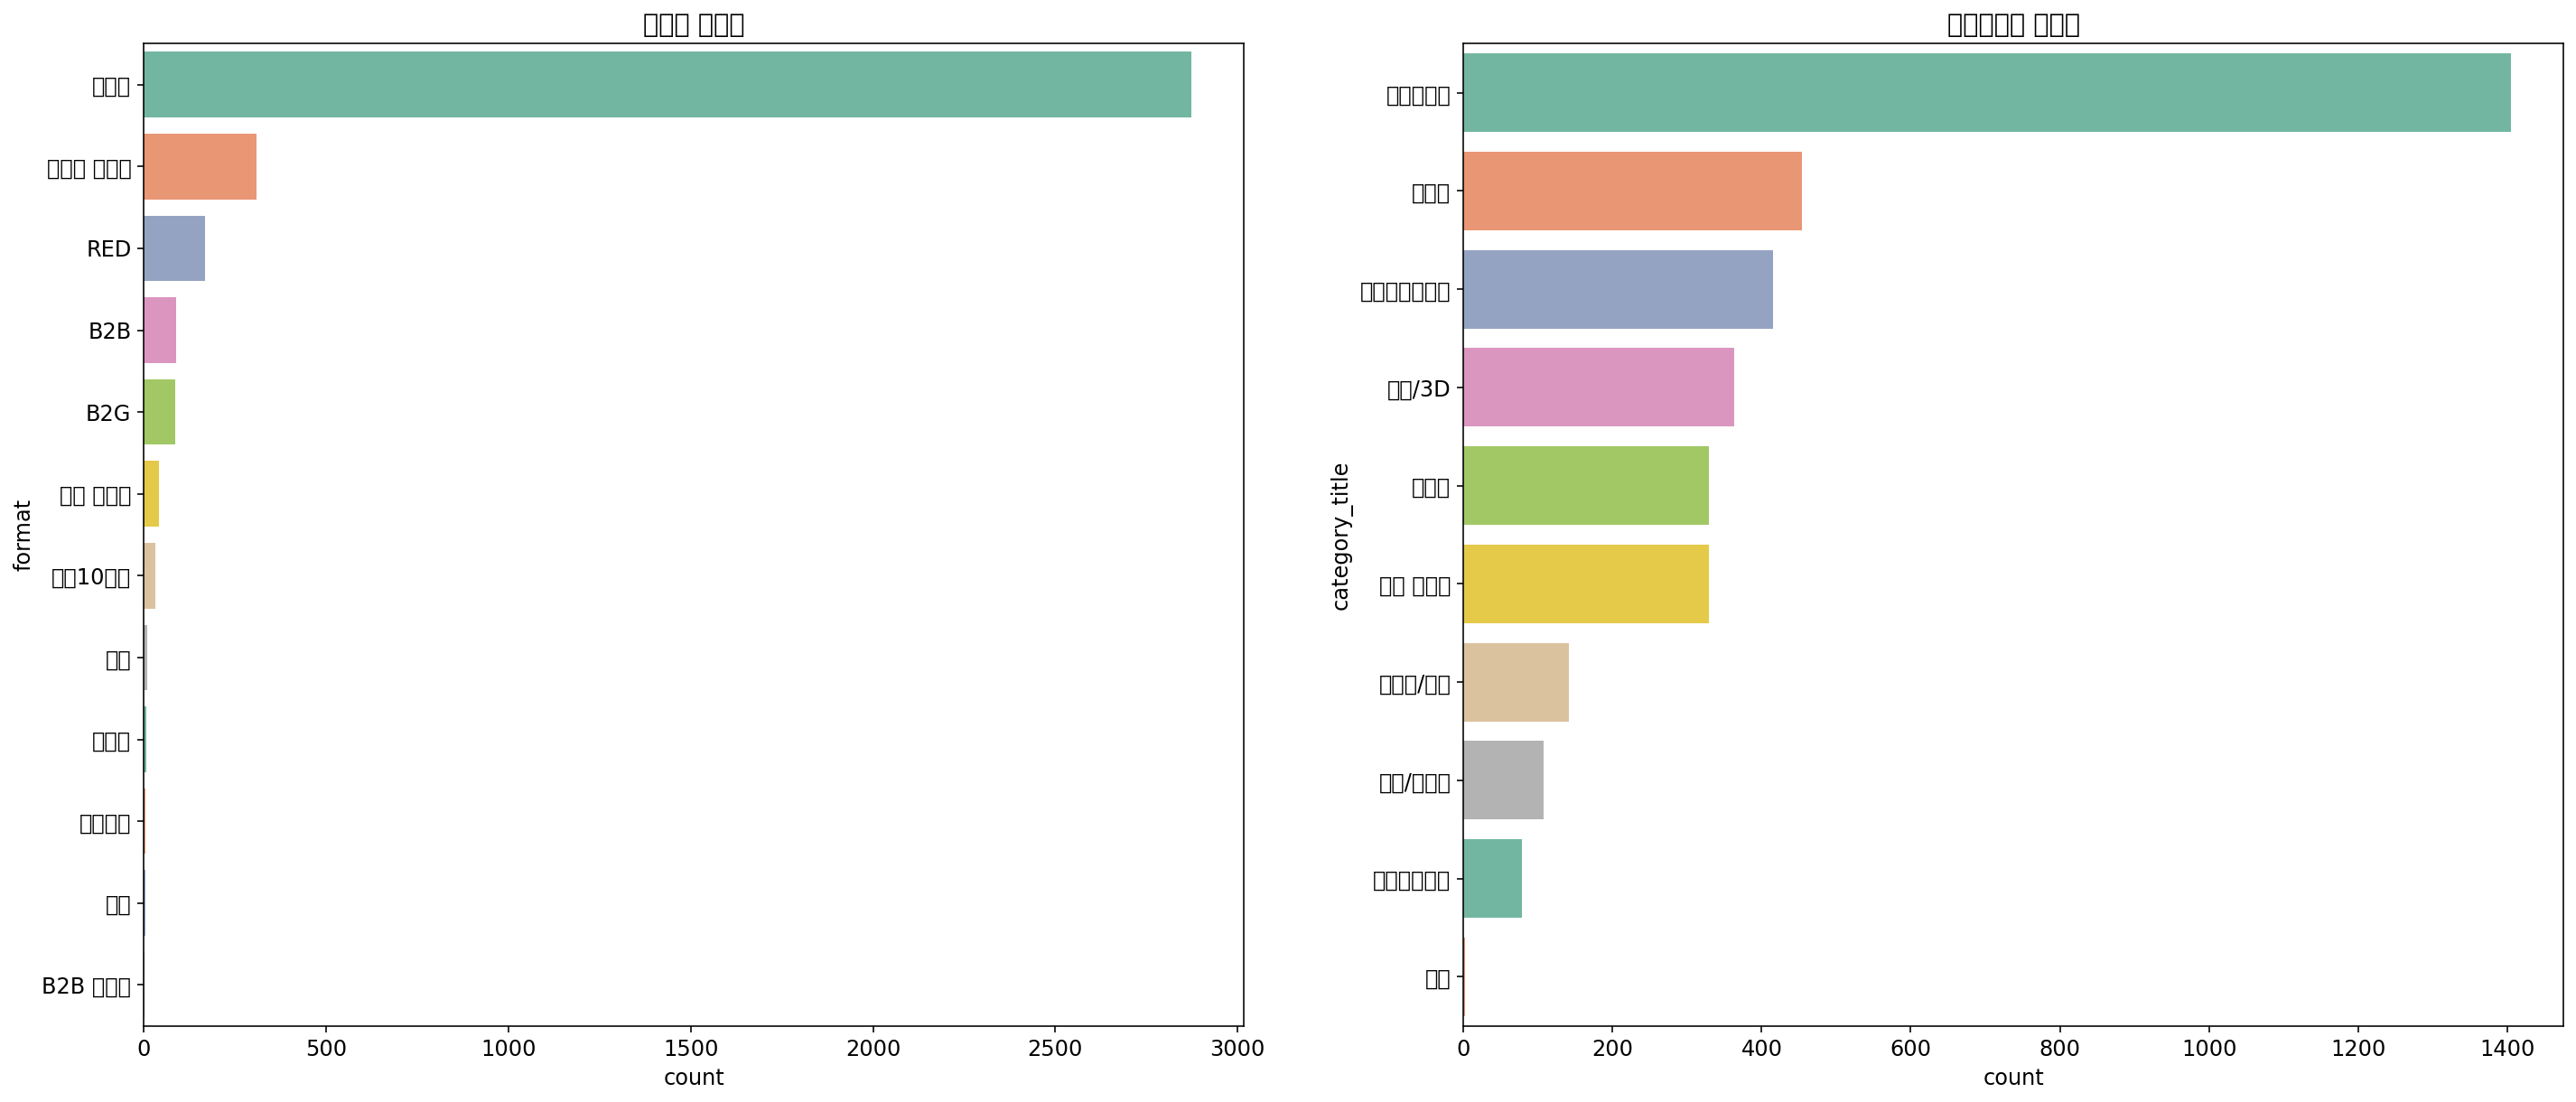

In [ ]:
# 환불된 강의들을 포맷과 카테고리로 분류
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.countplot(data=ref, y='format', order = ref['format'].value_counts().index, palette='Set2')
plt.title('포맷별 환불량')
plt.subplot(1,2,2)
sns.countplot(data=ref, y='category_title', order = ref['category_title'].value_counts().index, palette='Set2')
plt.title('카테고리별 환불량')
plt.show()

결제된 강의의 포맷이 올인원인 강의가 제일 많고, 카테고리에서는 프로그래밍이 제일 많기 때문에 

환불된 강의 중에서 포맷이 올인원인 강의와 카테고리가 프로그래밍인 강의가 제일 많다

#### 환불이 제일 많이 된 강의 분석

In [ ]:
ref['course_id'].value_counts()

203720.0    121
203525.0    105
204631.0     68
204871.0     65
203942.0     63
           ... 
2516.0        1
204897.0      1
201892.0      1
202878.0      1
207648.0      1
Name: course_id, Length: 300, dtype: int64

In [ ]:
ref[ref['course_id']==203720.0].head(1)

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at,discount
34,1198,973764,474332.0,203720.0,REFUND,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-29 14:58:53,-111000,사용안함,0.0,111000.0,111000.0,ETC,CARD,프론트엔드 개발,2021-02-02,0.0


In [ ]:
pay[pay['course_id'] == 203720.0].head(1)

,index,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,...,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,order_hour,order_date,discount
4,14,970676,478035.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,...,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,111000.0,ETC,CARD,프론트엔드 개발,2021-02-02,15시,28일,20000.0


올인원 프로그래밍 과목중 **초격차 패키지 : 한 번에 끝내는 프론트엔드 개발**이 제일 환불수가 많은걸로 봐서 문제가 있는것으로 보인다.

- 강의의 짜임새가 부족하거나
- 초격자 패키지를 처음 등록해봤는데 생각보다 어렵거나 안맞아서 환불을 한것으로 예상된다

## 광고 예시

<img src='https://drive.google.com/uc?export=download&id=1SkgLiVzuZFi39Dd1T22_R89tm6-gua6B' width="800" height ="" />


<img src='https://drive.google.com/uc?export=download&id=1t35iXy5sNTZKEQon7MJU-w3YuZnof8oT' width="500" height ="" /> <img src='https://drive.google.com/uc?export=download&id=1eEgTgOh_j1tX0sLHXLrqmtPI5DY2QVcp' width="500" height ="" />